In [1]:
import os
import numpy as np
import json

# Function to load rectangles from a text file
def load_rectangles(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        
    # Split the content into individual sets by detecting "Rectangles Set"
    sets = content.split("Rectangles Set")
    
    # Skip the first empty split part
    sets = sets[1:]

    rectangles_list = []
    for set_content in sets:
        lines = set_content.strip().split('\n')[1:]  # Skip the "X:" line and empty lines
        rectangles = [tuple(map(int, line.split(','))) for line in lines if line]
        rectangles_array = np.array(rectangles)
        rectangles_list.append(rectangles_array)
    
    return rectangles_list

# Load the rectangles
rectangles_file_path = 'rectangles_all.txt'
rectangles_list = load_rectangles(rectangles_file_path)
rectangles_list

[array([[ 11,  83],
        [ 75,  85],
        [ 20,  74],
        [ 31,  19],
        [ 46,   4],
        [ 41,  73],
        [ 13,  71],
        [ 46,  22],
        [130,  21],
        [168,  54],
        [ 93,   1],
        [113,  31],
        [ 81,   3],
        [194,  16],
        [109,  63],
        [183,  13],
        [198,  94],
        [ 43,  47],
        [ 14,  26],
        [185,  93],
        [ 49, 100],
        [ 70,  15],
        [ 98,  35],
        [159,  22],
        [  4,  11],
        [134,  88],
        [189,   6],
        [141,  35],
        [161,  46],
        [194,  92],
        [ 91,  49],
        [190,  90],
        [186,  62],
        [161,  90],
        [157,  73],
        [ 81,  14],
        [144,  48],
        [187,  54],
        [195,  23],
        [ 68,  72],
        [167,  12],
        [ 92,  19],
        [124,  10],
        [ 55,  54],
        [ 25,  45],
        [132,  56],
        [ 11,  14],
        [144,  43],
        [ 19,   2],
        [186,  65]])

In [5]:
def check_bins(bins, bin_width, bin_height):
    import itertools
    from collections import defaultdict
    
    # Function to check overlapping of two items
    def are_overlapping(item1, item2):
        x1, y1 = item1[1], item1[2]
        x2, y2 = item2[1], item2[2]
        # Assuming the items have a height and width, which we don't have here.
        # For simplicity, assuming each item is 1x1 unit (you can replace with actual dimensions)
        width1, height1 = 1, 1
        width2, height2 = 1, 1
        
        return not (x1 + width1 <= x2 or x2 + width2 <= x1 or y1 + height1 <= y2 or y2 + height2 <= y1)
    
    # Check that no items overlap within each bin
    for bin in bins:
        for item1, item2 in itertools.combinations(bin, 2):
            if are_overlapping(item1, item2):
                return False, "Items overlap within a bin."
    
    # Check that all items fit within the bin boundaries
    for bin in bins:
        for item in bin:
            x, y = item[1], item[2]
            width, height = 1, 1  # Assuming each item is 1x1 unit; replace with actual dimensions
            if not (0 <= x < bin_width and 0 <= y < bin_height and x + width <= bin_width and y + height <= bin_height):
                return False, "An item doesn't fit within the bin boundaries."
    
    # Check that all items are packed in some bin
    item_count = defaultdict(int)
    for bin in bins:
        for item in bin:
            item_count[item[0]] += 1
    
    all_item_indices = set(itertools.chain(*[[item[0] for item in bin] for bin in bins]))
    num_items = max(all_item_indices)
    
    if all_item_indices != set(range(num_items + 1)):
        return False, "Not all items are packed in a bin."
    
    # Check that no item appears in more than one bin
    for count in item_count.values():
        if count > 1:
            return False, "An item appears in more than one bin."

    return True, "All checks passed."

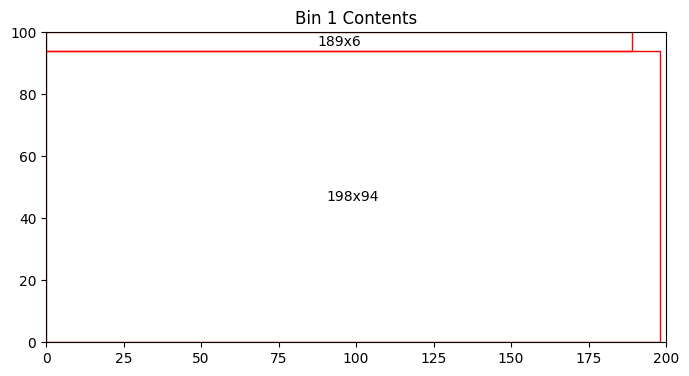

Bin 1 has 254.00 units of area left, utilization: 98.73%


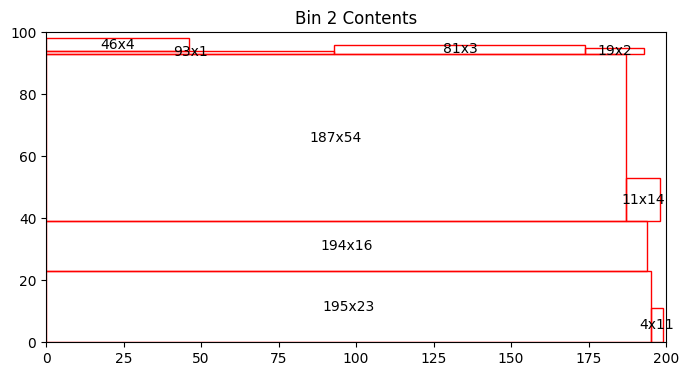

Bin 2 has 1557.00 units of area left, utilization: 92.22%


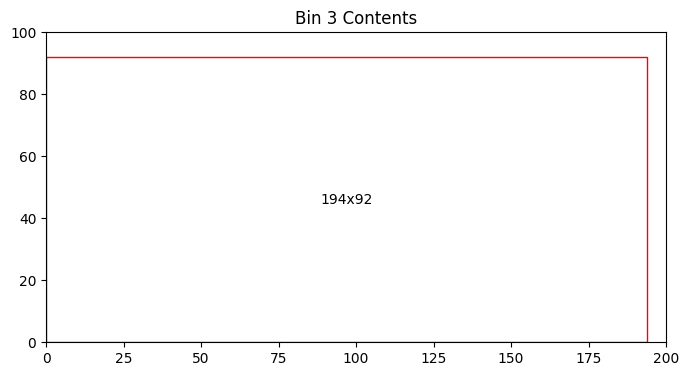

Bin 3 has 2152.00 units of area left, utilization: 89.24%


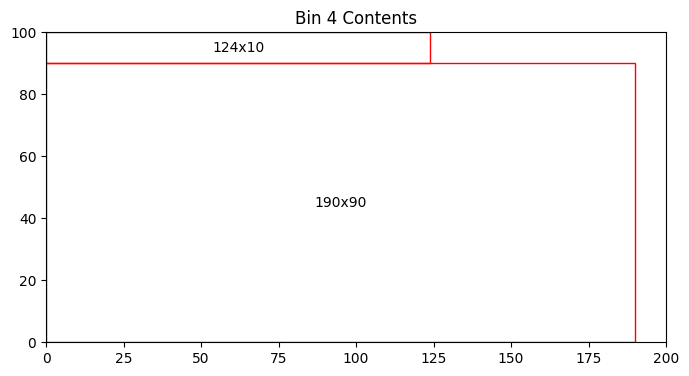

Bin 4 has 1660.00 units of area left, utilization: 91.70%


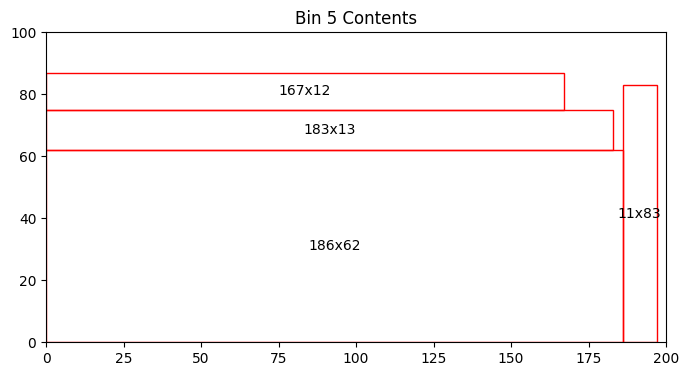

Bin 5 has 3172.00 units of area left, utilization: 84.14%


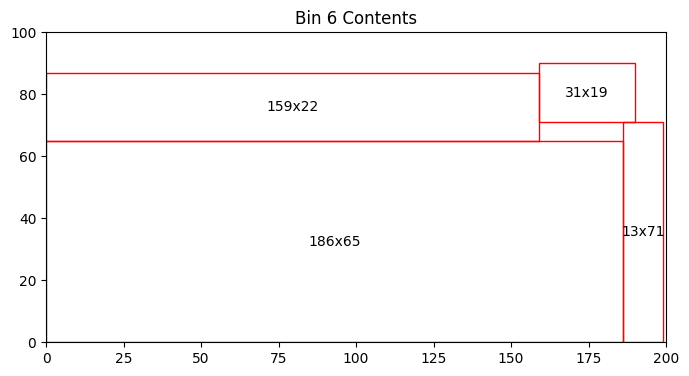

Bin 6 has 2900.00 units of area left, utilization: 85.50%


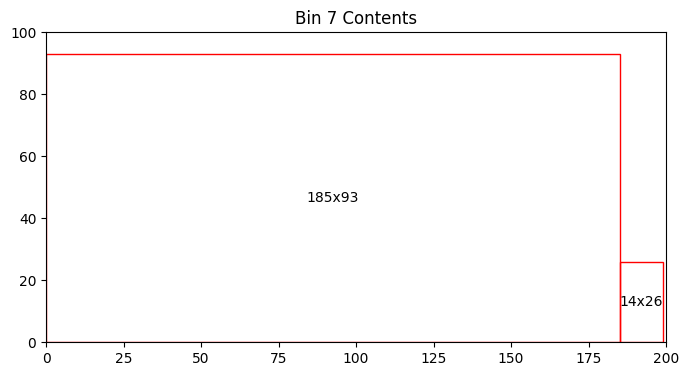

Bin 7 has 2431.00 units of area left, utilization: 87.84%


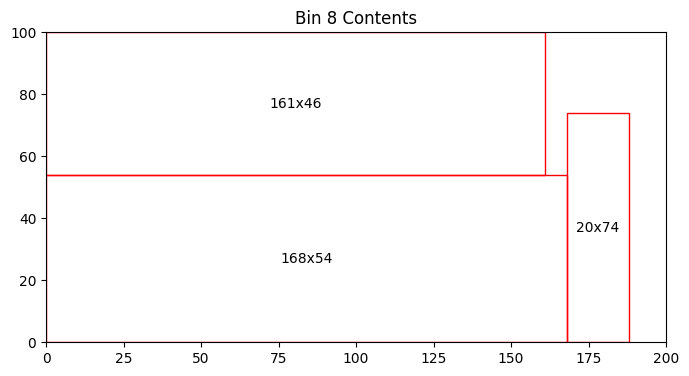

Bin 8 has 2042.00 units of area left, utilization: 89.79%


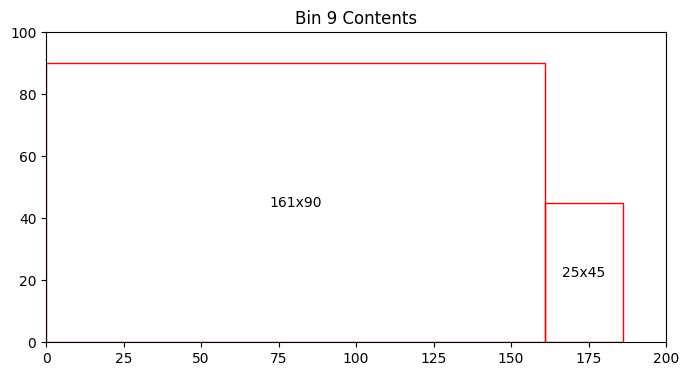

Bin 9 has 4385.00 units of area left, utilization: 78.08%


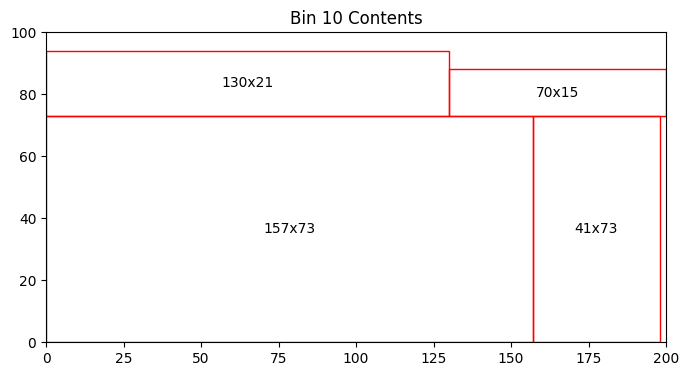

Bin 10 has 1766.00 units of area left, utilization: 91.17%


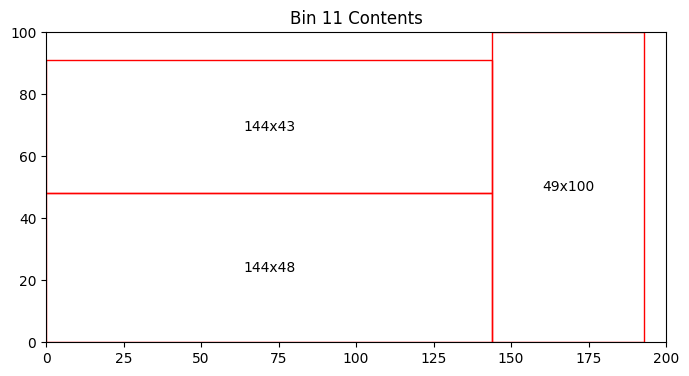

Bin 11 has 1996.00 units of area left, utilization: 90.02%


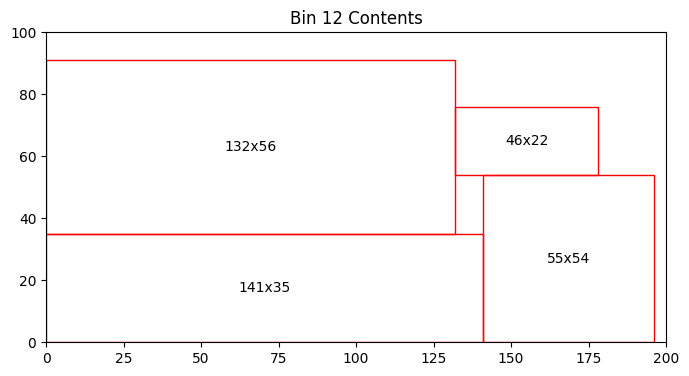

Bin 12 has 3691.00 units of area left, utilization: 81.55%


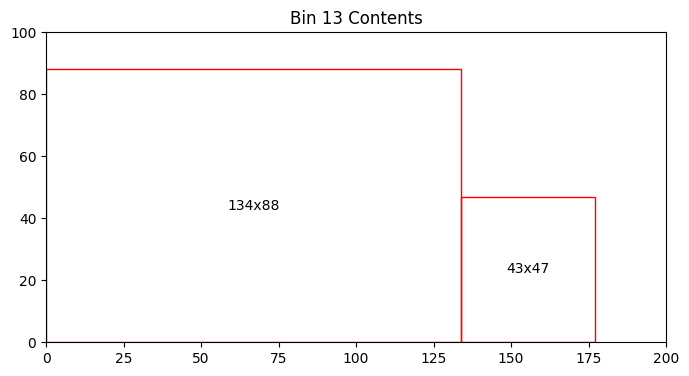

Bin 13 has 6187.00 units of area left, utilization: 69.06%


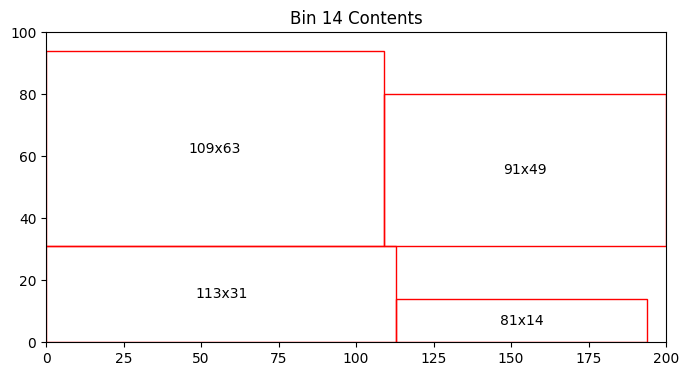

Bin 14 has 4037.00 units of area left, utilization: 79.81%


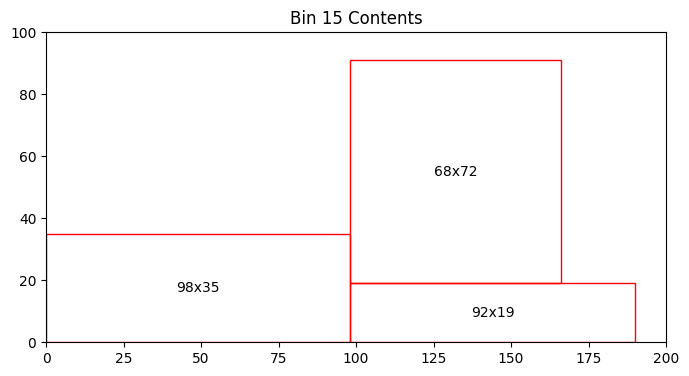

Bin 15 has 9926.00 units of area left, utilization: 50.37%


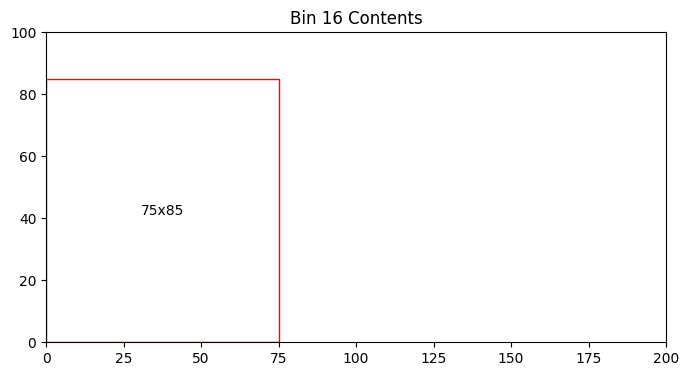

Bin 16 has 13625.00 units of area left, utilization: 31.87%
Total number of bins = 16
Total area left in bins = 61781.00
{'total_bins': 16, 'total_area_left': 61781, 'utilizations': [98.72999999999999, 92.215, 89.24, 91.7, 84.14, 85.5, 87.845, 89.79, 78.075, 91.17, 90.02, 81.545, 69.065, 79.815, 50.370000000000005, 31.874999999999996]}


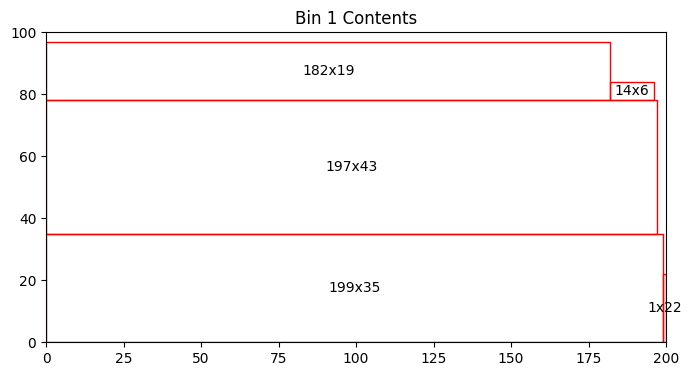

Bin 1 has 1000.00 units of area left, utilization: 95.00%


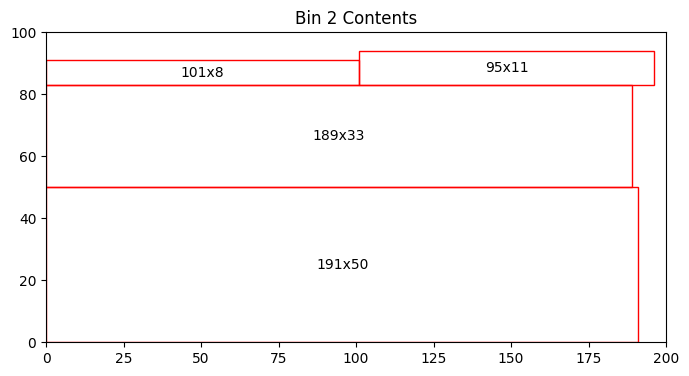

Bin 2 has 2360.00 units of area left, utilization: 88.20%


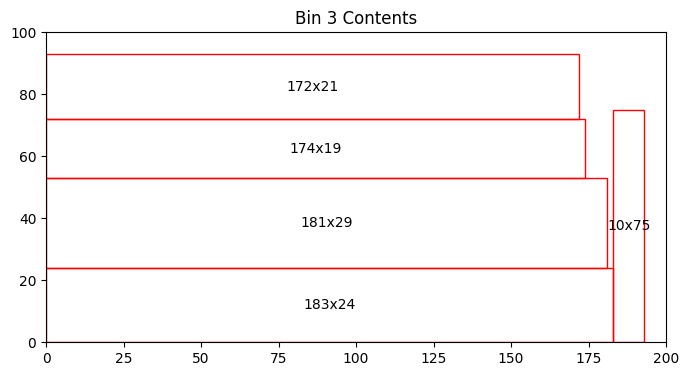

Bin 3 has 2691.00 units of area left, utilization: 86.55%


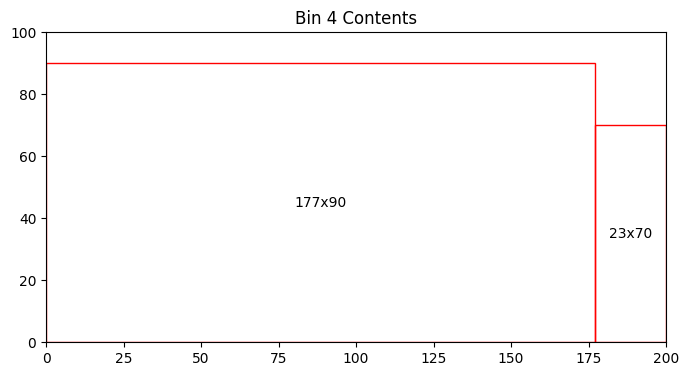

Bin 4 has 2460.00 units of area left, utilization: 87.70%


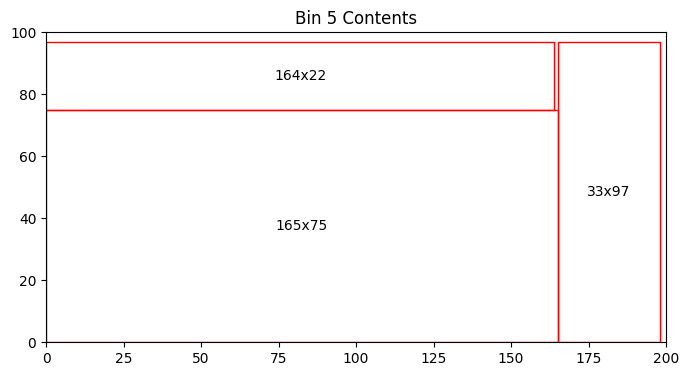

Bin 5 has 816.00 units of area left, utilization: 95.92%


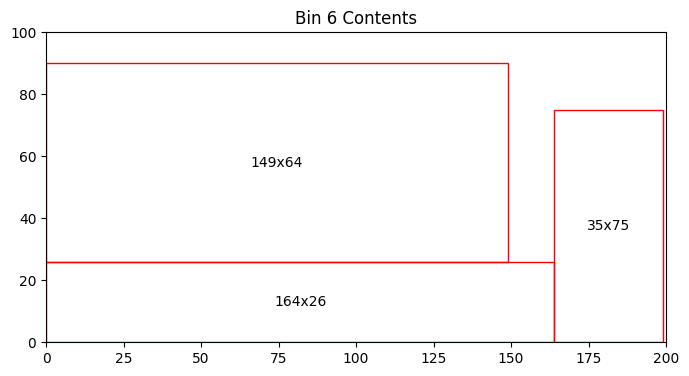

Bin 6 has 3575.00 units of area left, utilization: 82.12%


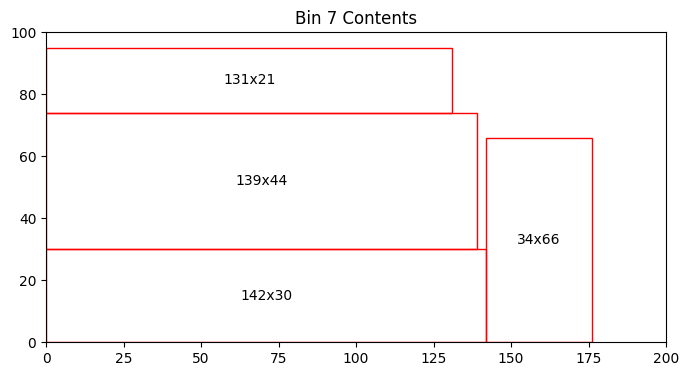

Bin 7 has 4629.00 units of area left, utilization: 76.85%


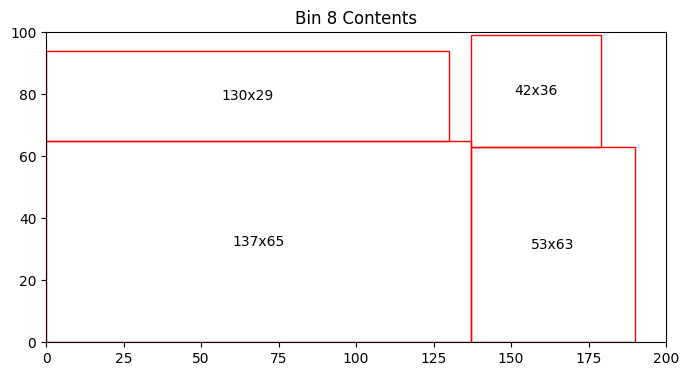

Bin 8 has 2474.00 units of area left, utilization: 87.63%


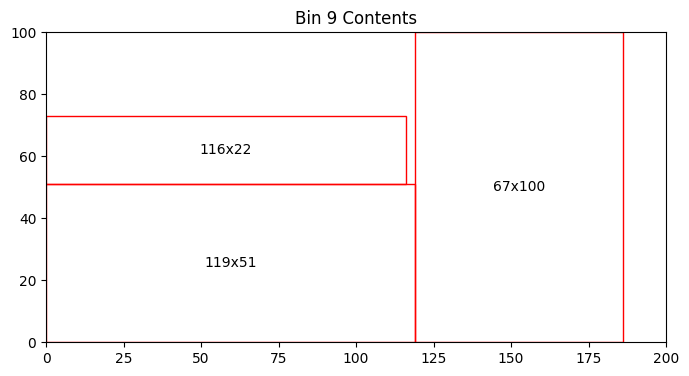

Bin 9 has 4679.00 units of area left, utilization: 76.61%


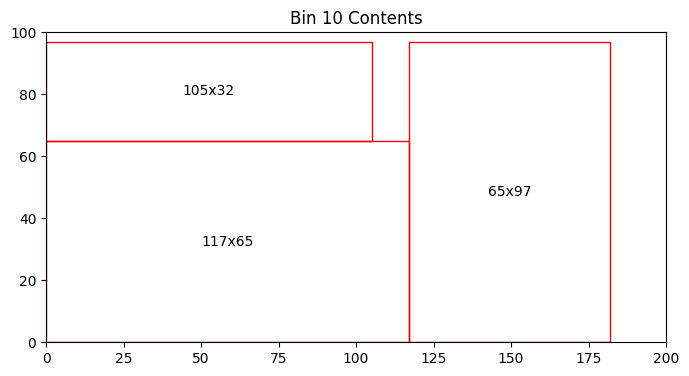

Bin 10 has 2730.00 units of area left, utilization: 86.35%


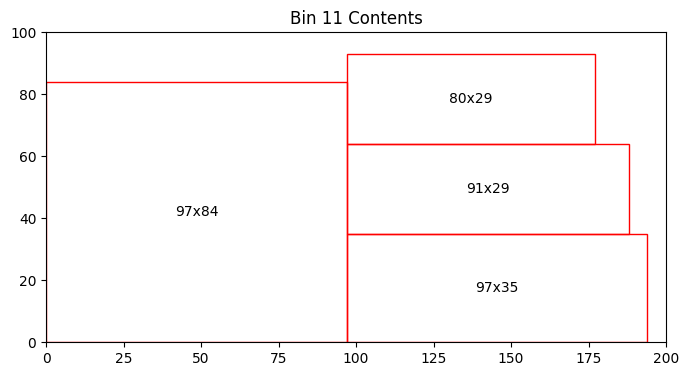

Bin 11 has 3498.00 units of area left, utilization: 82.51%


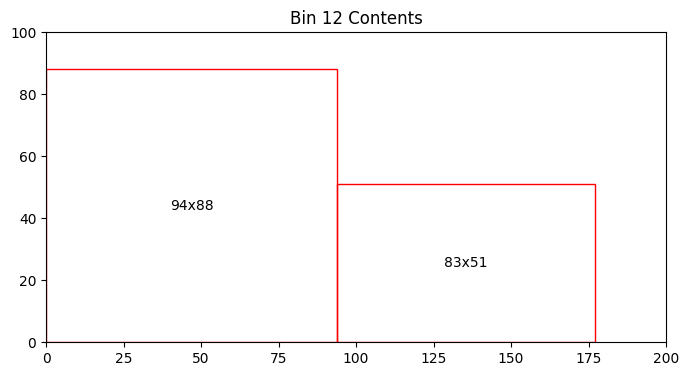

Bin 12 has 7495.00 units of area left, utilization: 62.52%


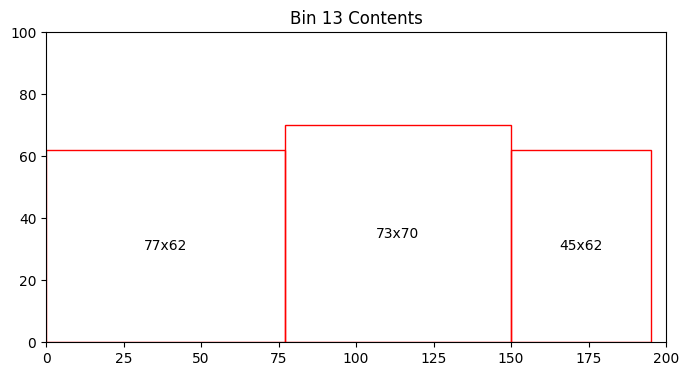

Bin 13 has 7326.00 units of area left, utilization: 63.37%


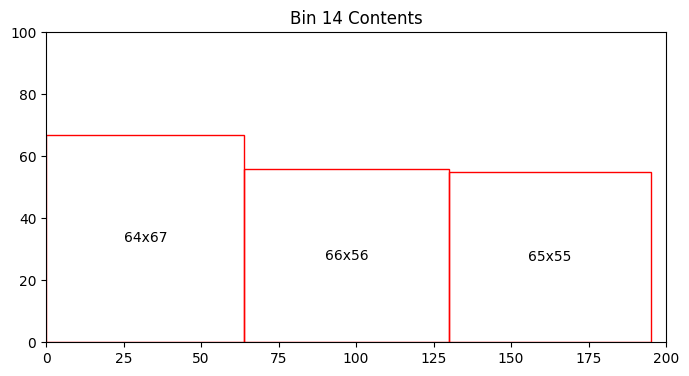

Bin 14 has 8441.00 units of area left, utilization: 57.79%


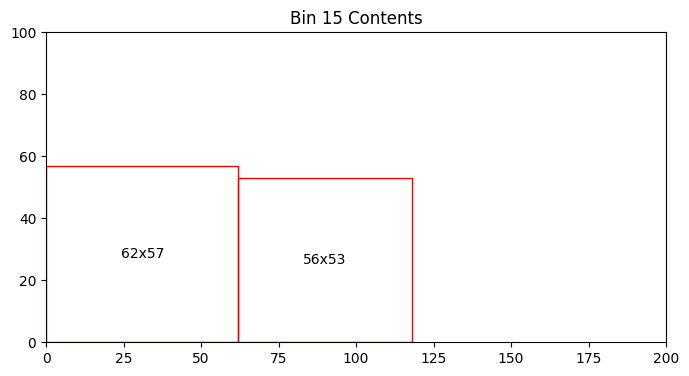

Bin 15 has 13498.00 units of area left, utilization: 32.51%
Total number of bins = 15
Total area left in bins = 67672.00
{'total_bins': 15, 'total_area_left': 67672, 'utilizations': [95.0, 88.2, 86.545, 87.7, 95.92, 82.125, 76.85499999999999, 87.63, 76.605, 86.35000000000001, 82.50999999999999, 62.525, 63.370000000000005, 57.794999999999995, 32.51]}


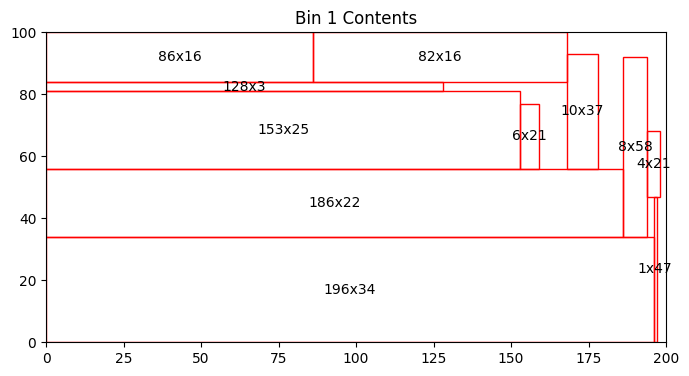

Bin 1 has 1256.00 units of area left, utilization: 93.72%


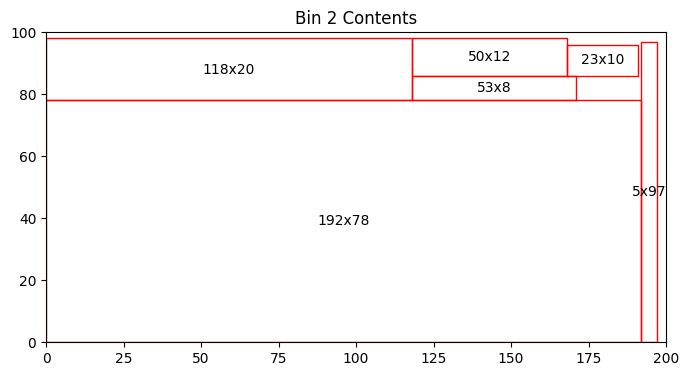

Bin 2 has 925.00 units of area left, utilization: 95.38%


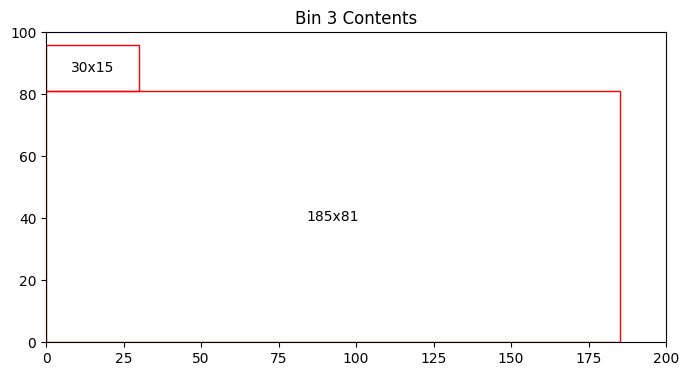

Bin 3 has 4565.00 units of area left, utilization: 77.18%


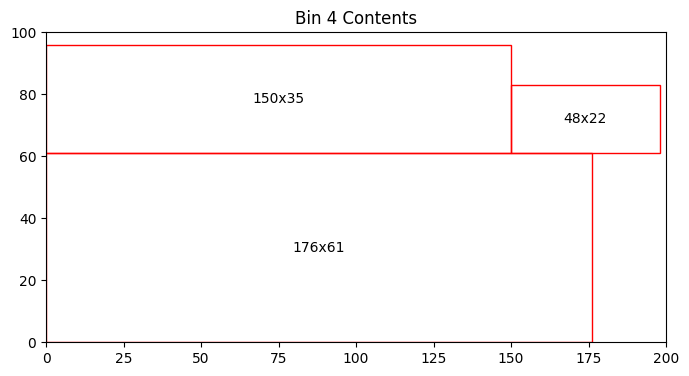

Bin 4 has 2958.00 units of area left, utilization: 85.21%


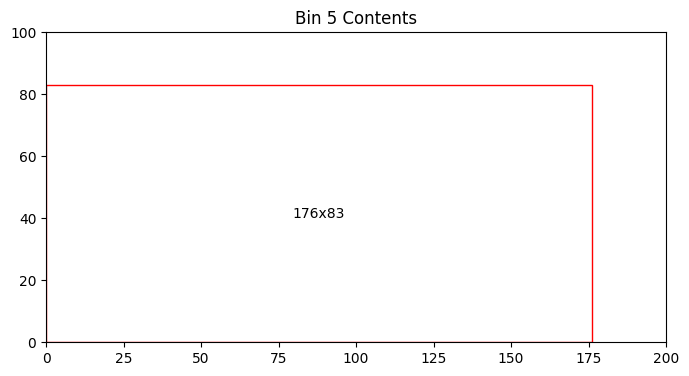

Bin 5 has 5392.00 units of area left, utilization: 73.04%


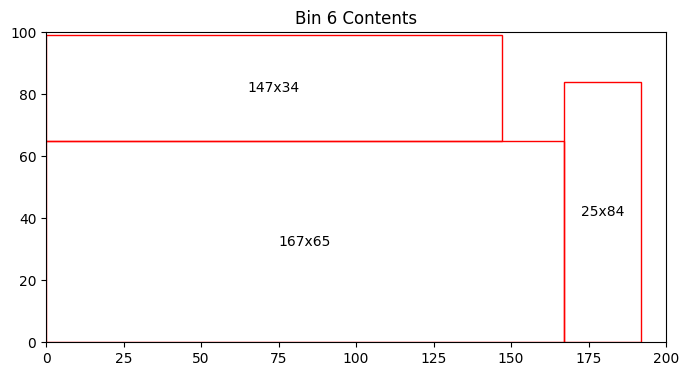

Bin 6 has 2047.00 units of area left, utilization: 89.77%


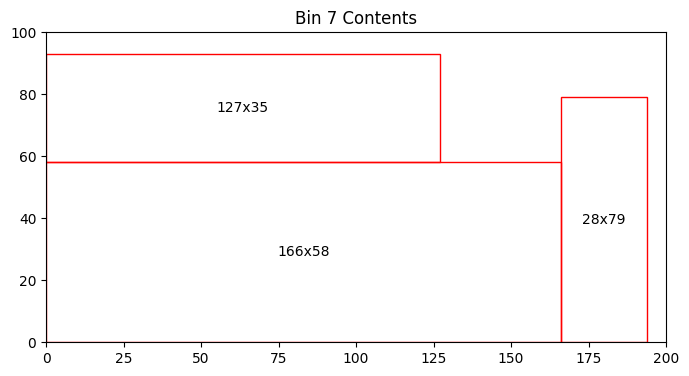

Bin 7 has 3715.00 units of area left, utilization: 81.42%


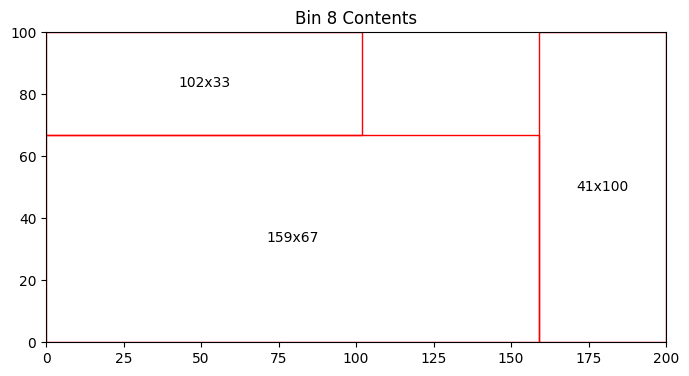

Bin 8 has 1881.00 units of area left, utilization: 90.59%


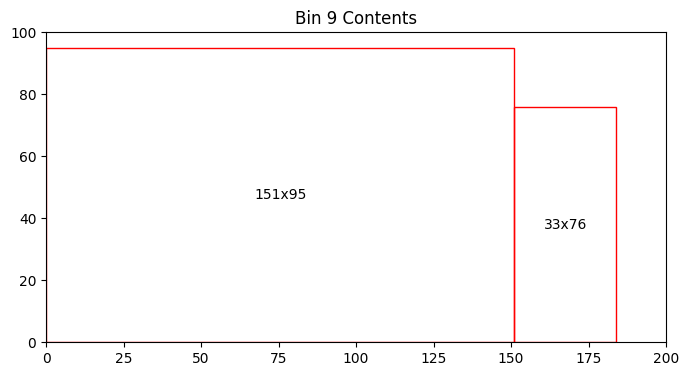

Bin 9 has 3147.00 units of area left, utilization: 84.27%


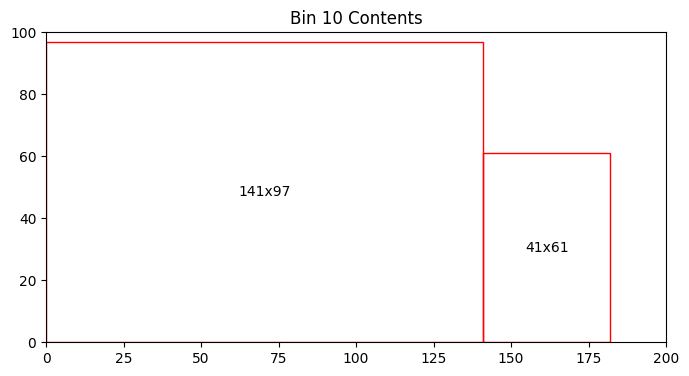

Bin 10 has 3822.00 units of area left, utilization: 80.89%


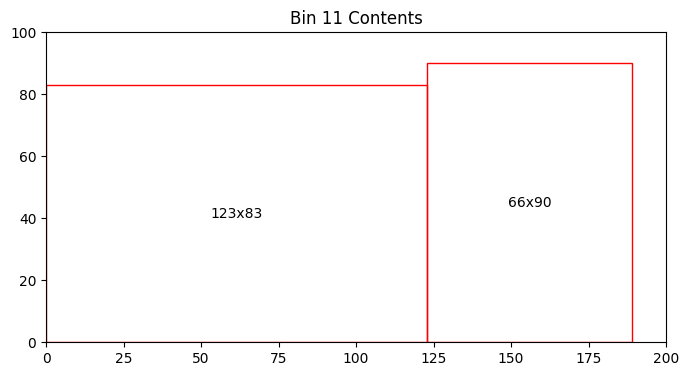

Bin 11 has 3851.00 units of area left, utilization: 80.75%


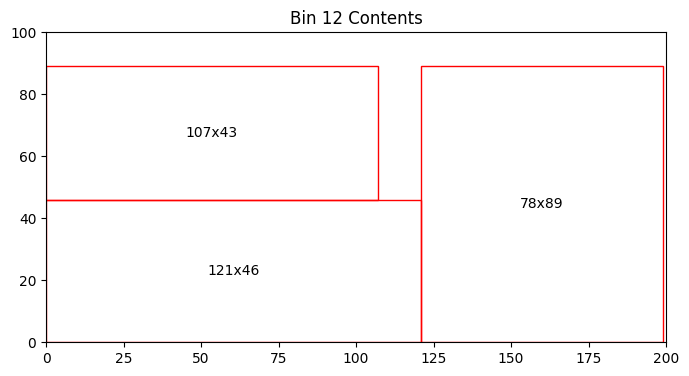

Bin 12 has 2891.00 units of area left, utilization: 85.55%


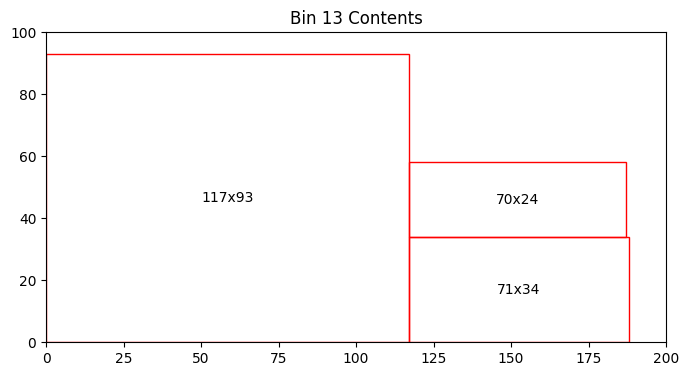

Bin 13 has 5025.00 units of area left, utilization: 74.88%


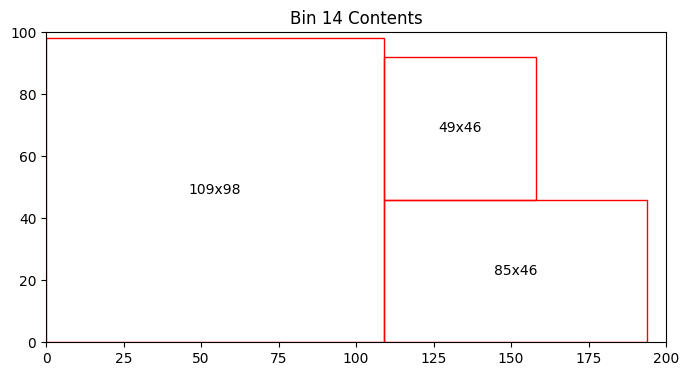

Bin 14 has 3154.00 units of area left, utilization: 84.23%


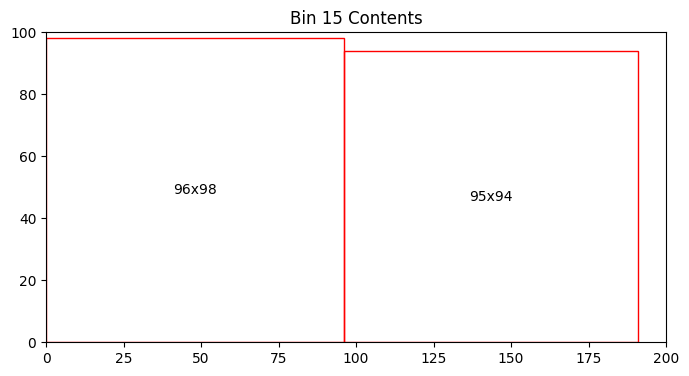

Bin 15 has 1662.00 units of area left, utilization: 91.69%


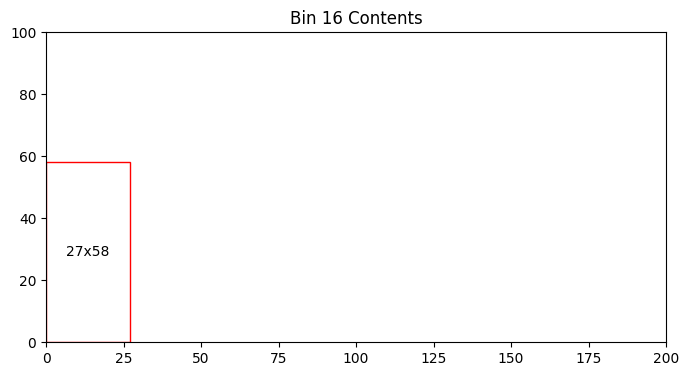

Bin 16 has 18434.00 units of area left, utilization: 7.83%
Total number of bins = 16
Total area left in bins = 64725.00
{'total_bins': 16, 'total_area_left': 64725, 'utilizations': [93.72, 95.375, 77.17500000000001, 85.21, 73.04, 89.765, 81.425, 90.595, 84.265, 80.89, 80.745, 85.545, 74.875, 84.23, 91.69, 7.829999999999999]}


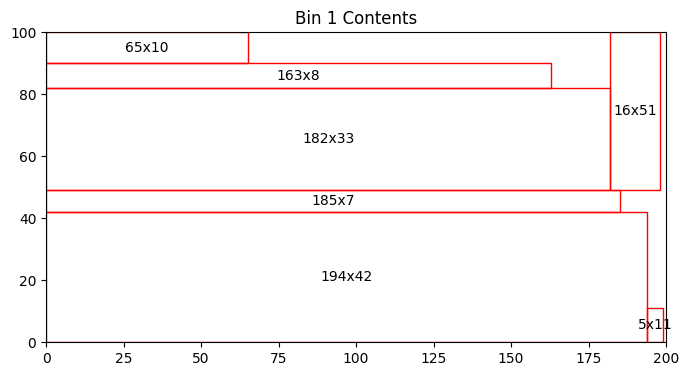

Bin 1 has 1726.00 units of area left, utilization: 91.37%


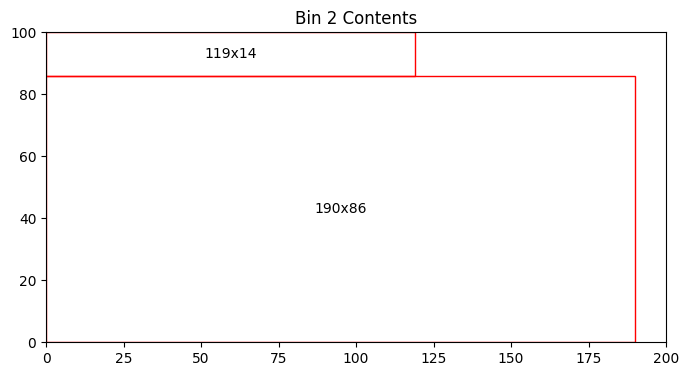

Bin 2 has 1994.00 units of area left, utilization: 90.03%


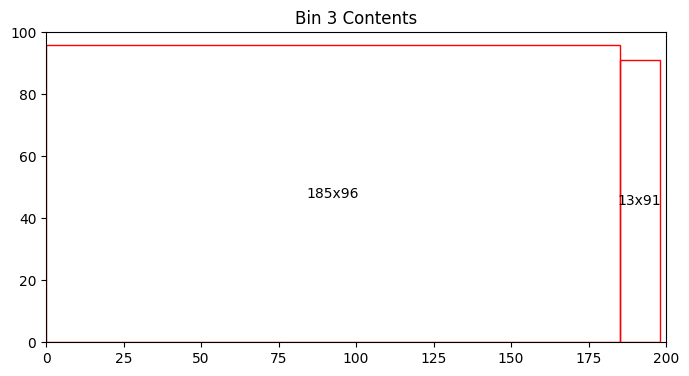

Bin 3 has 1057.00 units of area left, utilization: 94.72%


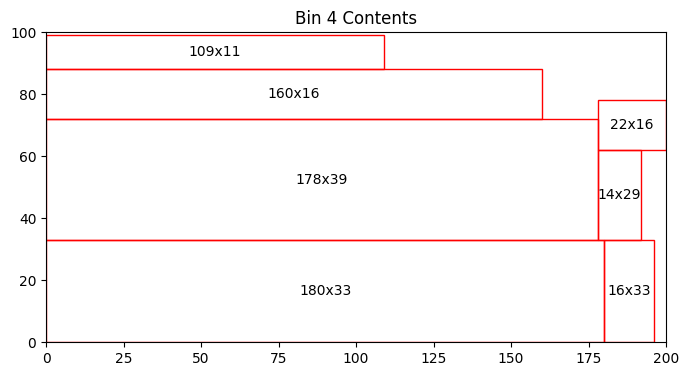

Bin 4 has 2073.00 units of area left, utilization: 89.63%


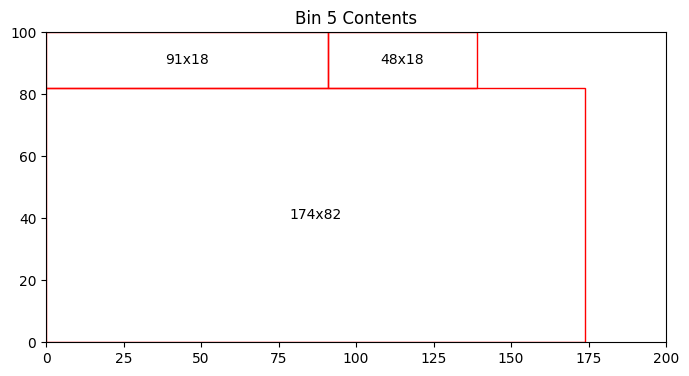

Bin 5 has 3230.00 units of area left, utilization: 83.85%


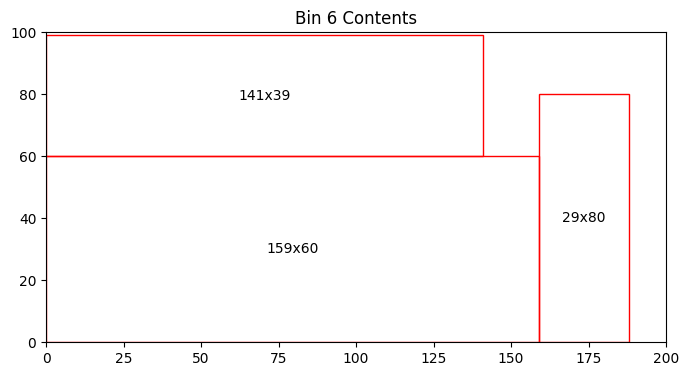

Bin 6 has 2641.00 units of area left, utilization: 86.80%


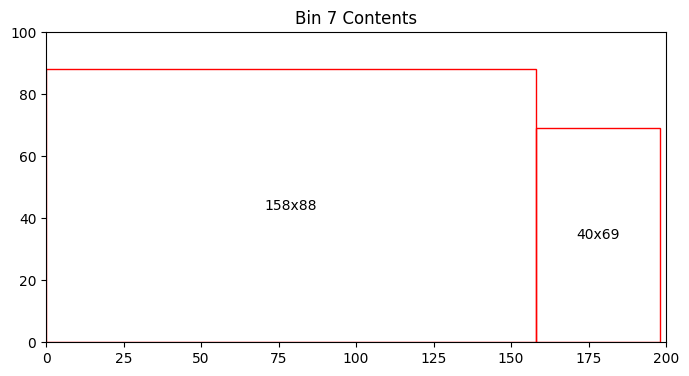

Bin 7 has 3336.00 units of area left, utilization: 83.32%


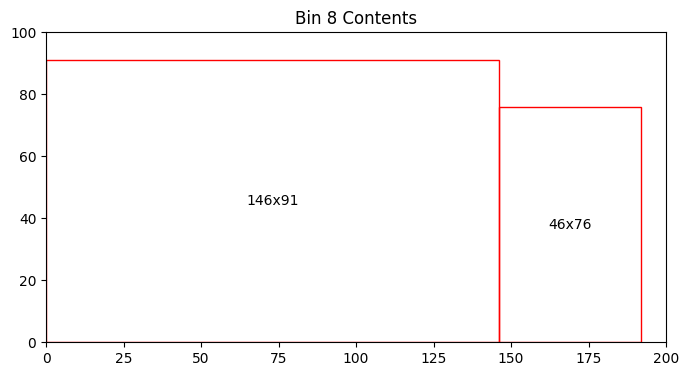

Bin 8 has 3218.00 units of area left, utilization: 83.91%


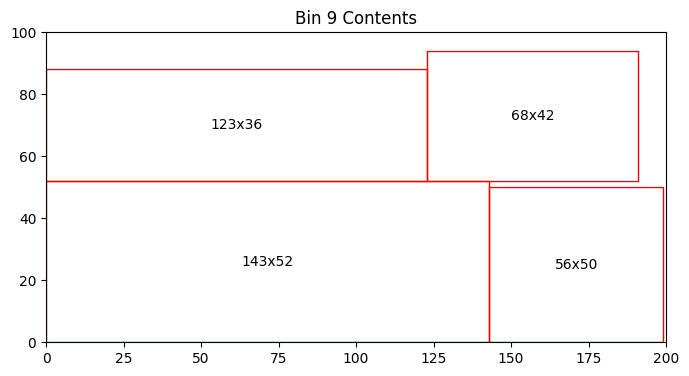

Bin 9 has 2480.00 units of area left, utilization: 87.60%


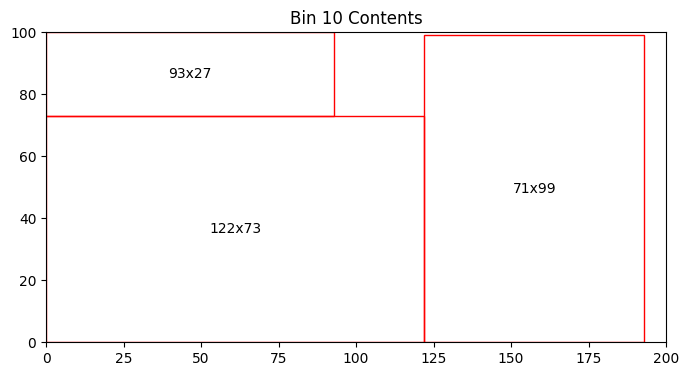

Bin 10 has 1554.00 units of area left, utilization: 92.23%


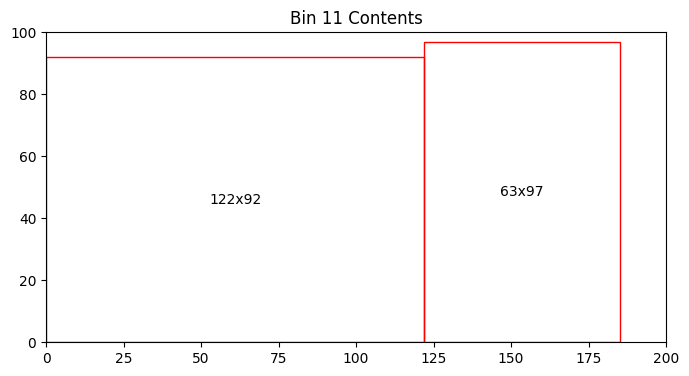

Bin 11 has 2665.00 units of area left, utilization: 86.67%


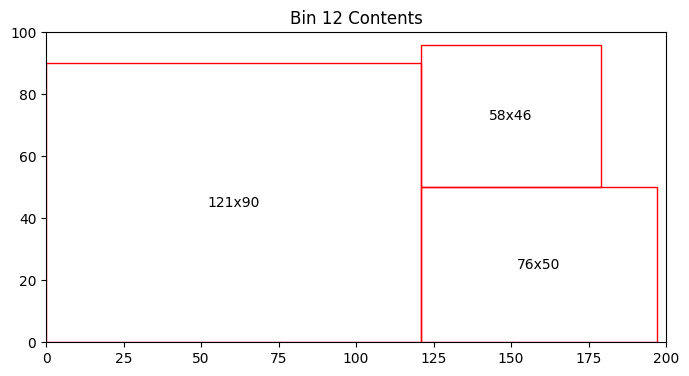

Bin 12 has 2642.00 units of area left, utilization: 86.79%


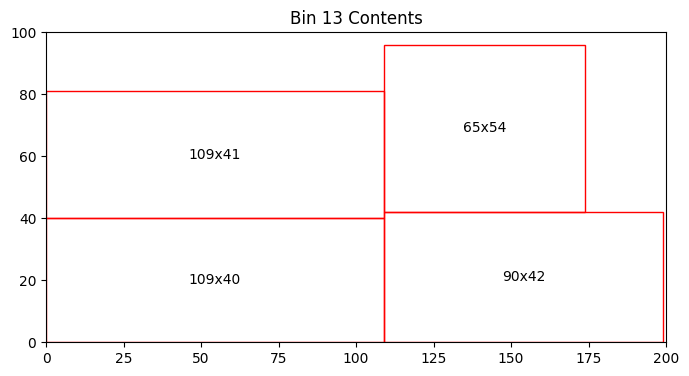

Bin 13 has 3881.00 units of area left, utilization: 80.59%


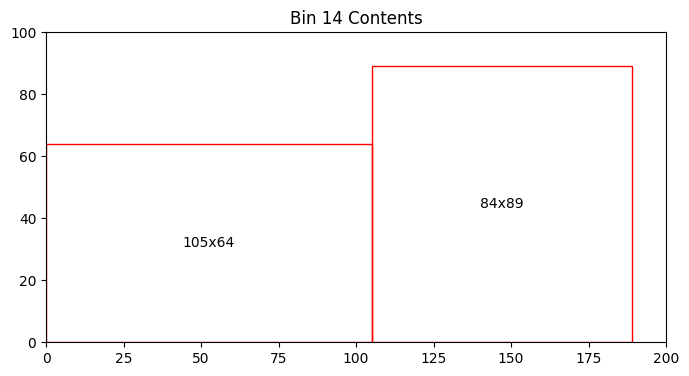

Bin 14 has 5804.00 units of area left, utilization: 70.98%


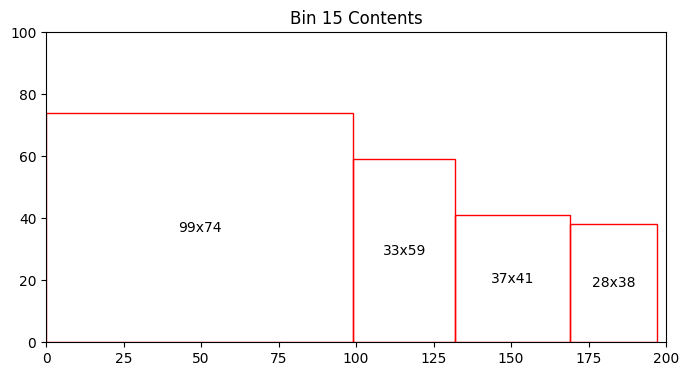

Bin 15 has 8146.00 units of area left, utilization: 59.27%
Total number of bins = 15
Total area left in bins = 46447.00
{'total_bins': 15, 'total_area_left': 46447, 'utilizations': [91.36999999999999, 90.03, 94.715, 89.63499999999999, 83.85000000000001, 86.795, 83.32000000000001, 83.91, 87.6, 92.23, 86.675, 86.79, 80.595, 70.98, 59.27]}


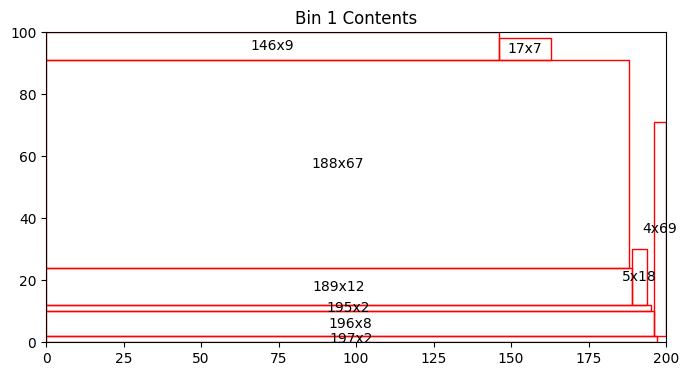

Bin 1 has 985.00 units of area left, utilization: 95.08%


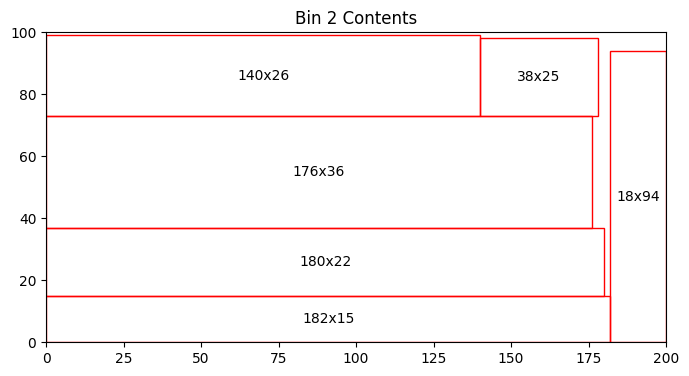

Bin 2 has 692.00 units of area left, utilization: 96.54%


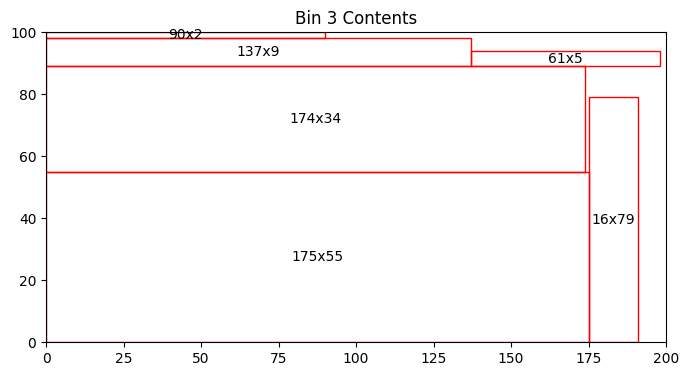

Bin 3 has 1477.00 units of area left, utilization: 92.62%


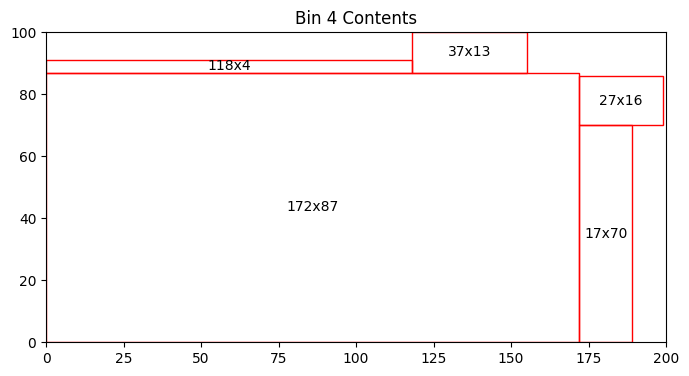

Bin 4 has 2461.00 units of area left, utilization: 87.70%


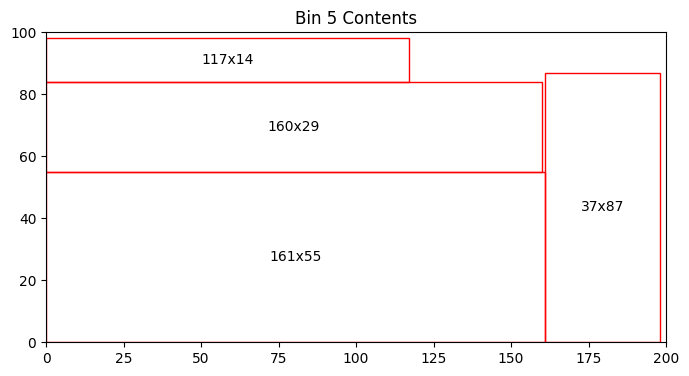

Bin 5 has 1648.00 units of area left, utilization: 91.76%


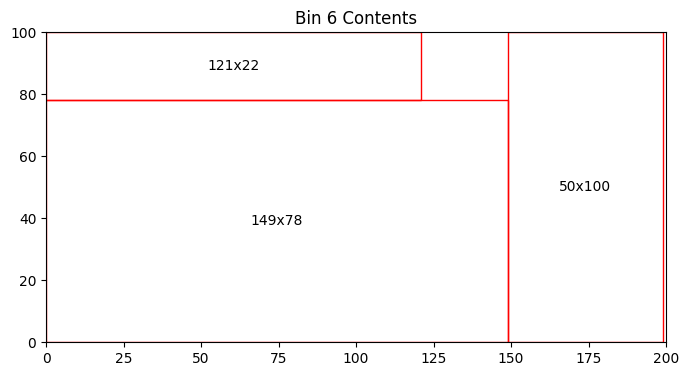

Bin 6 has 716.00 units of area left, utilization: 96.42%


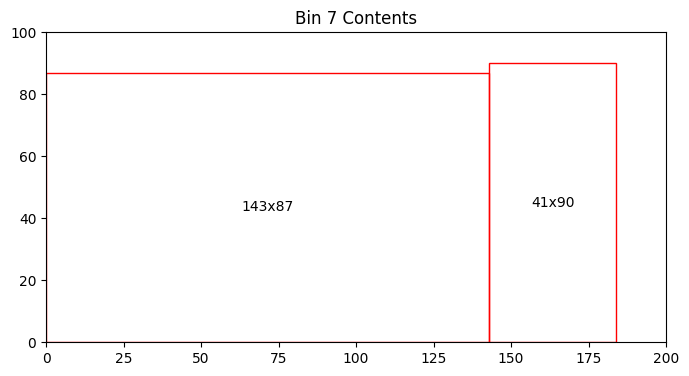

Bin 7 has 3869.00 units of area left, utilization: 80.66%


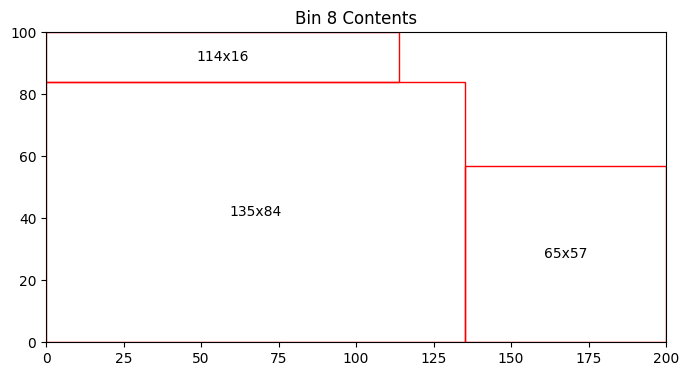

Bin 8 has 3131.00 units of area left, utilization: 84.34%


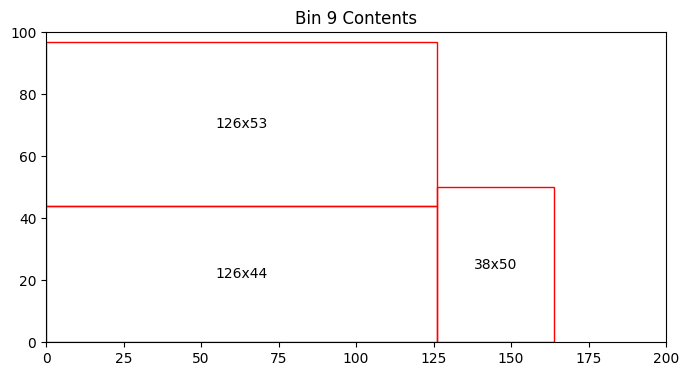

Bin 9 has 5878.00 units of area left, utilization: 70.61%


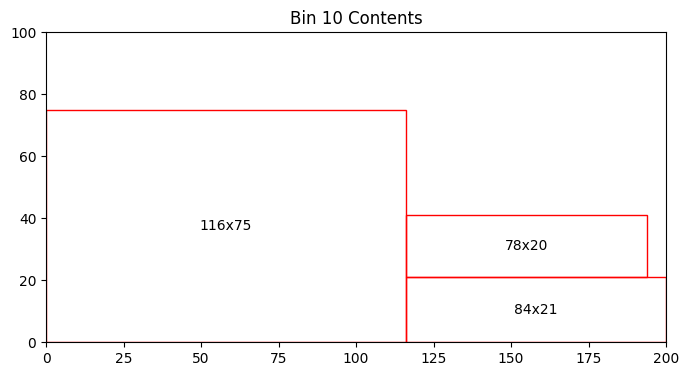

Bin 10 has 7976.00 units of area left, utilization: 60.12%


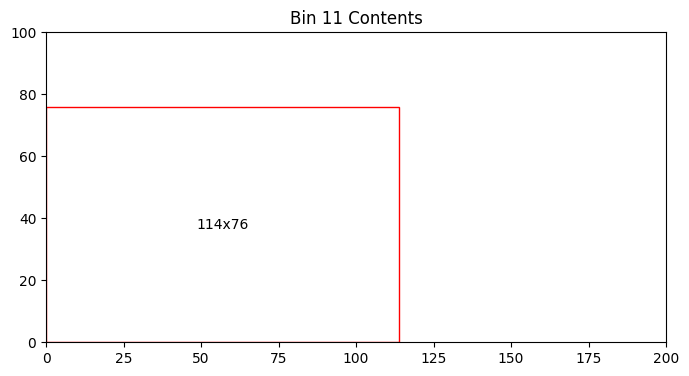

Bin 11 has 11336.00 units of area left, utilization: 43.32%


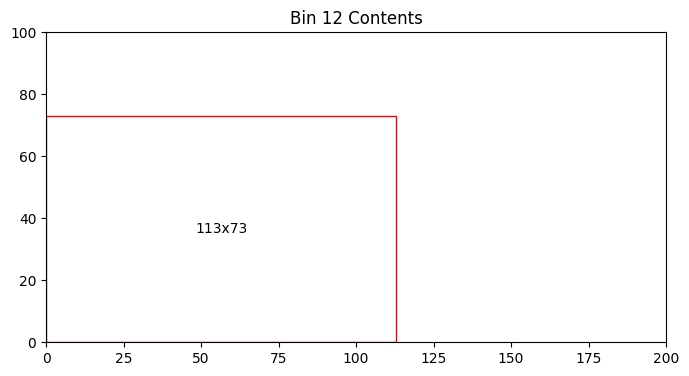

Bin 12 has 11751.00 units of area left, utilization: 41.24%


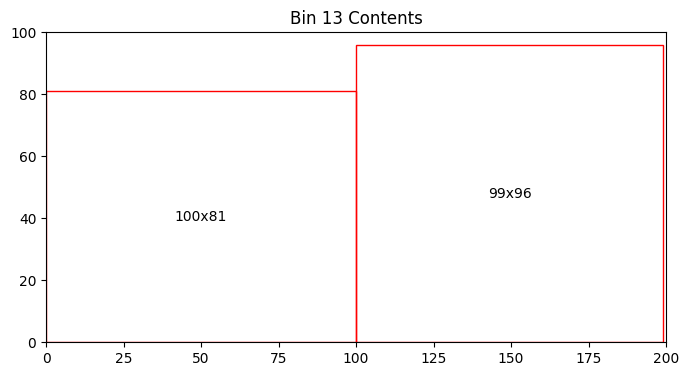

Bin 13 has 2396.00 units of area left, utilization: 88.02%


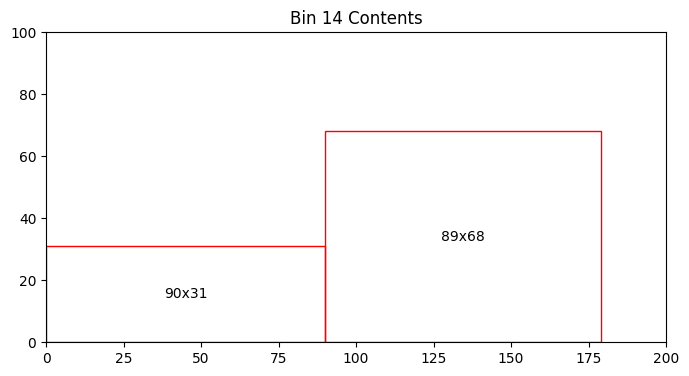

Bin 14 has 11158.00 units of area left, utilization: 44.21%
Total number of bins = 14
Total area left in bins = 65474.00
{'total_bins': 14, 'total_area_left': 65474, 'utilizations': [95.075, 96.54, 92.61500000000001, 87.69500000000001, 91.75999999999999, 96.41999999999999, 80.655, 84.345, 70.61, 60.12, 43.32, 41.245, 88.02, 44.21]}


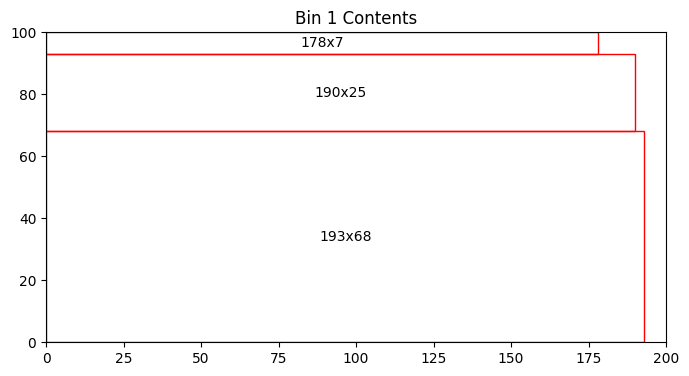

Bin 1 has 880.00 units of area left, utilization: 95.60%


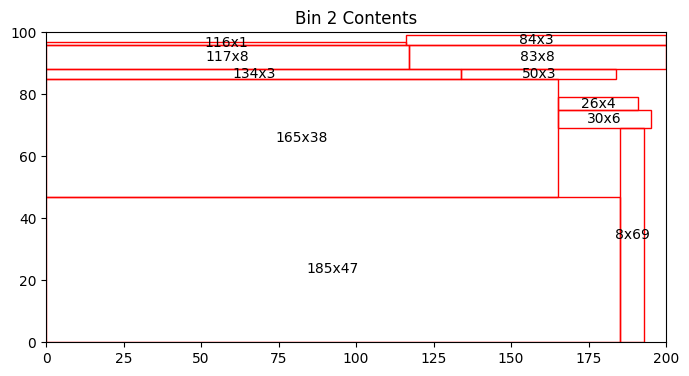

Bin 2 has 1679.00 units of area left, utilization: 91.61%


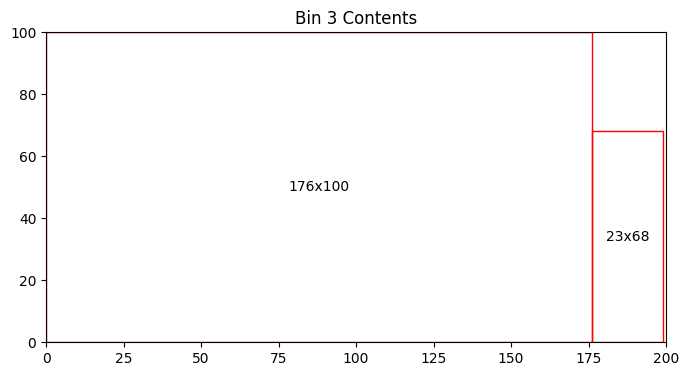

Bin 3 has 836.00 units of area left, utilization: 95.82%


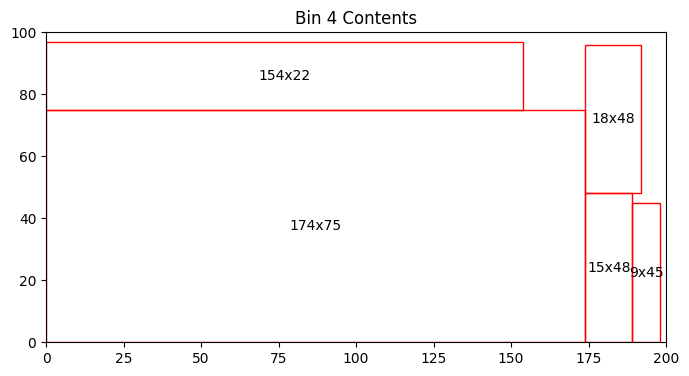

Bin 4 has 1573.00 units of area left, utilization: 92.14%


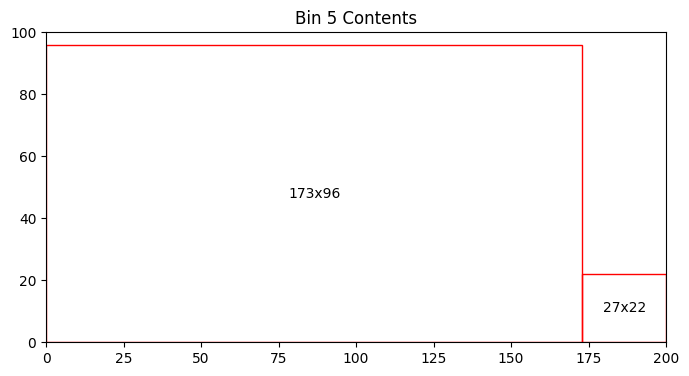

Bin 5 has 2798.00 units of area left, utilization: 86.01%


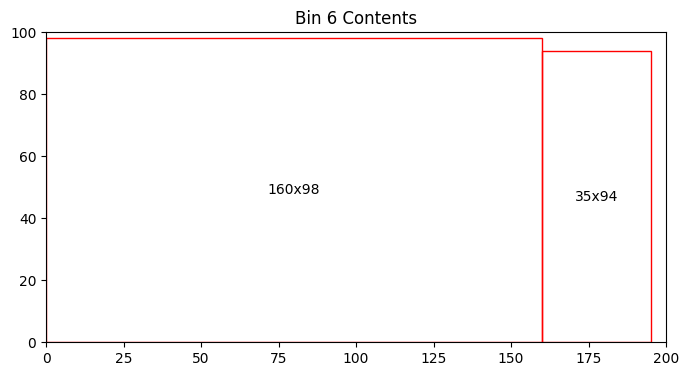

Bin 6 has 1030.00 units of area left, utilization: 94.85%


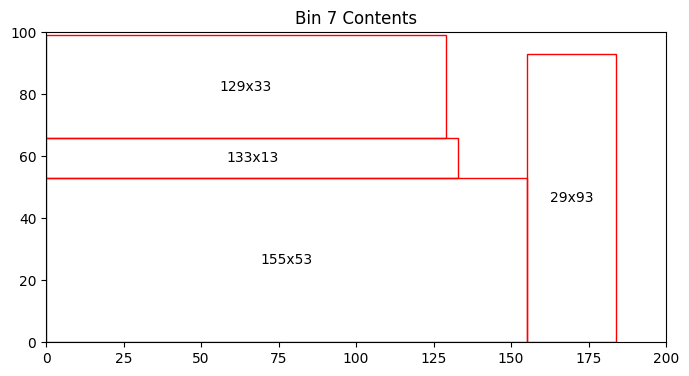

Bin 7 has 3102.00 units of area left, utilization: 84.49%


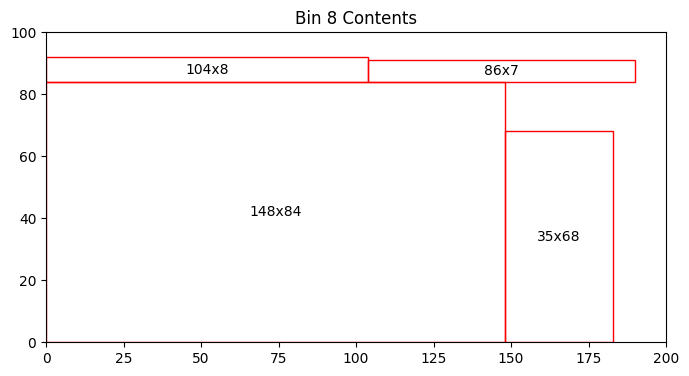

Bin 8 has 3754.00 units of area left, utilization: 81.23%


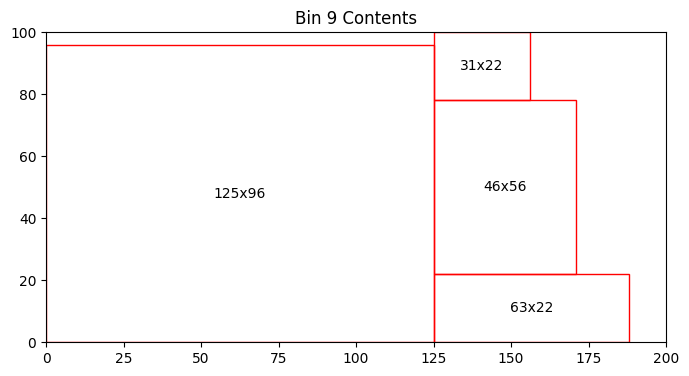

Bin 9 has 3356.00 units of area left, utilization: 83.22%


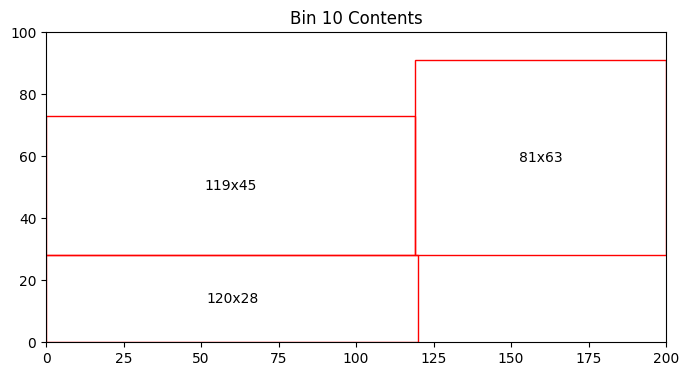

Bin 10 has 6182.00 units of area left, utilization: 69.09%


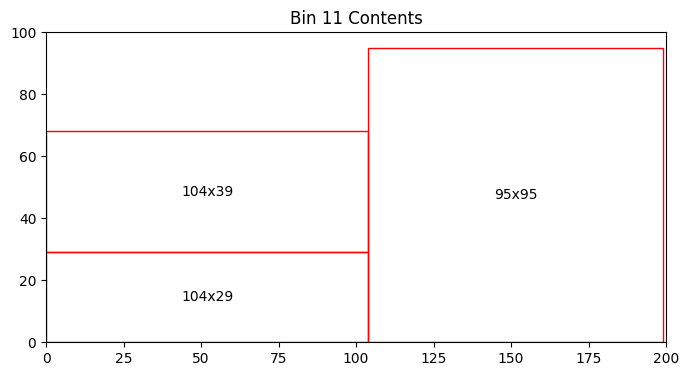

Bin 11 has 3903.00 units of area left, utilization: 80.48%


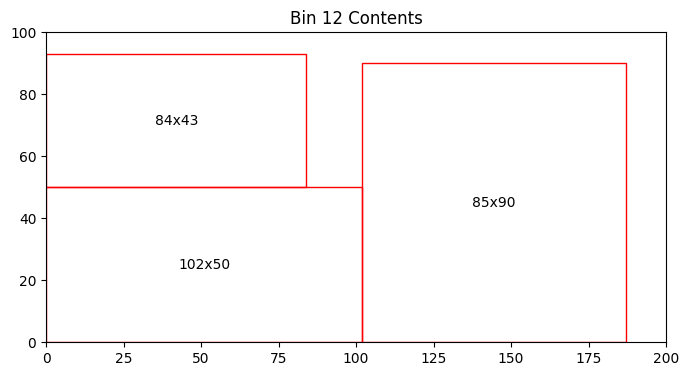

Bin 12 has 3638.00 units of area left, utilization: 81.81%


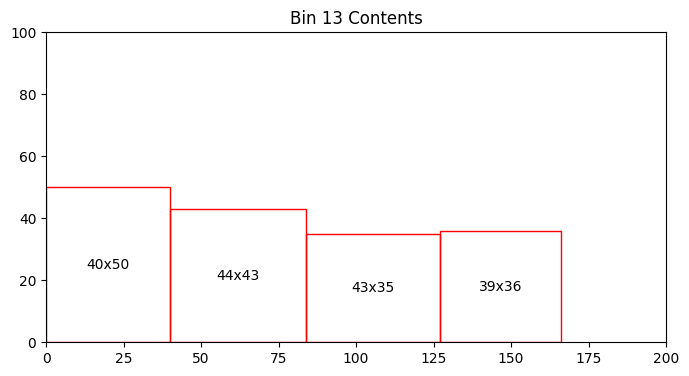

Bin 13 has 13199.00 units of area left, utilization: 34.01%
Total number of bins = 13
Total area left in bins = 45930.00
{'total_bins': 13, 'total_area_left': 45930, 'utilizations': [95.6, 91.605, 95.82000000000001, 92.135, 86.00999999999999, 94.85, 84.49, 81.23, 83.22, 69.08999999999999, 80.485, 81.81, 34.005]}


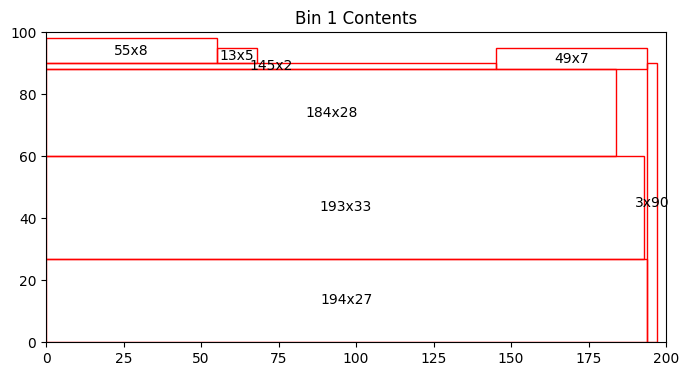

Bin 1 has 1833.00 units of area left, utilization: 90.83%


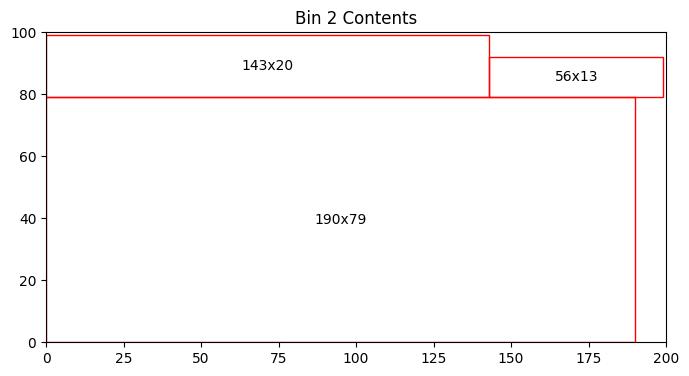

Bin 2 has 1402.00 units of area left, utilization: 92.99%


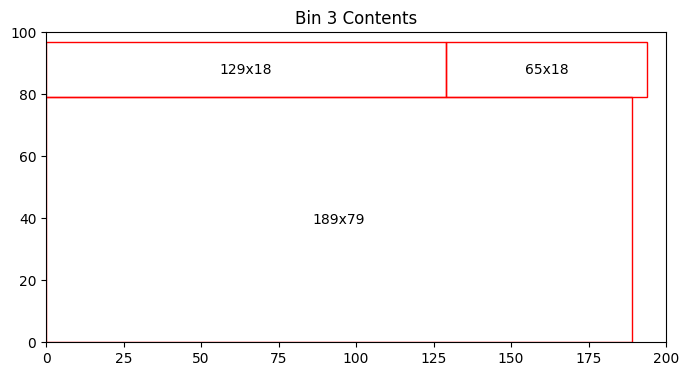

Bin 3 has 1577.00 units of area left, utilization: 92.12%


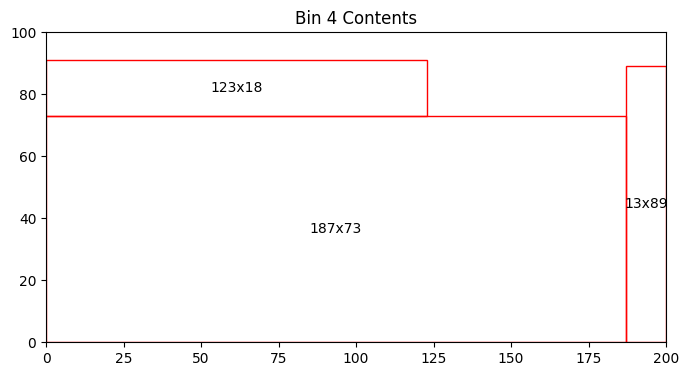

Bin 4 has 2978.00 units of area left, utilization: 85.11%


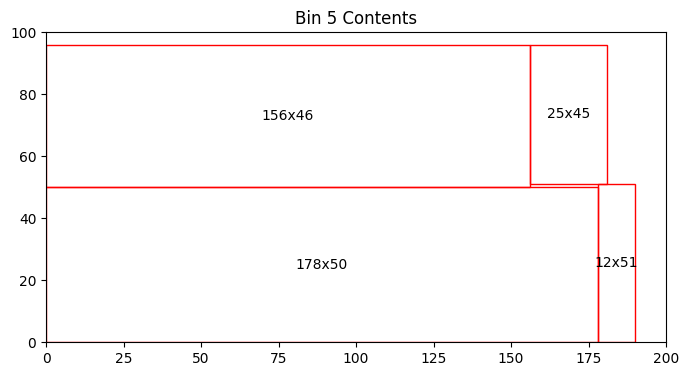

Bin 5 has 2187.00 units of area left, utilization: 89.07%


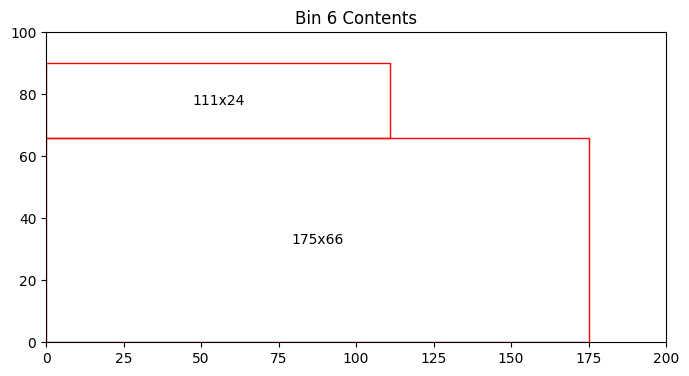

Bin 6 has 5786.00 units of area left, utilization: 71.07%


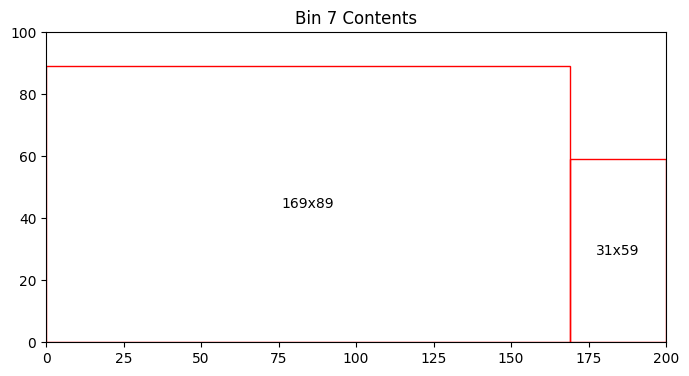

Bin 7 has 3130.00 units of area left, utilization: 84.35%


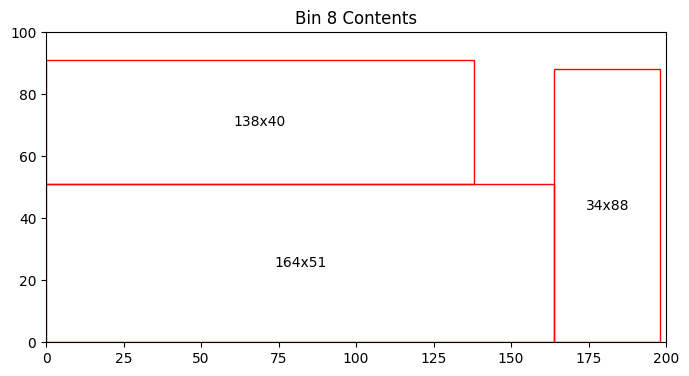

Bin 8 has 3124.00 units of area left, utilization: 84.38%


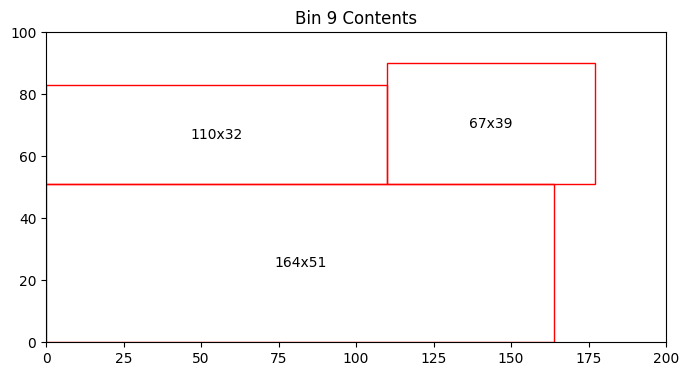

Bin 9 has 5503.00 units of area left, utilization: 72.48%


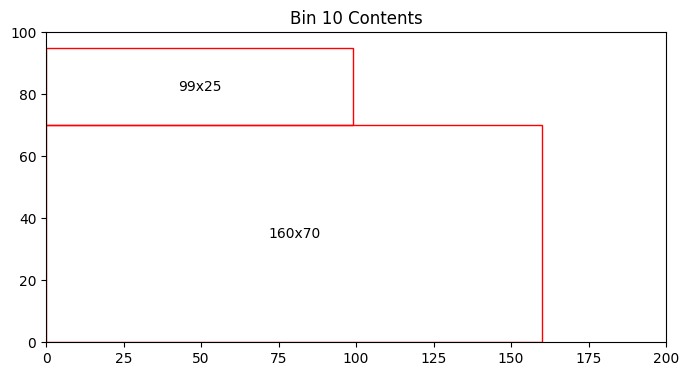

Bin 10 has 6325.00 units of area left, utilization: 68.38%


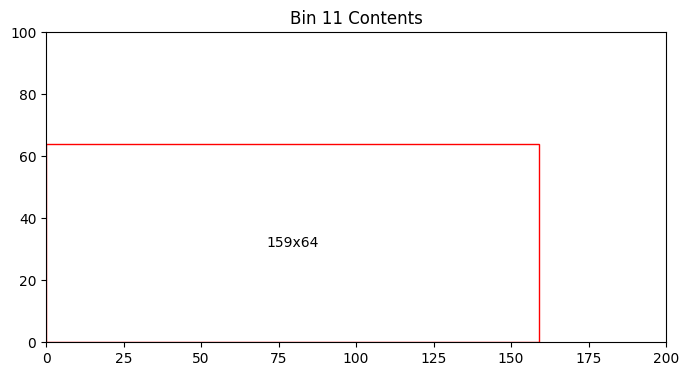

Bin 11 has 9824.00 units of area left, utilization: 50.88%


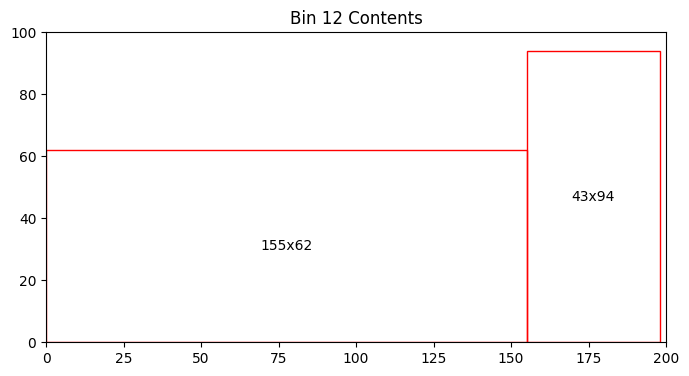

Bin 12 has 6348.00 units of area left, utilization: 68.26%


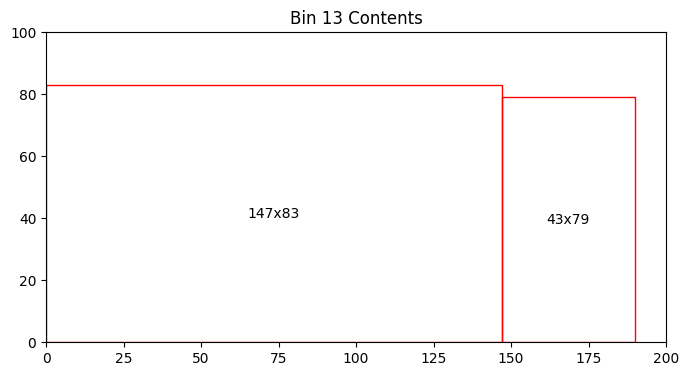

Bin 13 has 4402.00 units of area left, utilization: 77.99%


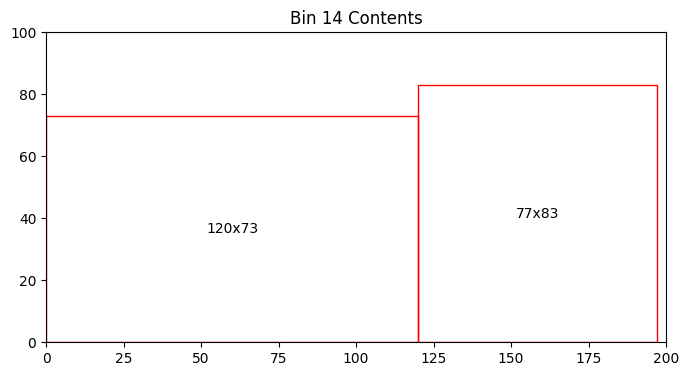

Bin 14 has 4849.00 units of area left, utilization: 75.75%


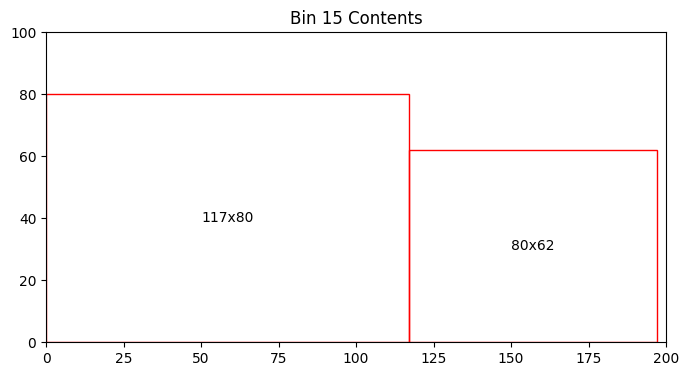

Bin 15 has 5680.00 units of area left, utilization: 71.60%


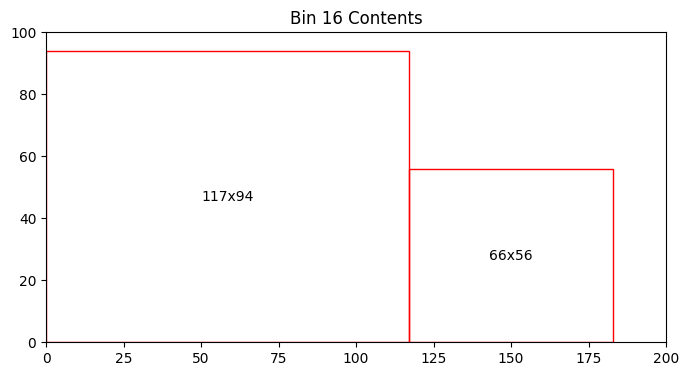

Bin 16 has 5306.00 units of area left, utilization: 73.47%


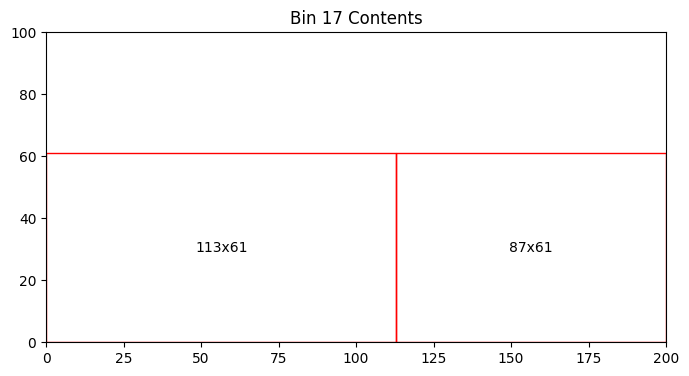

Bin 17 has 7800.00 units of area left, utilization: 61.00%


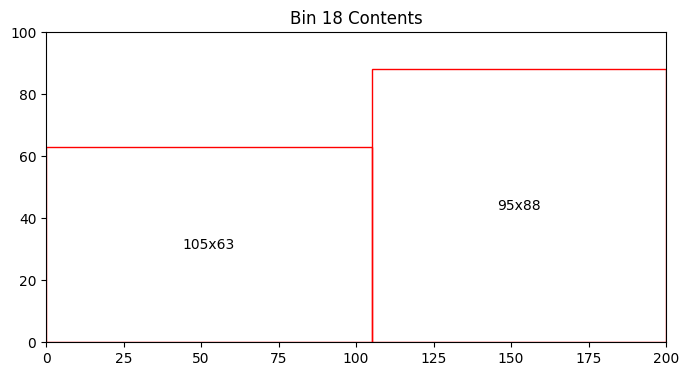

Bin 18 has 5025.00 units of area left, utilization: 74.88%


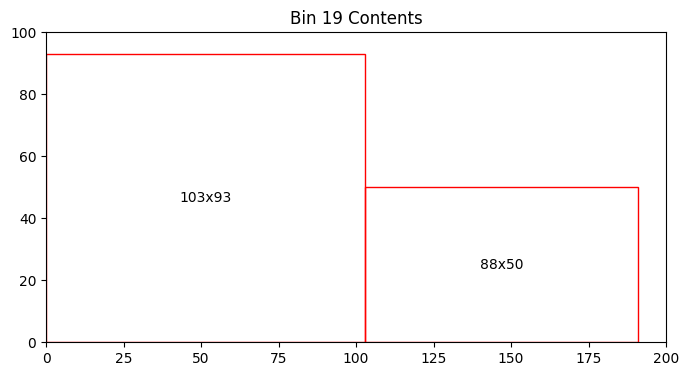

Bin 19 has 6021.00 units of area left, utilization: 69.89%
Total number of bins = 19
Total area left in bins = 89100.00
{'total_bins': 19, 'total_area_left': 89100, 'utilizations': [90.835, 92.99, 92.11500000000001, 85.11, 89.06500000000001, 71.07, 84.35000000000001, 84.38, 72.485, 68.375, 50.88, 68.26, 77.99000000000001, 75.755, 71.6, 73.47, 61.0, 74.875, 69.895]}


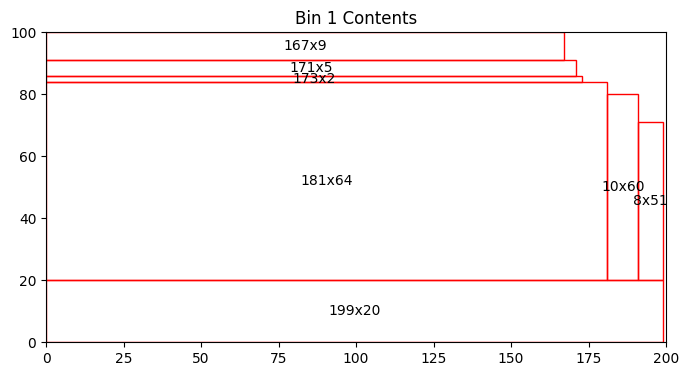

Bin 1 has 724.00 units of area left, utilization: 96.38%


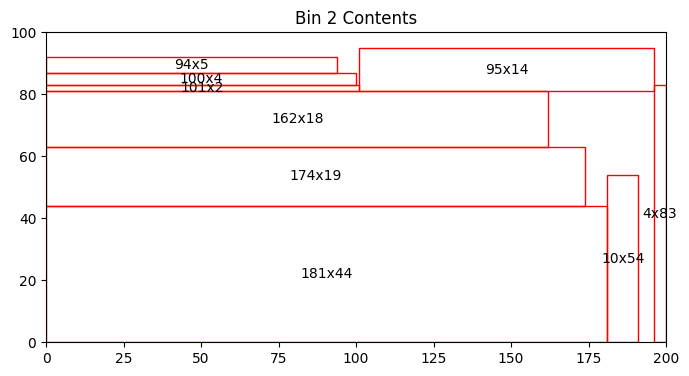

Bin 2 has 2540.00 units of area left, utilization: 87.30%


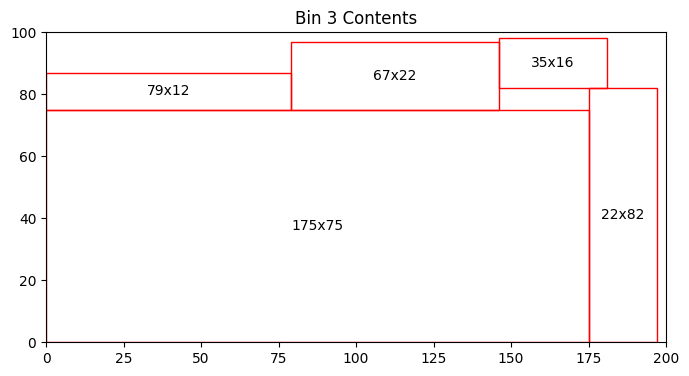

Bin 3 has 2089.00 units of area left, utilization: 89.55%


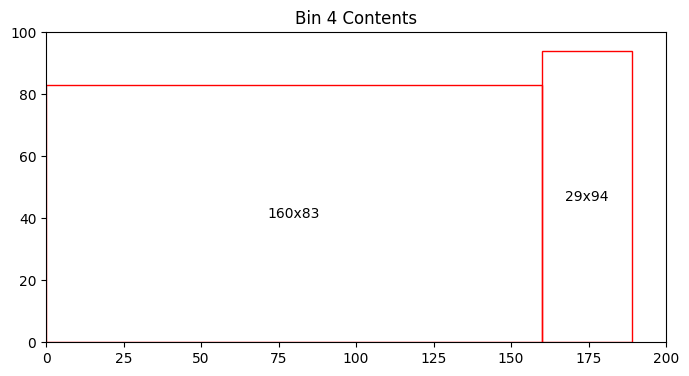

Bin 4 has 3994.00 units of area left, utilization: 80.03%


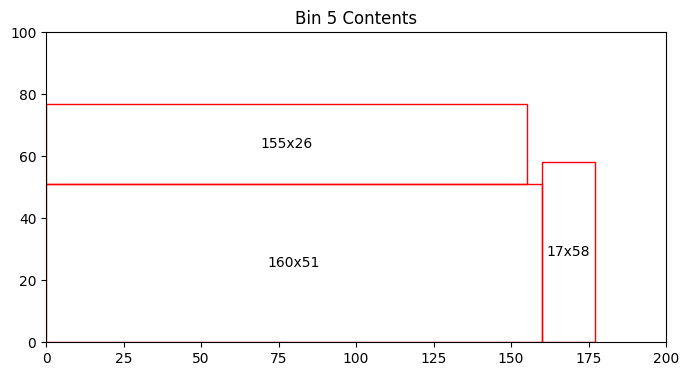

Bin 5 has 6824.00 units of area left, utilization: 65.88%


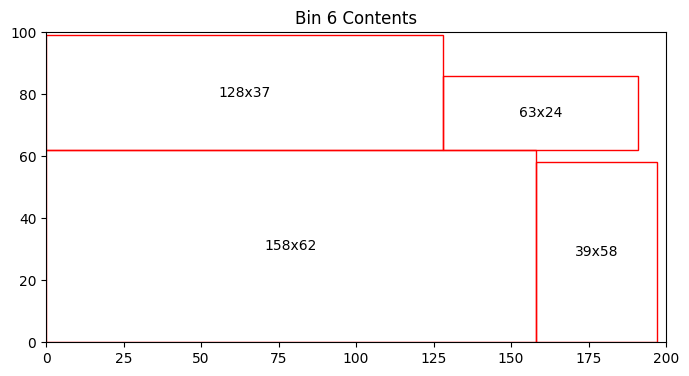

Bin 6 has 1694.00 units of area left, utilization: 91.53%


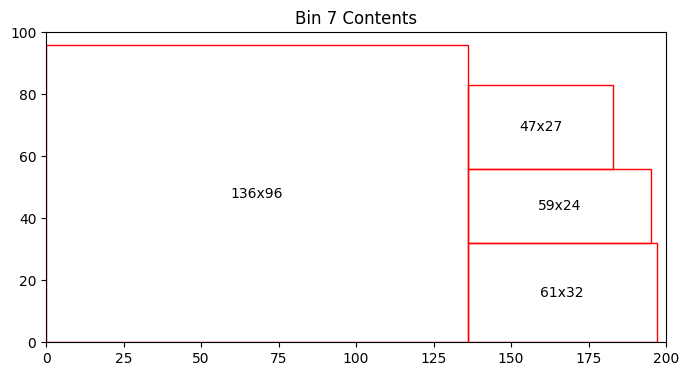

Bin 7 has 2307.00 units of area left, utilization: 88.47%


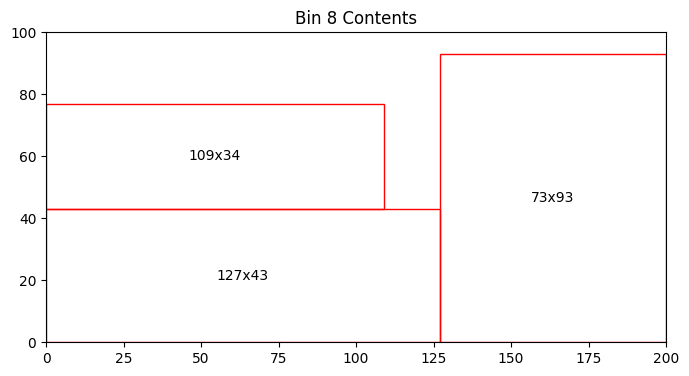

Bin 8 has 4044.00 units of area left, utilization: 79.78%


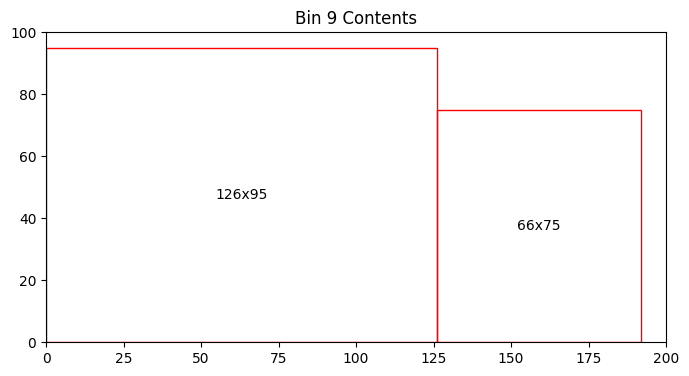

Bin 9 has 3080.00 units of area left, utilization: 84.60%


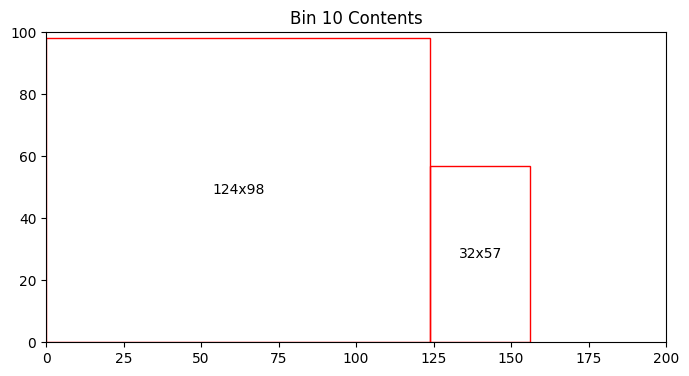

Bin 10 has 6024.00 units of area left, utilization: 69.88%


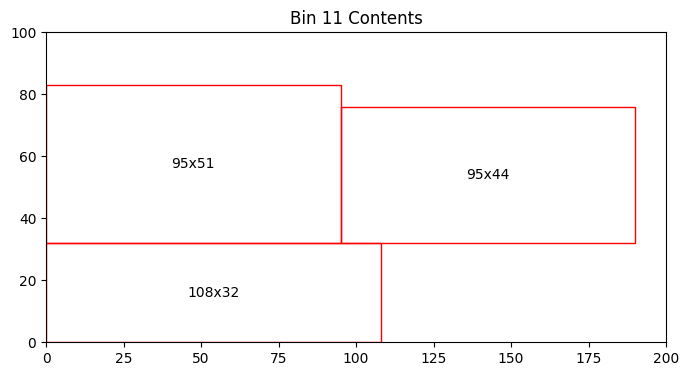

Bin 11 has 7519.00 units of area left, utilization: 62.41%


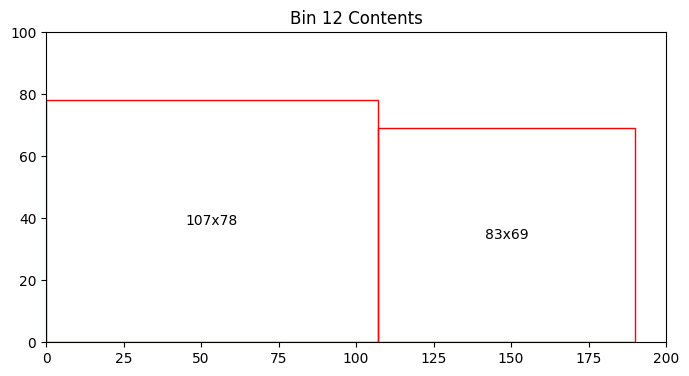

Bin 12 has 5927.00 units of area left, utilization: 70.36%


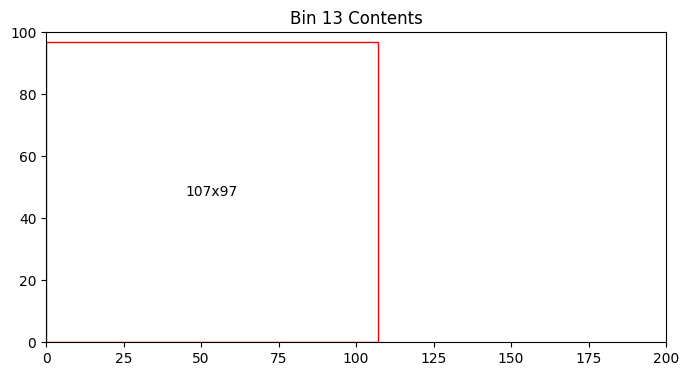

Bin 13 has 9621.00 units of area left, utilization: 51.90%


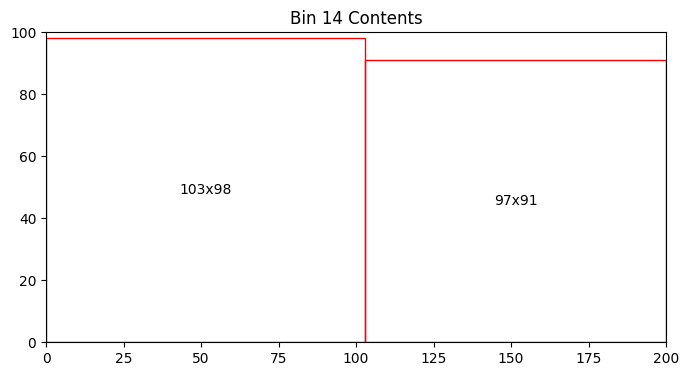

Bin 14 has 1079.00 units of area left, utilization: 94.60%


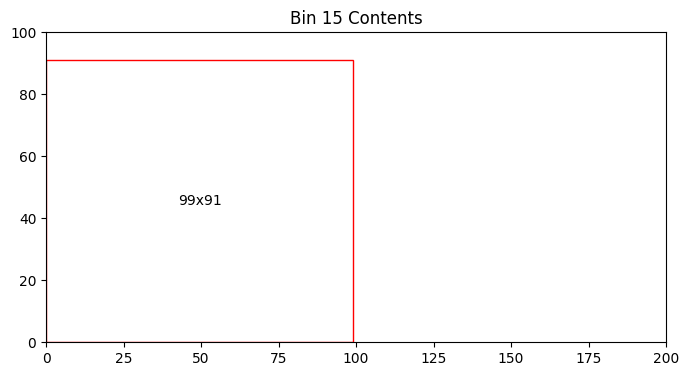

Bin 15 has 10991.00 units of area left, utilization: 45.05%
Total number of bins = 15
Total area left in bins = 68457.00
{'total_bins': 15, 'total_area_left': 68457, 'utilizations': [96.38, 87.3, 89.55499999999999, 80.03, 65.88000000000001, 91.53, 88.465, 79.78, 84.6, 69.88, 62.405, 70.365, 51.895, 94.60499999999999, 45.045]}


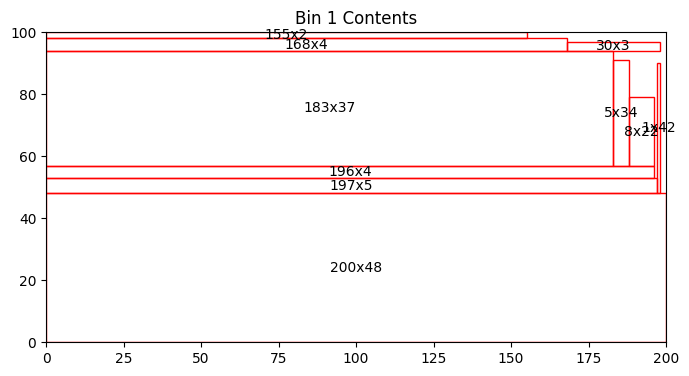

Bin 1 has 400.00 units of area left, utilization: 98.00%


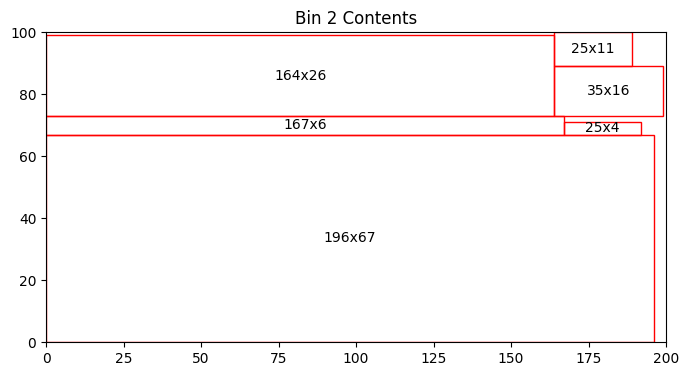

Bin 2 has 667.00 units of area left, utilization: 96.67%


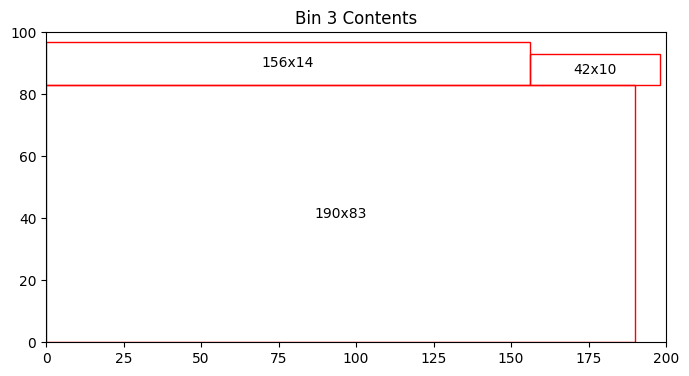

Bin 3 has 1626.00 units of area left, utilization: 91.87%


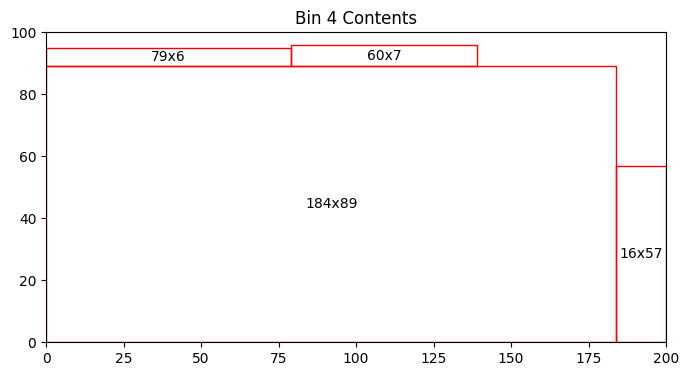

Bin 4 has 1818.00 units of area left, utilization: 90.91%


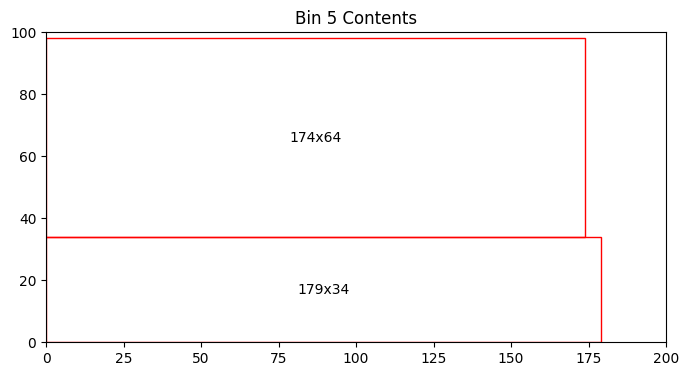

Bin 5 has 2778.00 units of area left, utilization: 86.11%


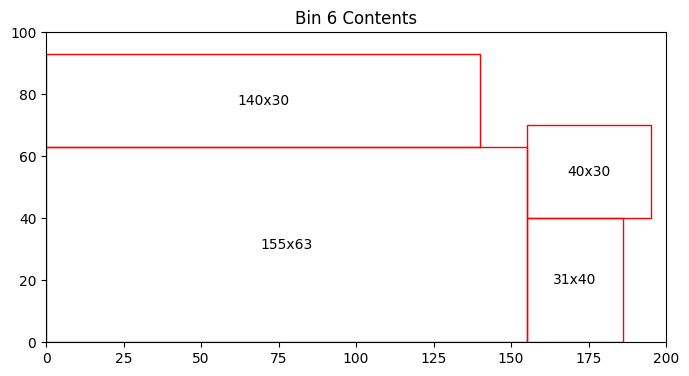

Bin 6 has 3595.00 units of area left, utilization: 82.03%


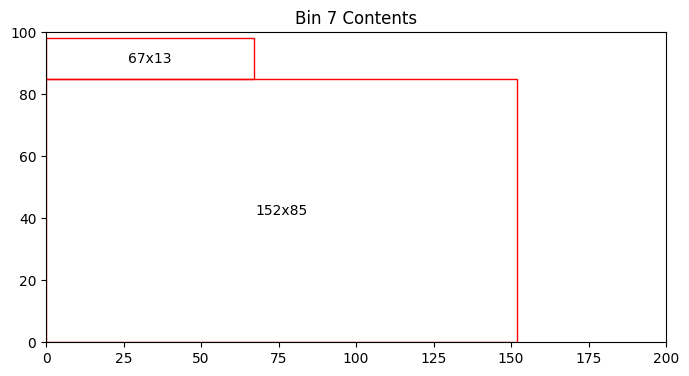

Bin 7 has 6209.00 units of area left, utilization: 68.95%


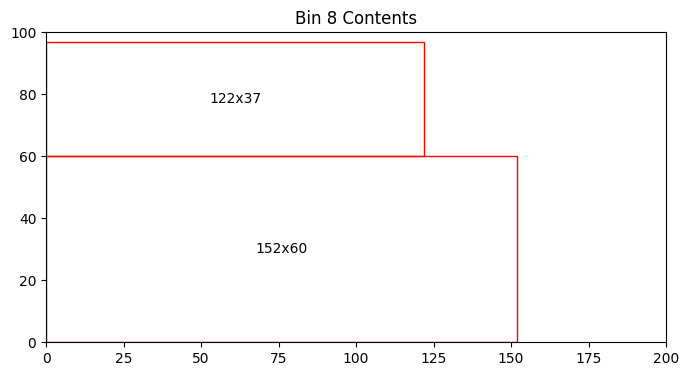

Bin 8 has 6366.00 units of area left, utilization: 68.17%


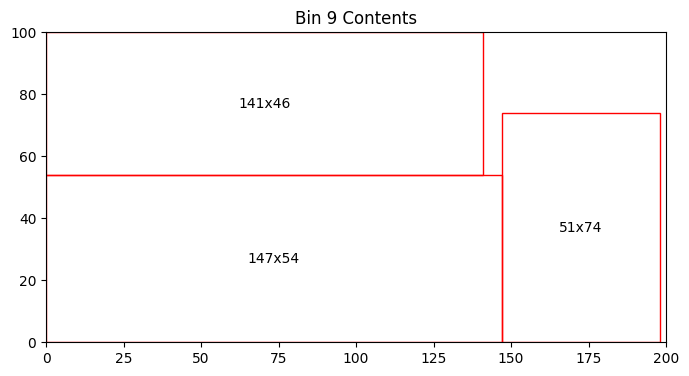

Bin 9 has 1802.00 units of area left, utilization: 90.99%


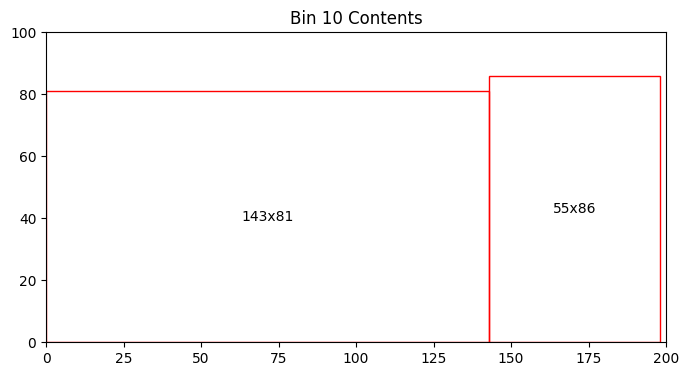

Bin 10 has 3687.00 units of area left, utilization: 81.56%


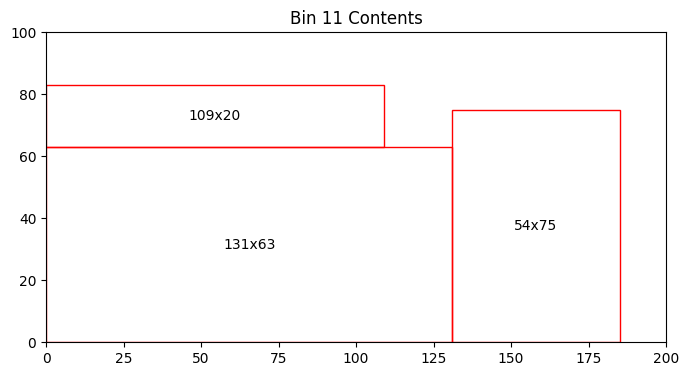

Bin 11 has 5517.00 units of area left, utilization: 72.41%


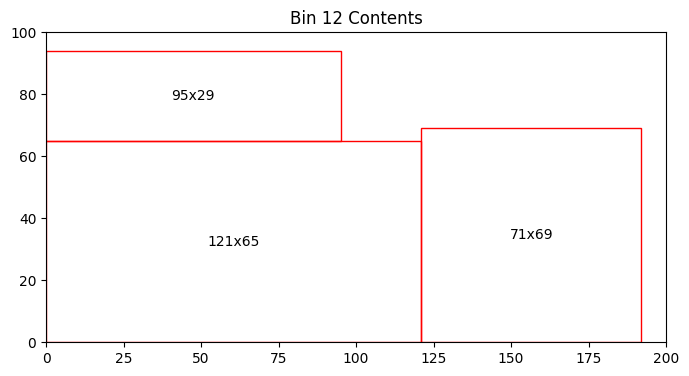

Bin 12 has 4481.00 units of area left, utilization: 77.59%


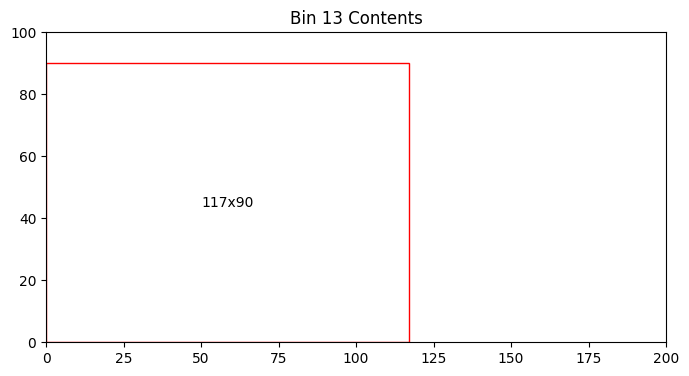

Bin 13 has 9470.00 units of area left, utilization: 52.65%


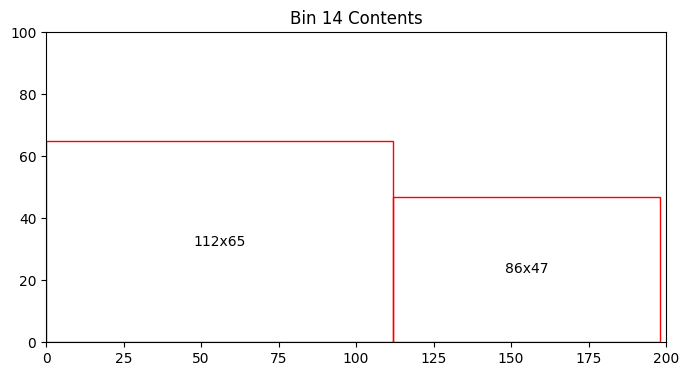

Bin 14 has 8678.00 units of area left, utilization: 56.61%


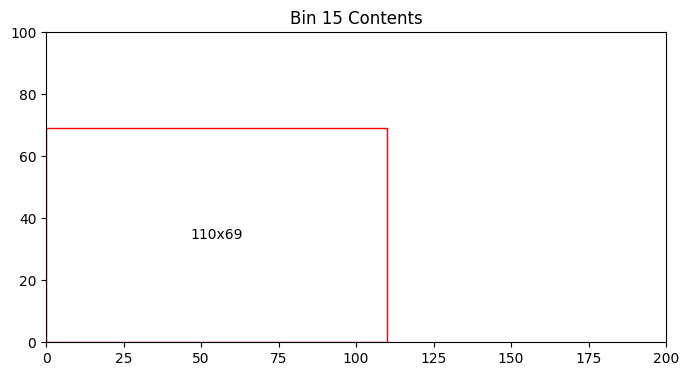

Bin 15 has 12410.00 units of area left, utilization: 37.95%


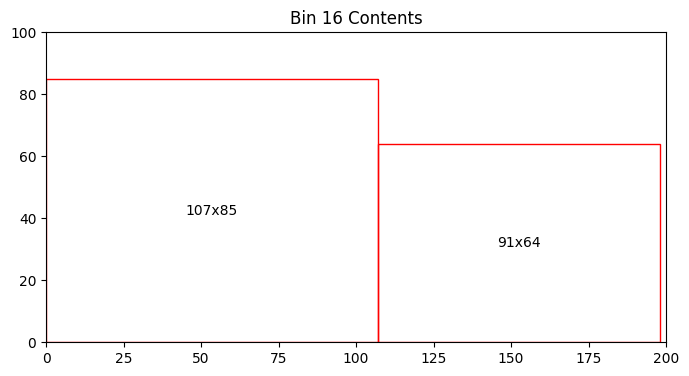

Bin 16 has 5081.00 units of area left, utilization: 74.59%
Total number of bins = 16
Total area left in bins = 74585.00
{'total_bins': 16, 'total_area_left': 74585, 'utilizations': [98.0, 96.665, 91.86999999999999, 90.91, 86.11, 82.025, 68.955, 68.17, 90.99000000000001, 81.565, 72.41499999999999, 77.595, 52.65, 56.61000000000001, 37.95, 74.595]}


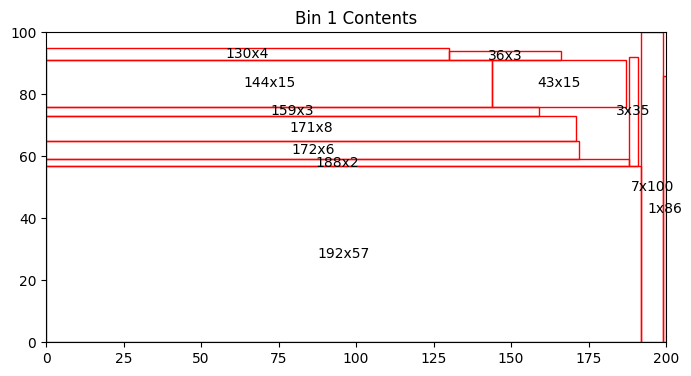

Bin 1 has 1479.00 units of area left, utilization: 92.61%


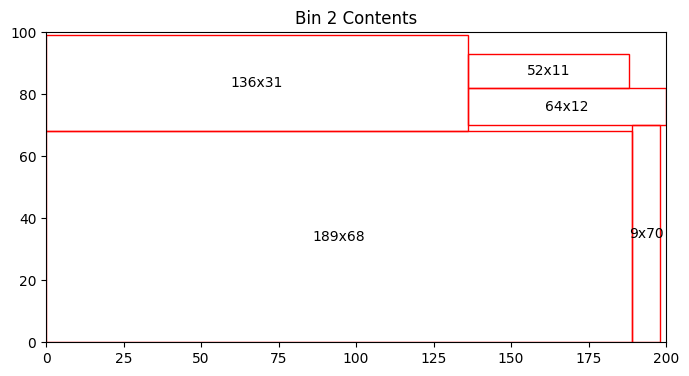

Bin 2 has 962.00 units of area left, utilization: 95.19%


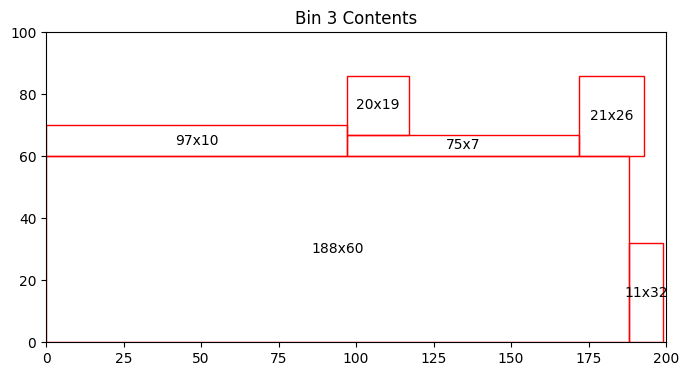

Bin 3 has 5947.00 units of area left, utilization: 70.27%


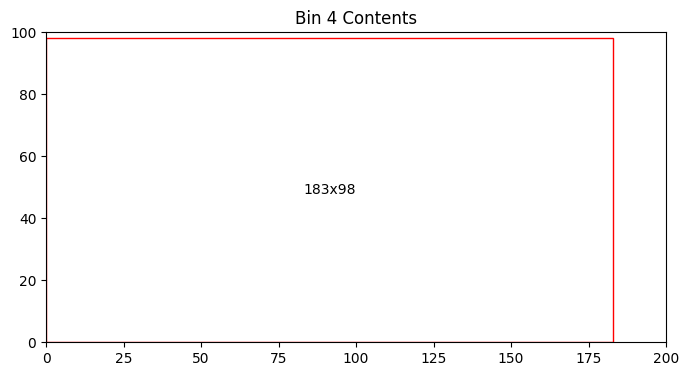

Bin 4 has 2066.00 units of area left, utilization: 89.67%


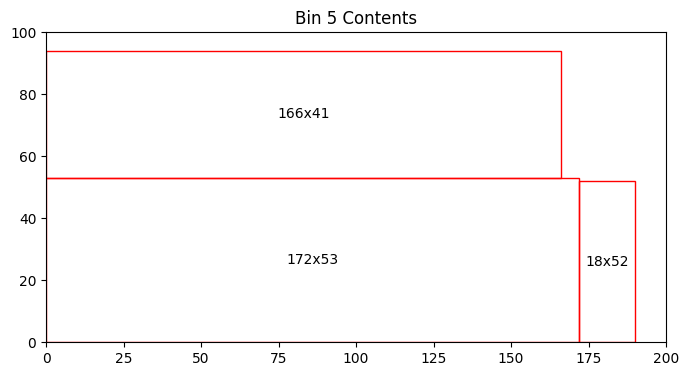

Bin 5 has 3142.00 units of area left, utilization: 84.29%


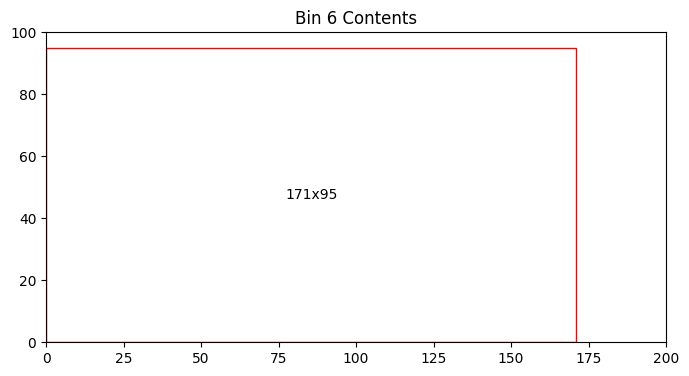

Bin 6 has 3755.00 units of area left, utilization: 81.23%


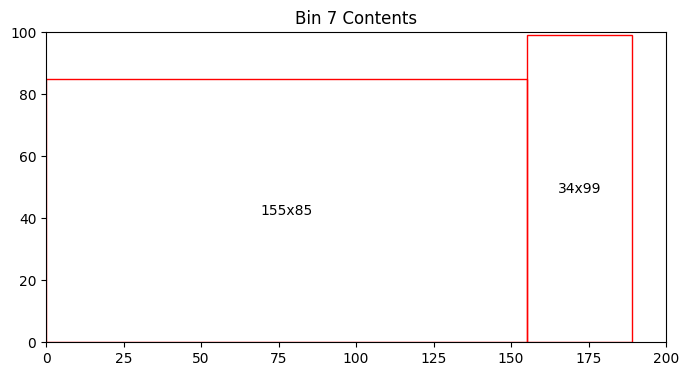

Bin 7 has 3459.00 units of area left, utilization: 82.70%


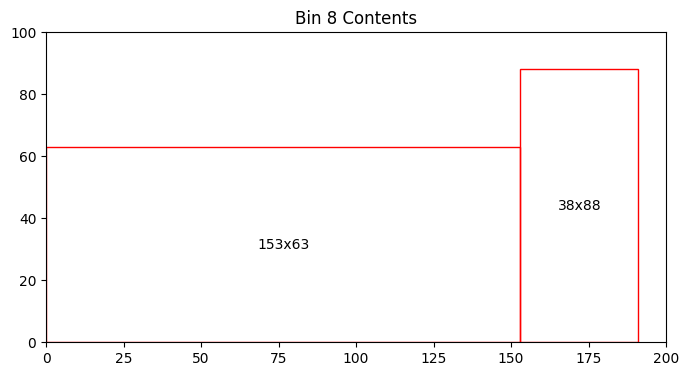

Bin 8 has 7017.00 units of area left, utilization: 64.92%


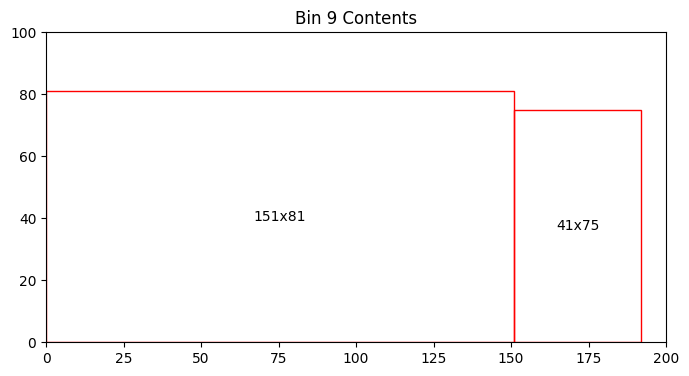

Bin 9 has 4694.00 units of area left, utilization: 76.53%


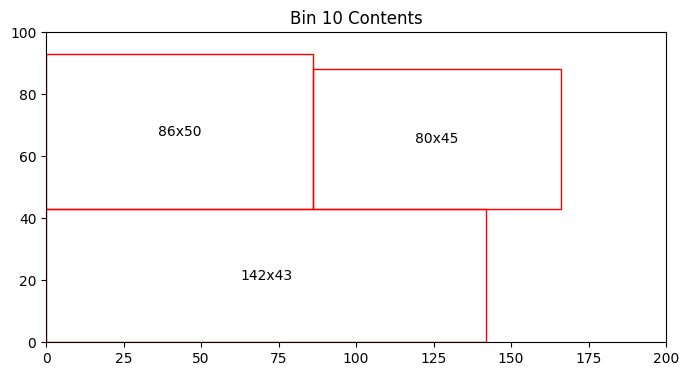

Bin 10 has 5994.00 units of area left, utilization: 70.03%


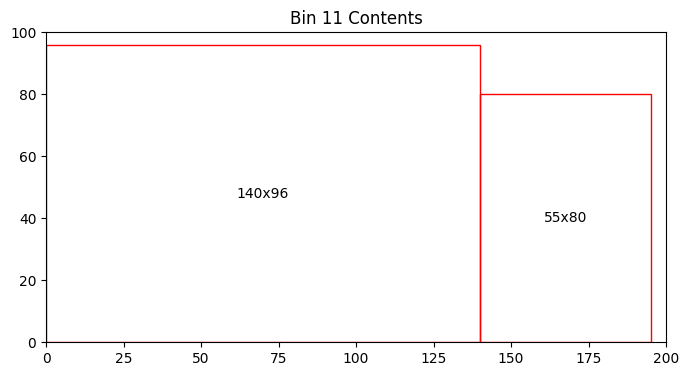

Bin 11 has 2160.00 units of area left, utilization: 89.20%


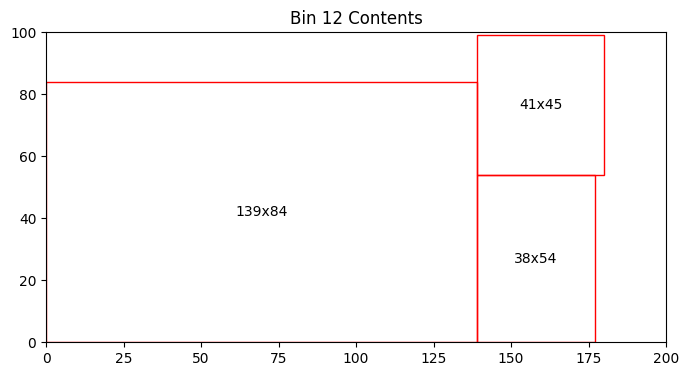

Bin 12 has 4427.00 units of area left, utilization: 77.86%


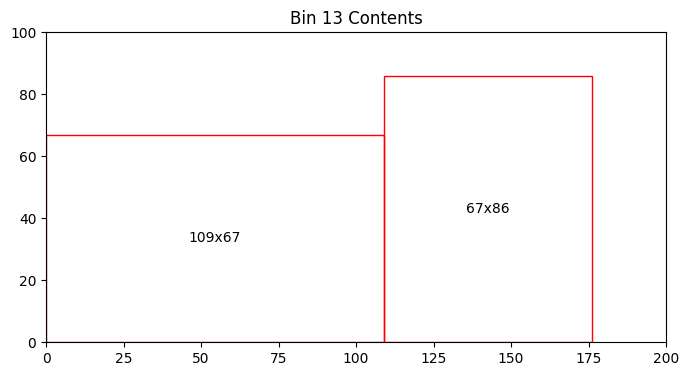

Bin 13 has 6935.00 units of area left, utilization: 65.33%


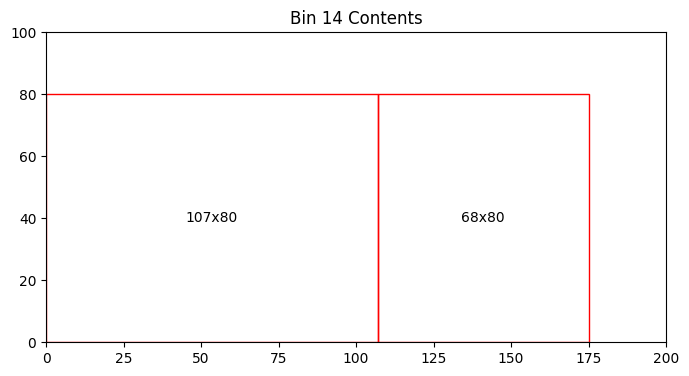

Bin 14 has 6000.00 units of area left, utilization: 70.00%


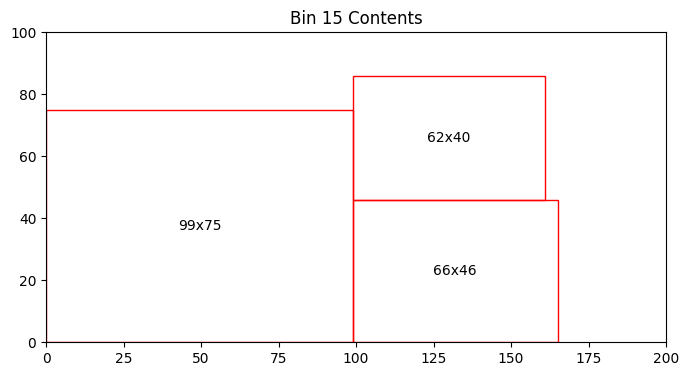

Bin 15 has 7059.00 units of area left, utilization: 64.70%


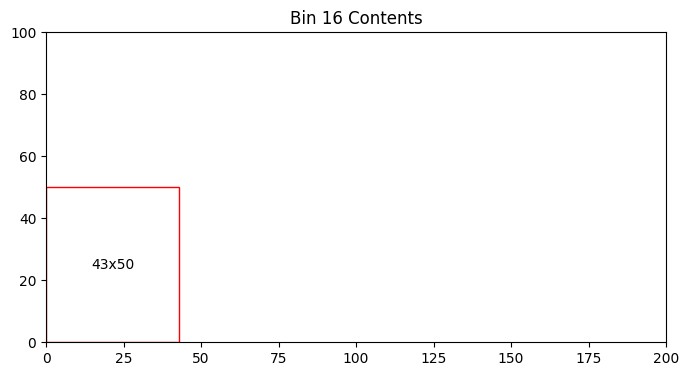

Bin 16 has 17850.00 units of area left, utilization: 10.75%
Total number of bins = 16
Total area left in bins = 82946.00
{'total_bins': 16, 'total_area_left': 82946, 'utilizations': [92.605, 95.19, 70.265, 89.67, 84.28999999999999, 81.22500000000001, 82.705, 64.915, 76.53, 70.03, 89.2, 77.865, 65.325, 70.0, 64.705, 10.75]}


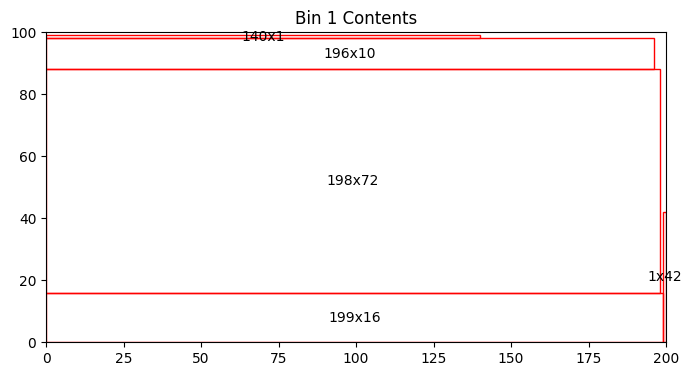

Bin 1 has 418.00 units of area left, utilization: 97.91%


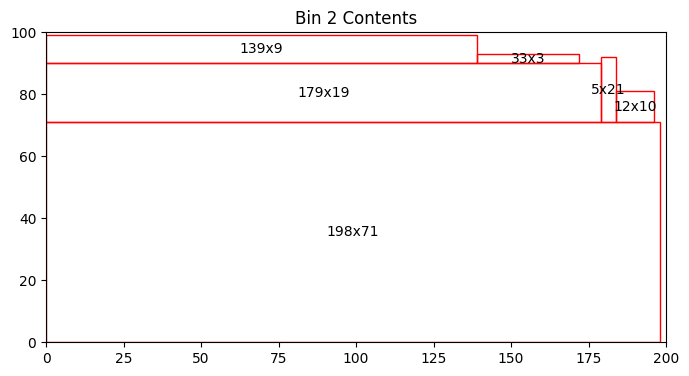

Bin 2 has 966.00 units of area left, utilization: 95.17%


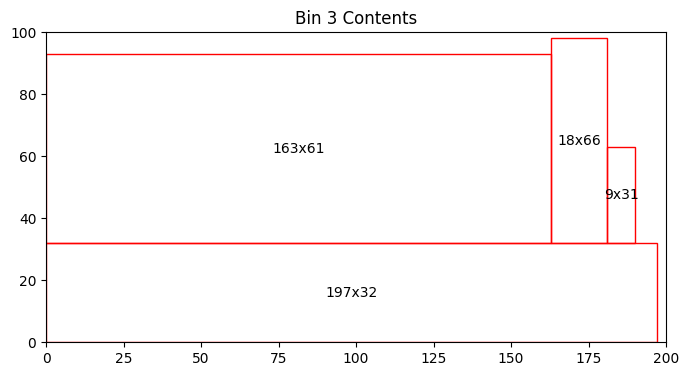

Bin 3 has 2286.00 units of area left, utilization: 88.57%


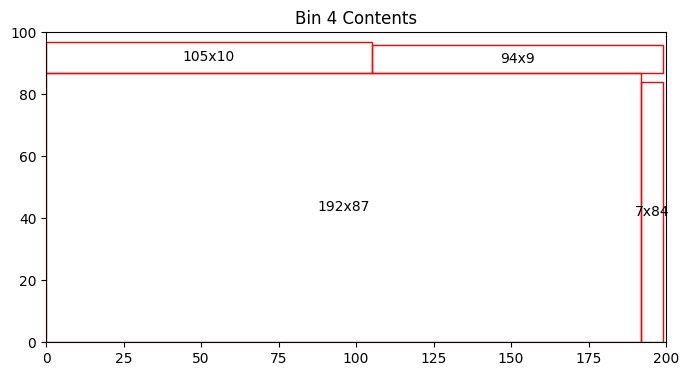

Bin 4 has 812.00 units of area left, utilization: 95.94%


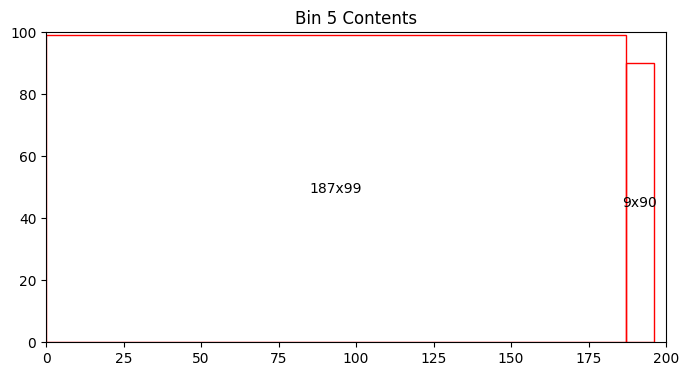

Bin 5 has 677.00 units of area left, utilization: 96.61%


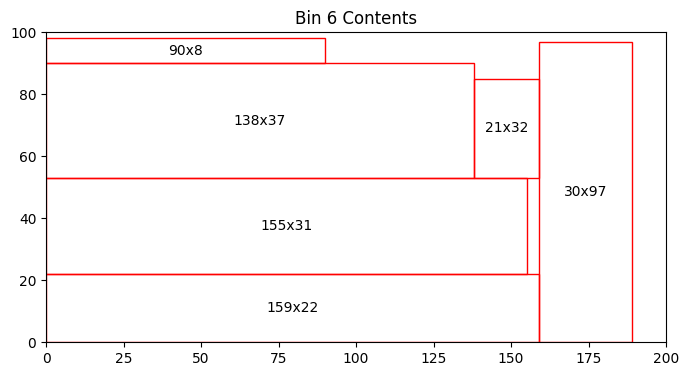

Bin 6 has 2289.00 units of area left, utilization: 88.55%


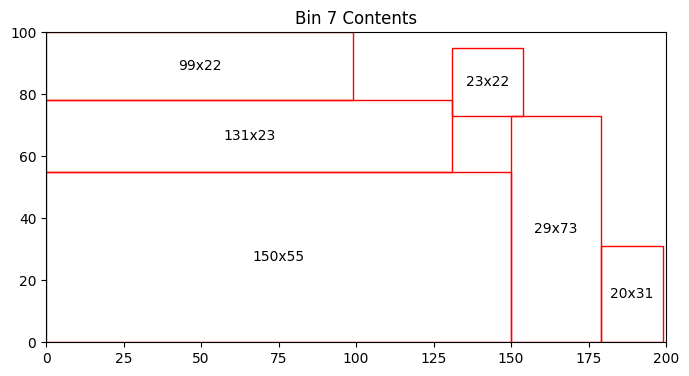

Bin 7 has 3316.00 units of area left, utilization: 83.42%


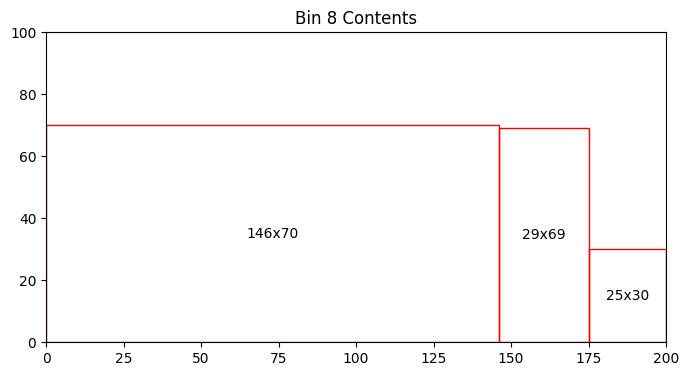

Bin 8 has 7029.00 units of area left, utilization: 64.85%


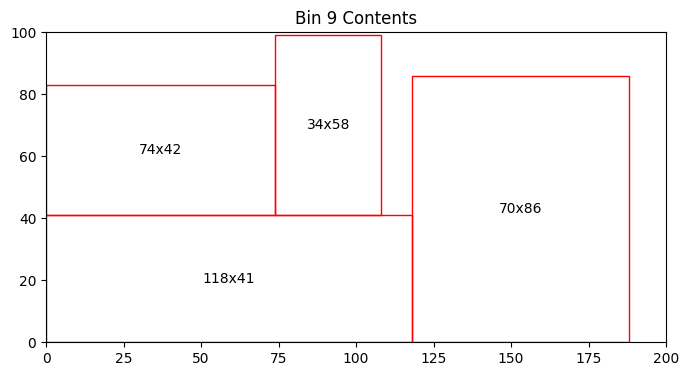

Bin 9 has 4062.00 units of area left, utilization: 79.69%


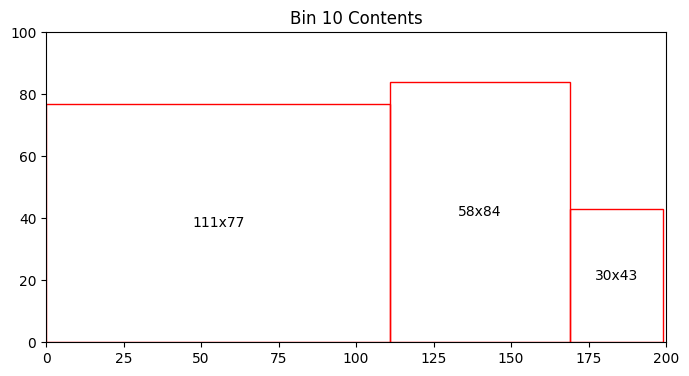

Bin 10 has 5291.00 units of area left, utilization: 73.55%


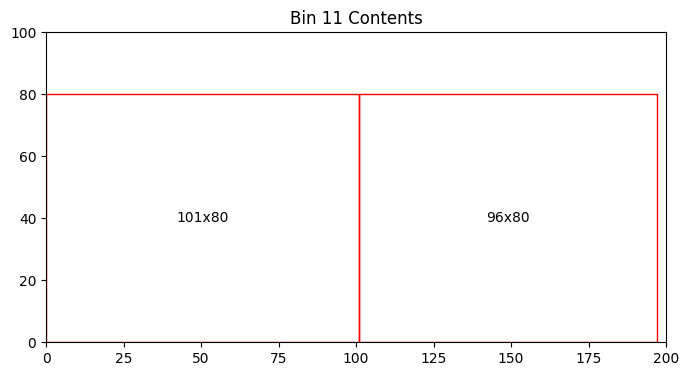

Bin 11 has 4240.00 units of area left, utilization: 78.80%


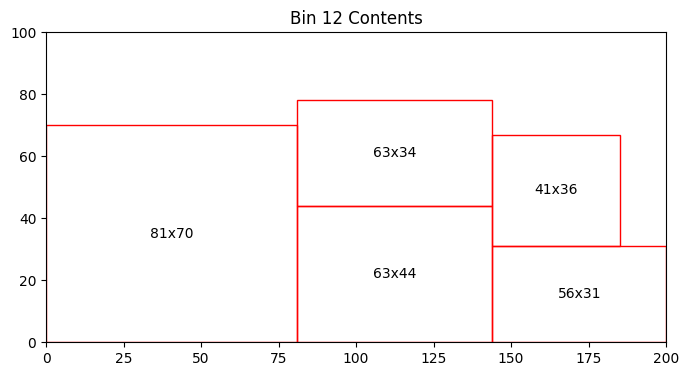

Bin 12 has 6204.00 units of area left, utilization: 68.98%
Total number of bins = 12
Total area left in bins = 37590.00
{'total_bins': 12, 'total_area_left': 37590, 'utilizations': [97.91, 95.17, 88.57000000000001, 95.94, 96.615, 88.55499999999999, 83.42, 64.85499999999999, 79.69000000000001, 73.545, 78.8, 68.97999999999999]}


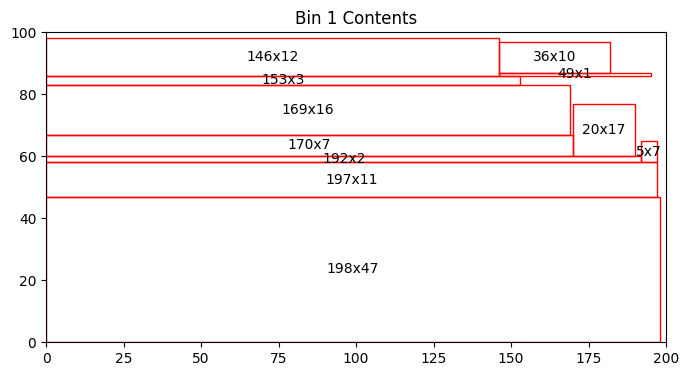

Bin 1 has 1254.00 units of area left, utilization: 93.73%


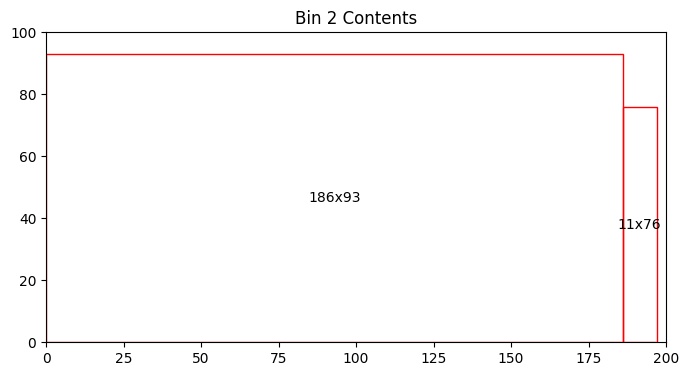

Bin 2 has 1866.00 units of area left, utilization: 90.67%


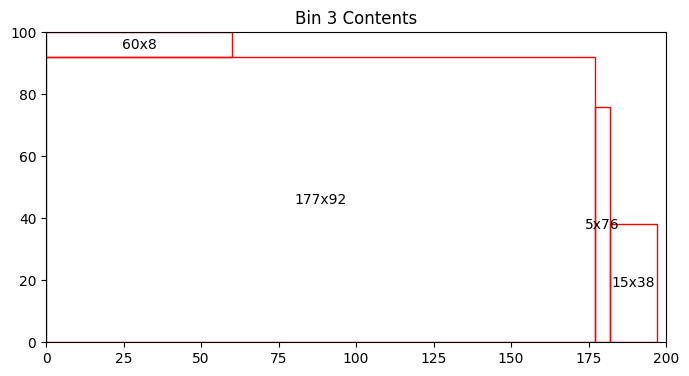

Bin 3 has 2286.00 units of area left, utilization: 88.57%


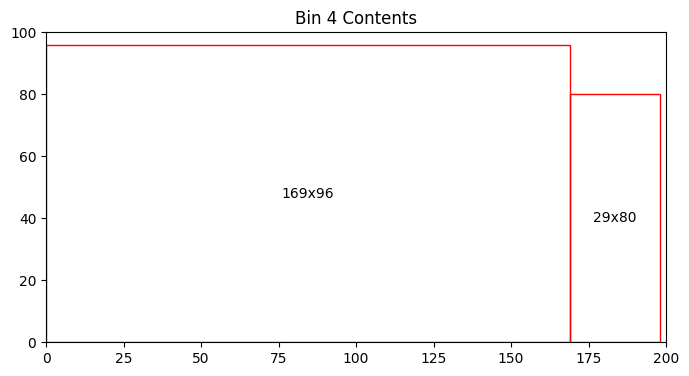

Bin 4 has 1456.00 units of area left, utilization: 92.72%


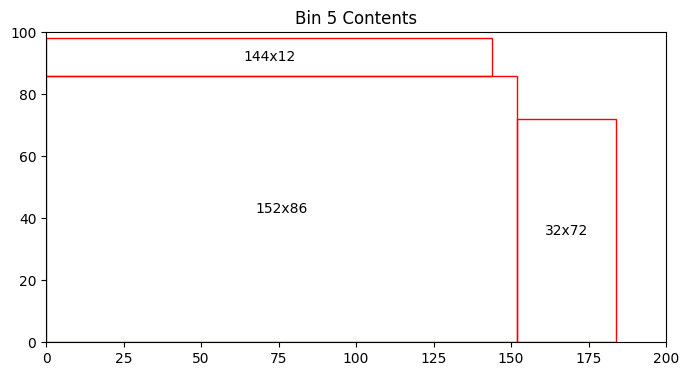

Bin 5 has 2896.00 units of area left, utilization: 85.52%


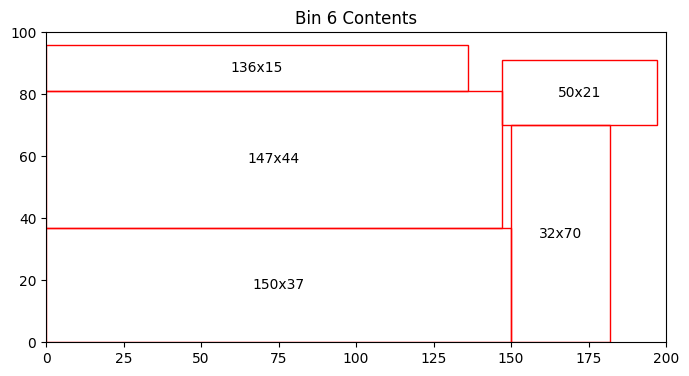

Bin 6 has 2652.00 units of area left, utilization: 86.74%


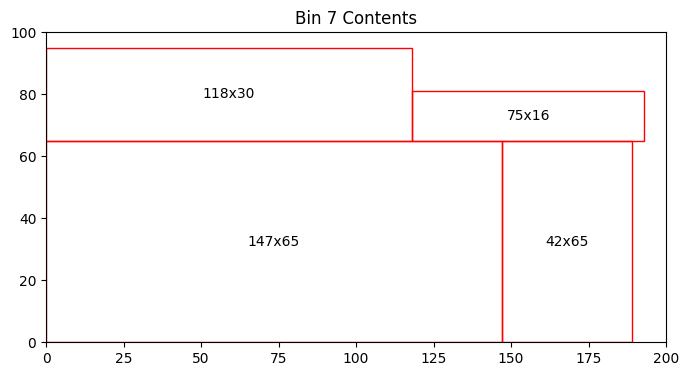

Bin 7 has 2975.00 units of area left, utilization: 85.12%


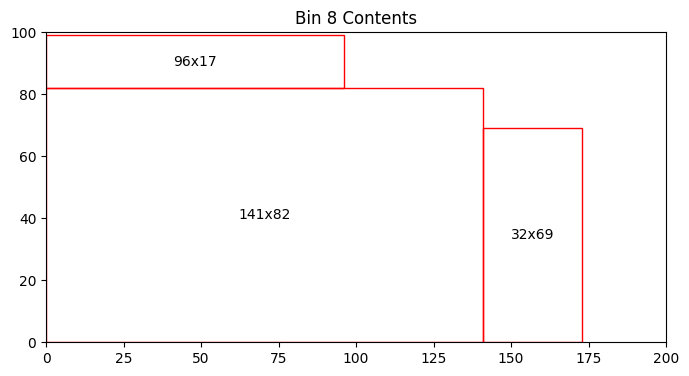

Bin 8 has 4598.00 units of area left, utilization: 77.01%


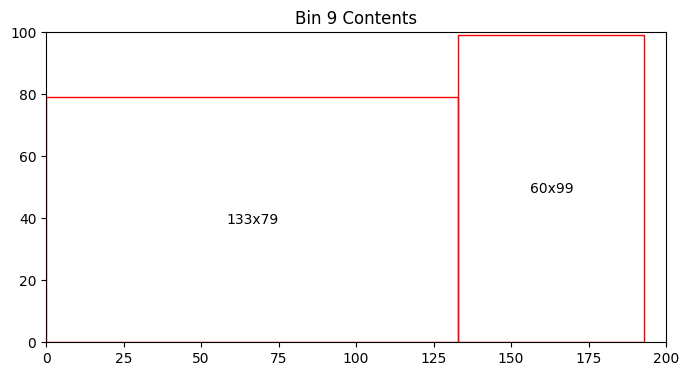

Bin 9 has 3553.00 units of area left, utilization: 82.23%


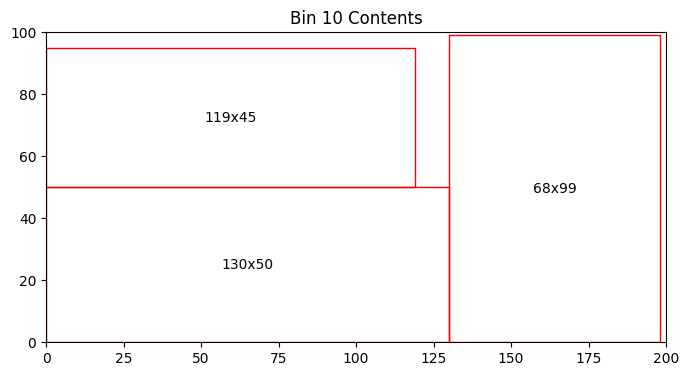

Bin 10 has 1413.00 units of area left, utilization: 92.94%


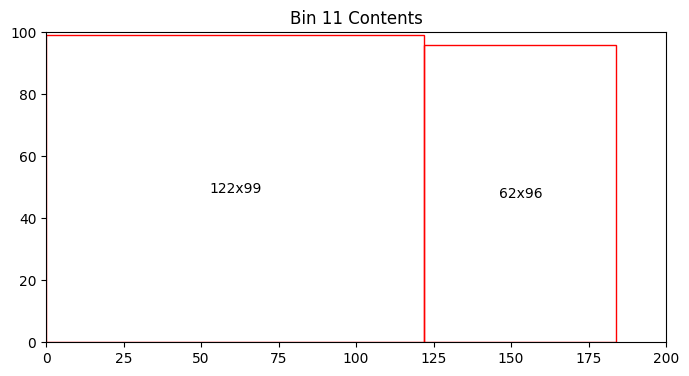

Bin 11 has 1970.00 units of area left, utilization: 90.15%


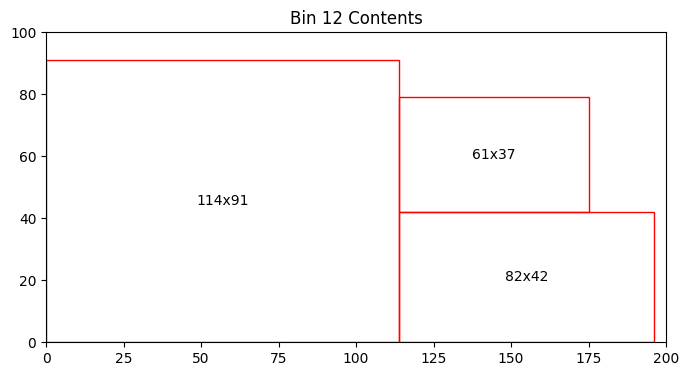

Bin 12 has 3925.00 units of area left, utilization: 80.38%


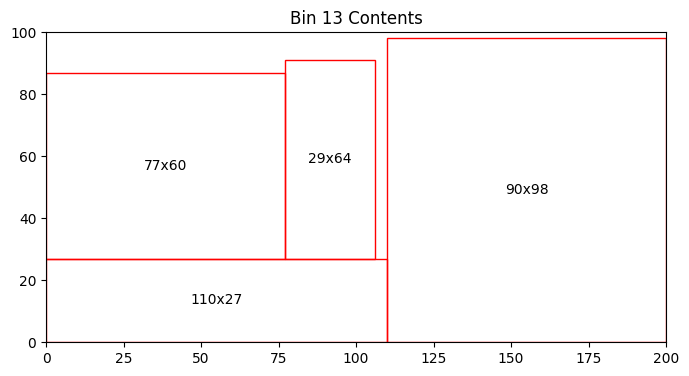

Bin 13 has 1734.00 units of area left, utilization: 91.33%


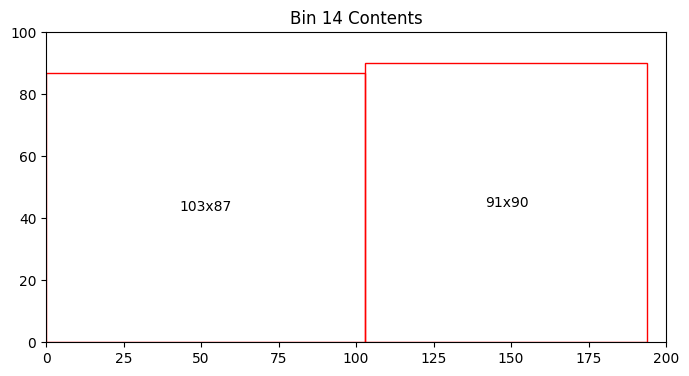

Bin 14 has 2849.00 units of area left, utilization: 85.76%
Total number of bins = 14
Total area left in bins = 35427.00
{'total_bins': 14, 'total_area_left': 35427, 'utilizations': [93.73, 90.67, 88.57000000000001, 92.72, 85.52, 86.74, 85.125, 77.01, 82.235, 92.935, 90.14999999999999, 80.375, 91.33, 85.75500000000001]}


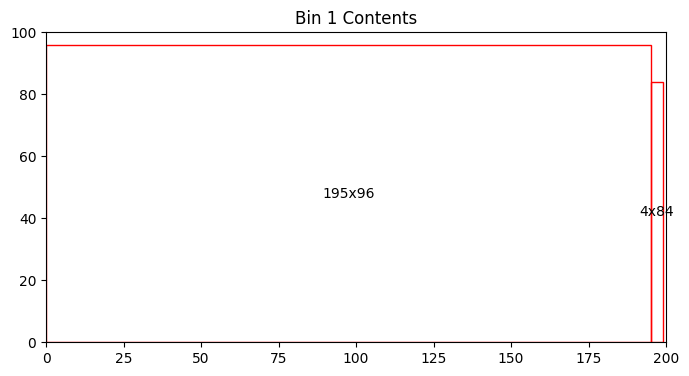

Bin 1 has 944.00 units of area left, utilization: 95.28%


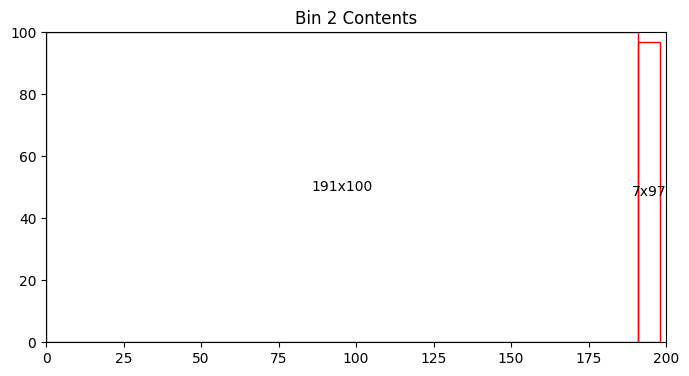

Bin 2 has 221.00 units of area left, utilization: 98.89%


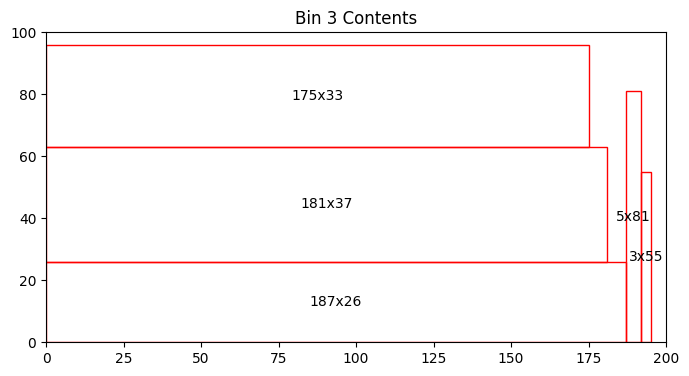

Bin 3 has 2096.00 units of area left, utilization: 89.52%


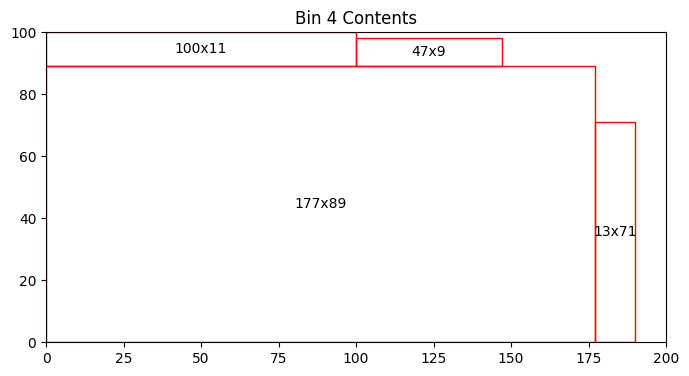

Bin 4 has 1801.00 units of area left, utilization: 91.00%


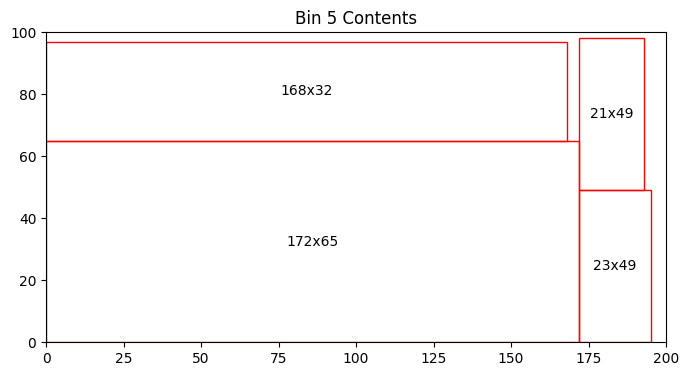

Bin 5 has 1288.00 units of area left, utilization: 93.56%


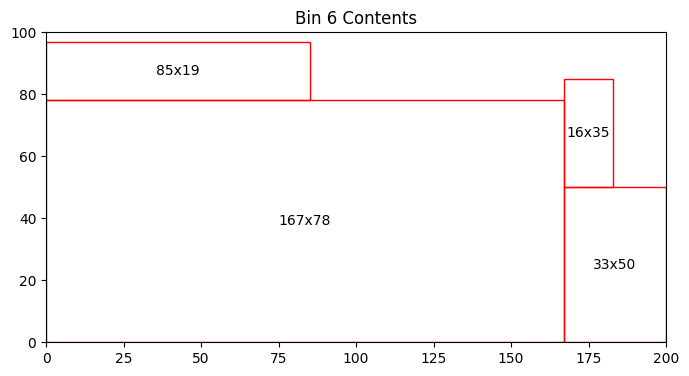

Bin 6 has 3149.00 units of area left, utilization: 84.25%


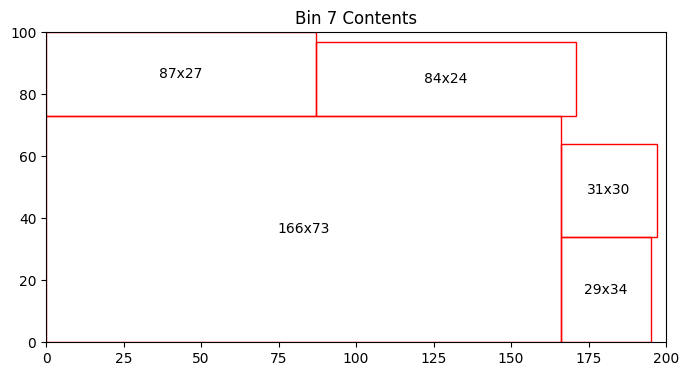

Bin 7 has 1601.00 units of area left, utilization: 92.00%


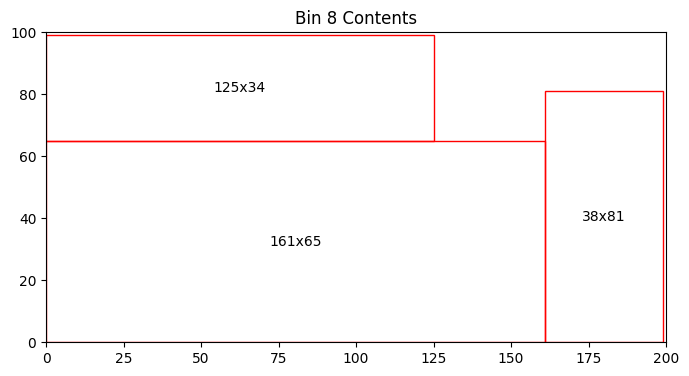

Bin 8 has 2207.00 units of area left, utilization: 88.97%


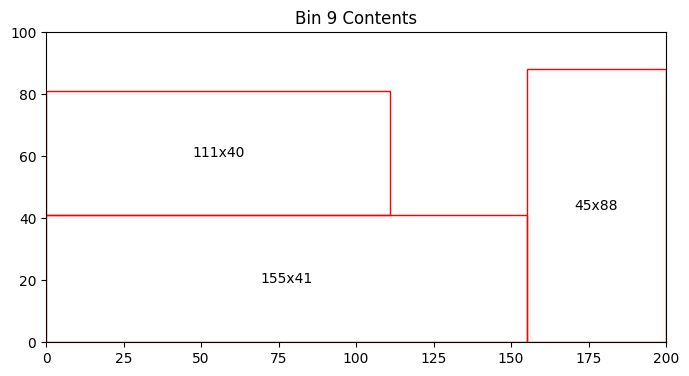

Bin 9 has 5245.00 units of area left, utilization: 73.78%


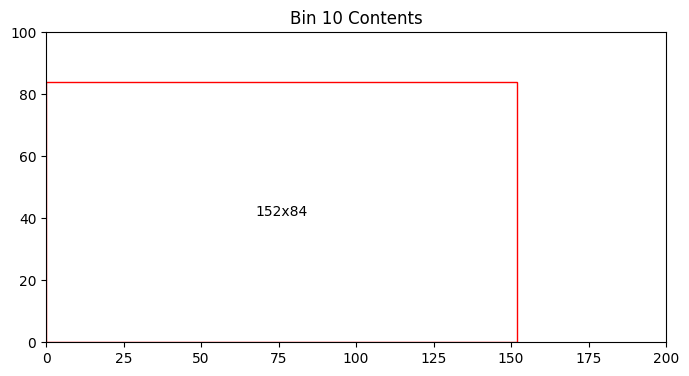

Bin 10 has 7232.00 units of area left, utilization: 63.84%


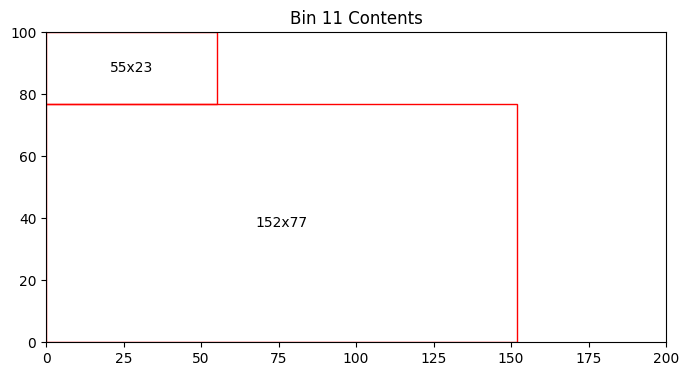

Bin 11 has 7031.00 units of area left, utilization: 64.84%


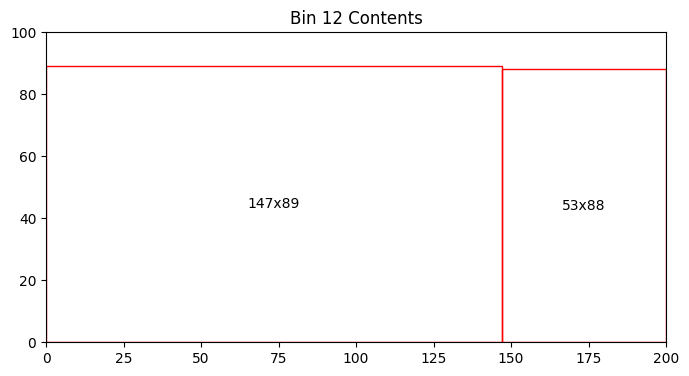

Bin 12 has 2253.00 units of area left, utilization: 88.73%


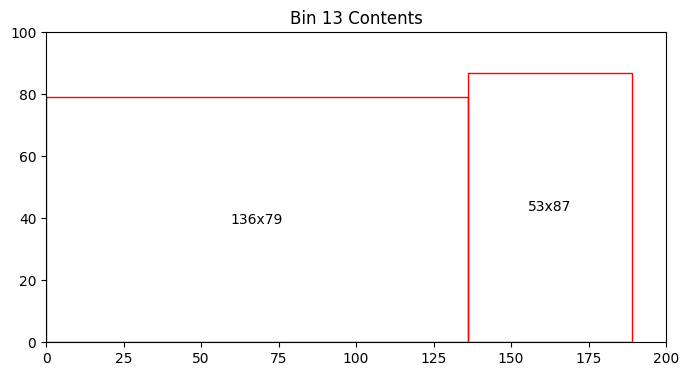

Bin 13 has 4645.00 units of area left, utilization: 76.78%


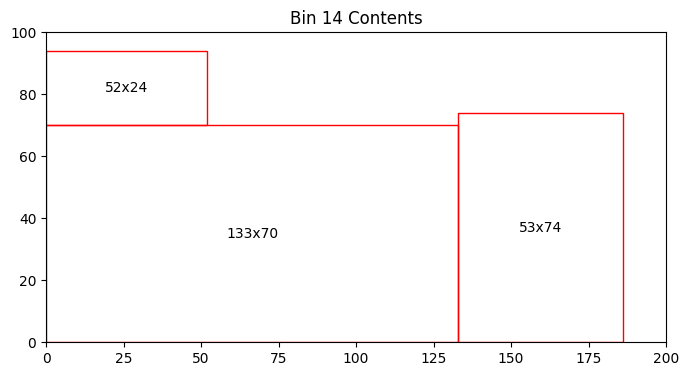

Bin 14 has 5520.00 units of area left, utilization: 72.40%


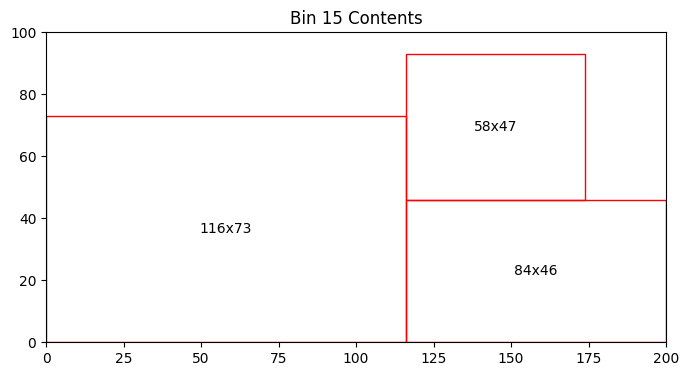

Bin 15 has 4942.00 units of area left, utilization: 75.29%


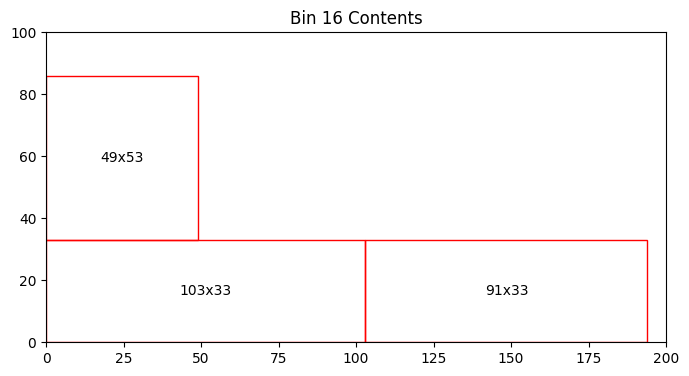

Bin 16 has 11001.00 units of area left, utilization: 45.00%


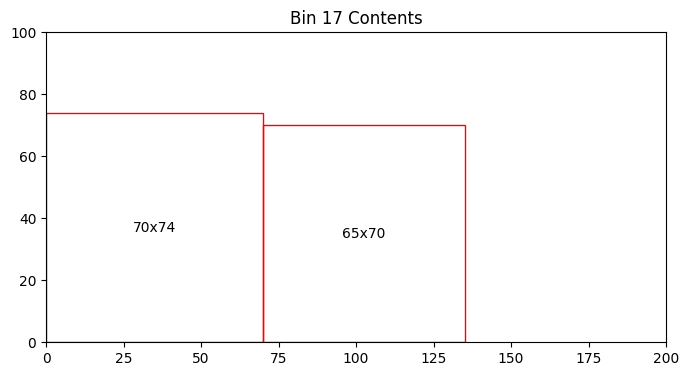

Bin 17 has 10270.00 units of area left, utilization: 48.65%
Total number of bins = 17
Total area left in bins = 71446.00
{'total_bins': 17, 'total_area_left': 71446, 'utilizations': [95.28, 98.895, 89.52, 90.995, 93.56, 84.255, 91.995, 88.965, 73.775, 63.839999999999996, 64.845, 88.735, 76.775, 72.39999999999999, 75.29, 44.995000000000005, 48.65]}


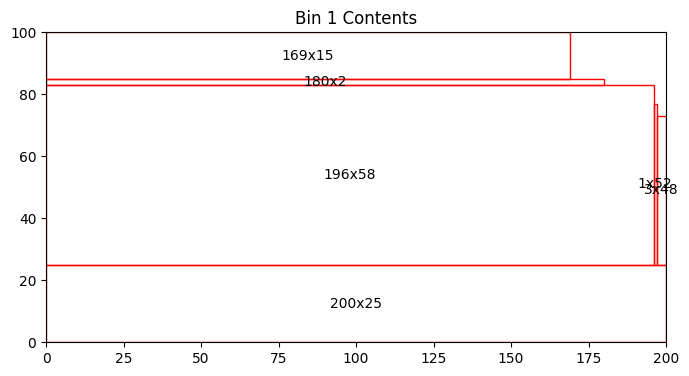

Bin 1 has 541.00 units of area left, utilization: 97.30%


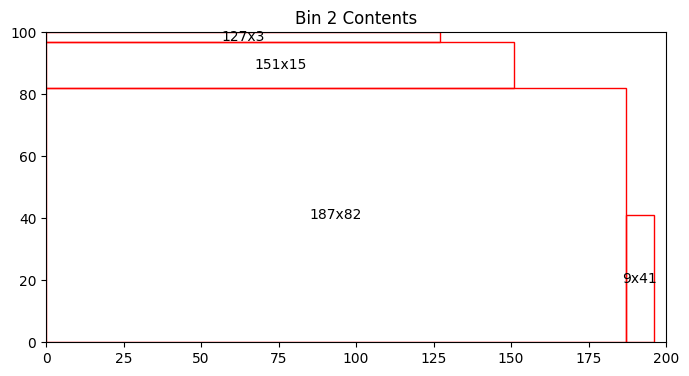

Bin 2 has 1651.00 units of area left, utilization: 91.75%


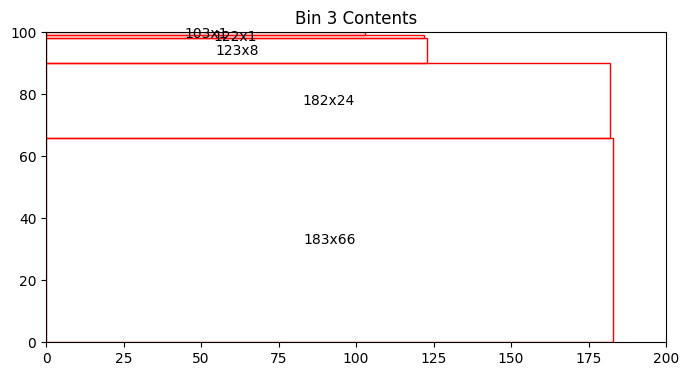

Bin 3 has 2345.00 units of area left, utilization: 88.28%


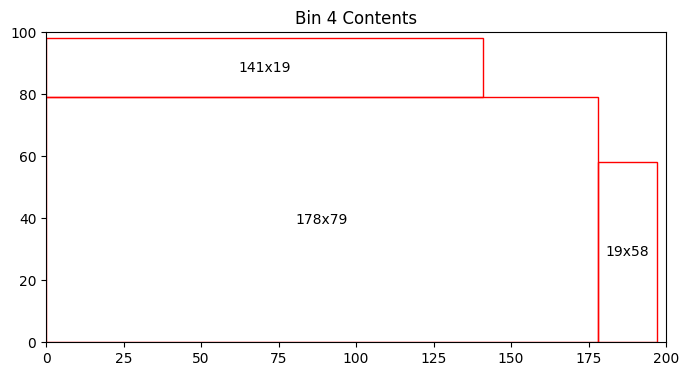

Bin 4 has 2157.00 units of area left, utilization: 89.22%


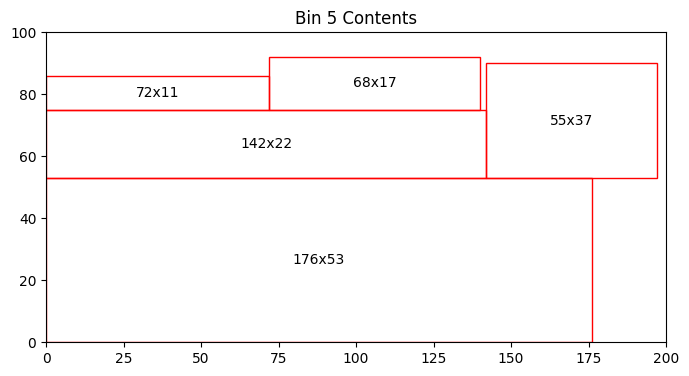

Bin 5 has 3565.00 units of area left, utilization: 82.17%


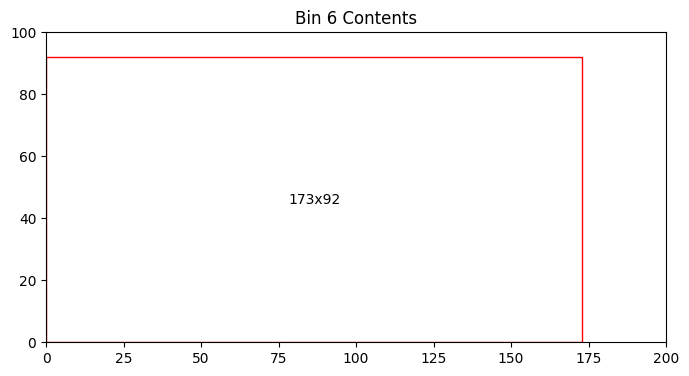

Bin 6 has 4084.00 units of area left, utilization: 79.58%


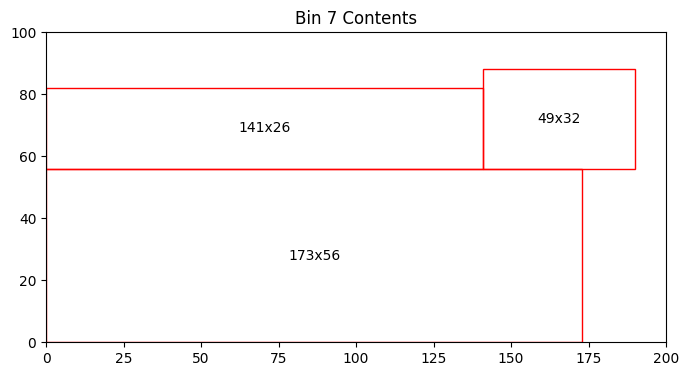

Bin 7 has 5078.00 units of area left, utilization: 74.61%


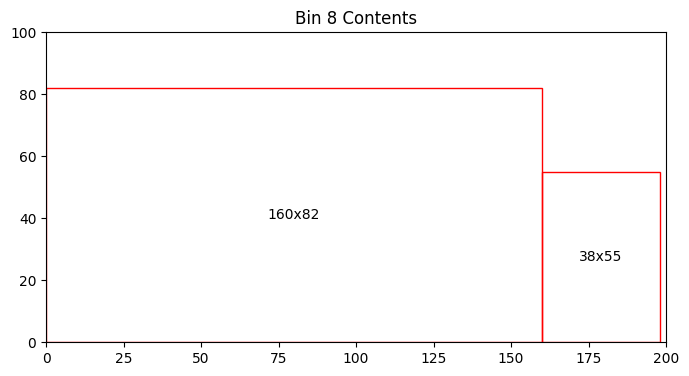

Bin 8 has 4790.00 units of area left, utilization: 76.05%


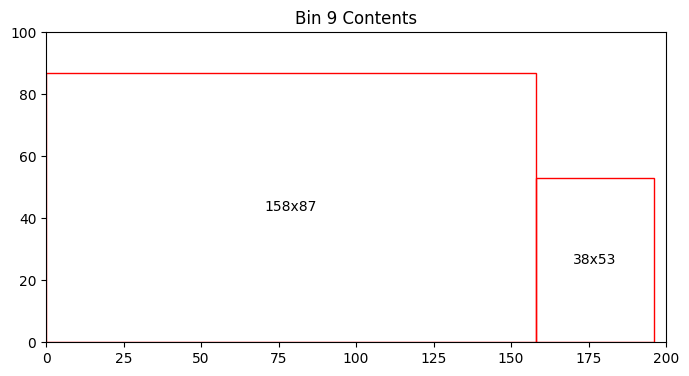

Bin 9 has 4240.00 units of area left, utilization: 78.80%


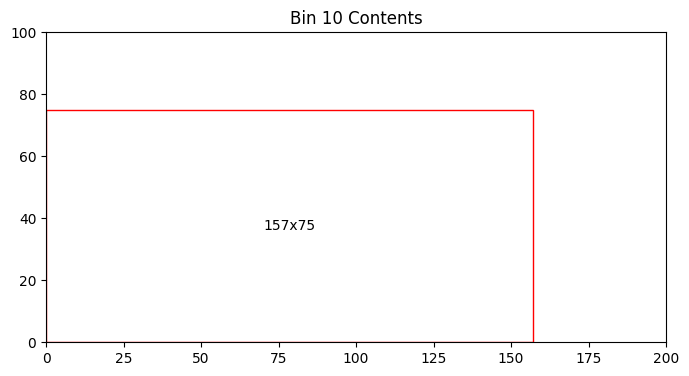

Bin 10 has 8225.00 units of area left, utilization: 58.88%


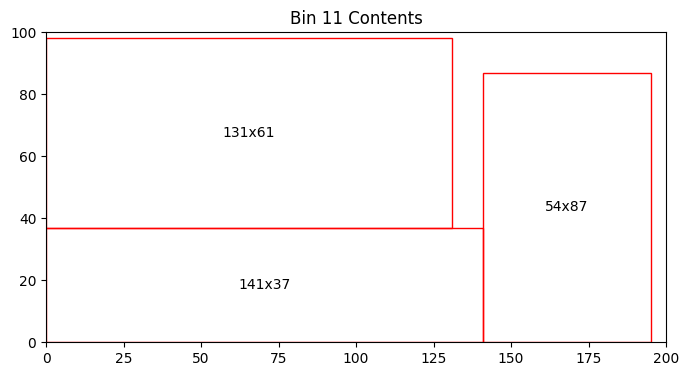

Bin 11 has 2094.00 units of area left, utilization: 89.53%


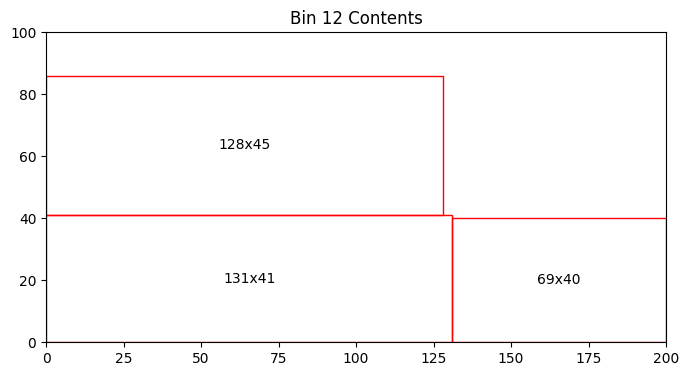

Bin 12 has 6109.00 units of area left, utilization: 69.45%


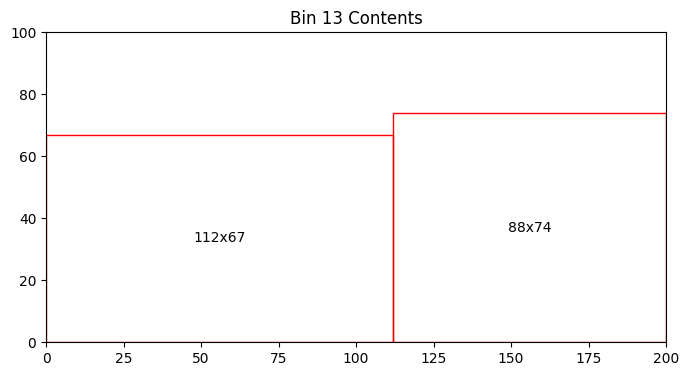

Bin 13 has 5984.00 units of area left, utilization: 70.08%


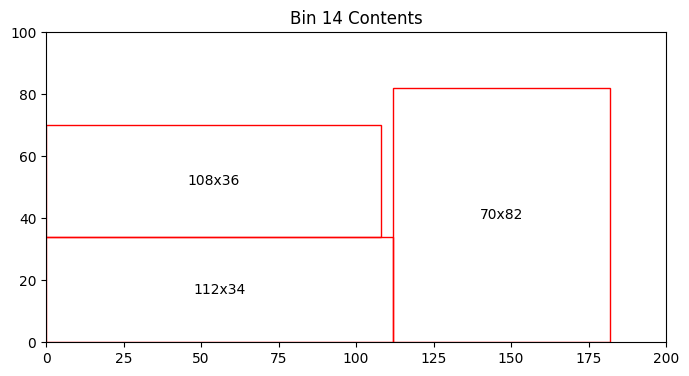

Bin 14 has 6564.00 units of area left, utilization: 67.18%


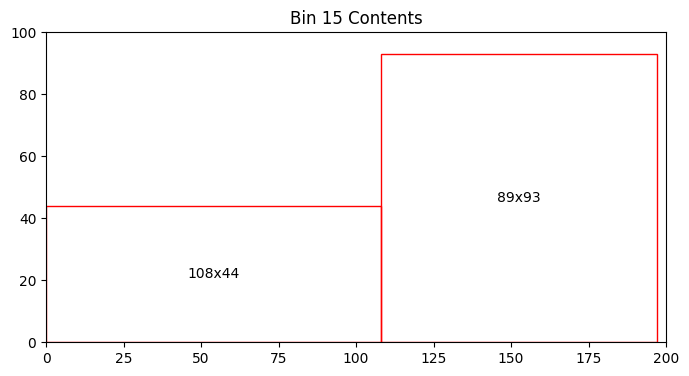

Bin 15 has 6971.00 units of area left, utilization: 65.14%


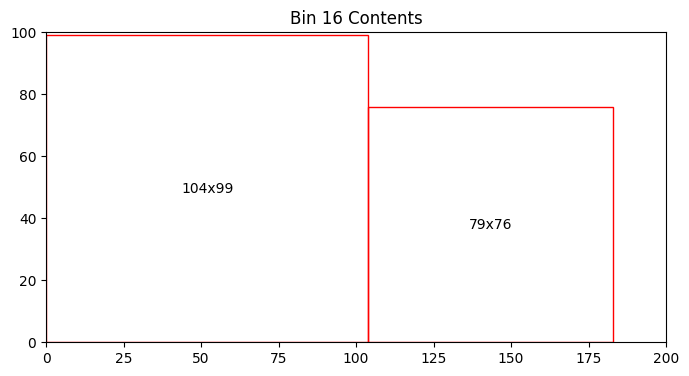

Bin 16 has 3700.00 units of area left, utilization: 81.50%


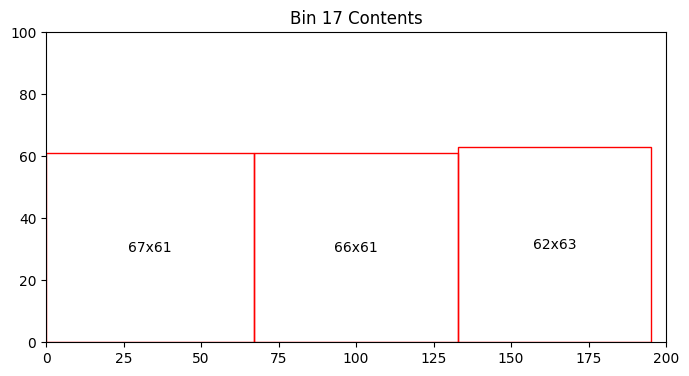

Bin 17 has 7981.00 units of area left, utilization: 60.09%
Total number of bins = 17
Total area left in bins = 76079.00
{'total_bins': 17, 'total_area_left': 76079, 'utilizations': [97.295, 91.745, 88.275, 89.215, 82.175, 79.58, 74.61, 76.05, 78.8, 58.875, 89.53, 69.455, 70.08, 67.17999999999999, 65.145, 81.5, 60.095]}


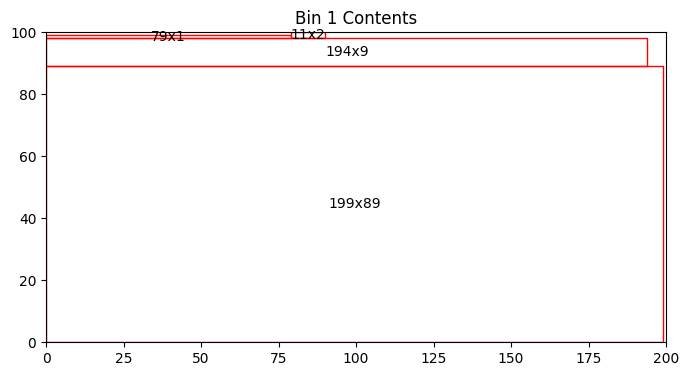

Bin 1 has 442.00 units of area left, utilization: 97.79%


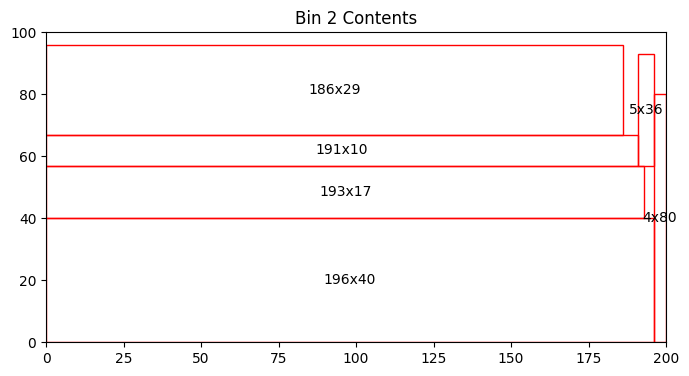

Bin 2 has 1075.00 units of area left, utilization: 94.62%


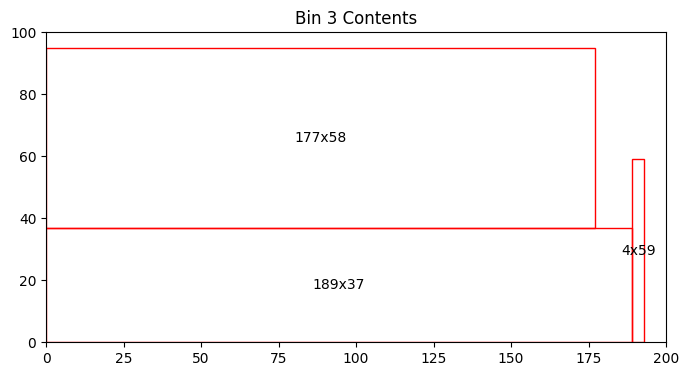

Bin 3 has 2505.00 units of area left, utilization: 87.48%


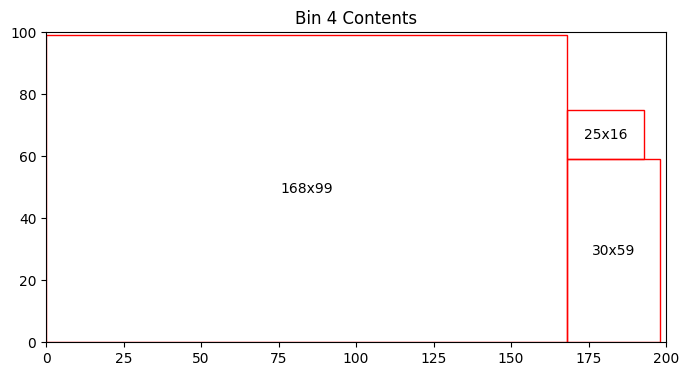

Bin 4 has 1198.00 units of area left, utilization: 94.01%


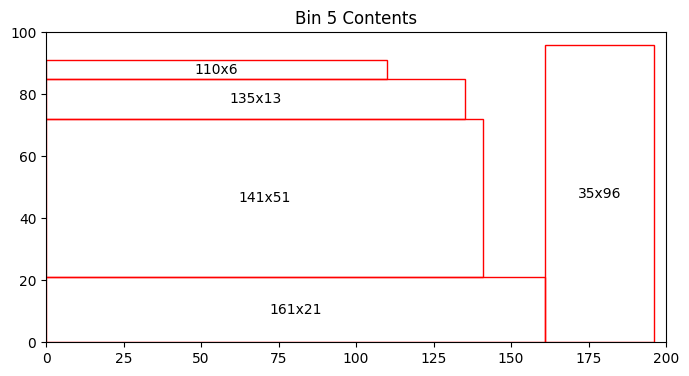

Bin 5 has 3653.00 units of area left, utilization: 81.73%


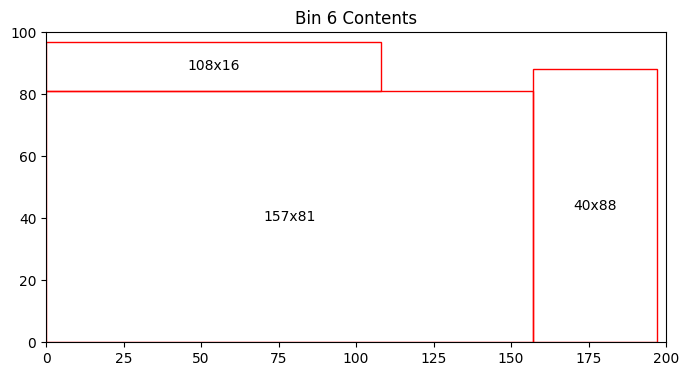

Bin 6 has 2035.00 units of area left, utilization: 89.83%


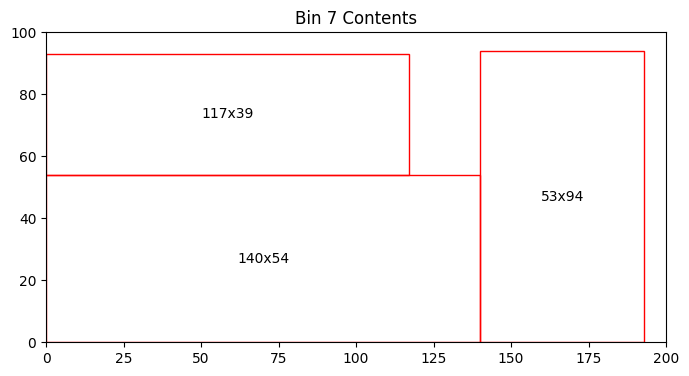

Bin 7 has 2895.00 units of area left, utilization: 85.52%


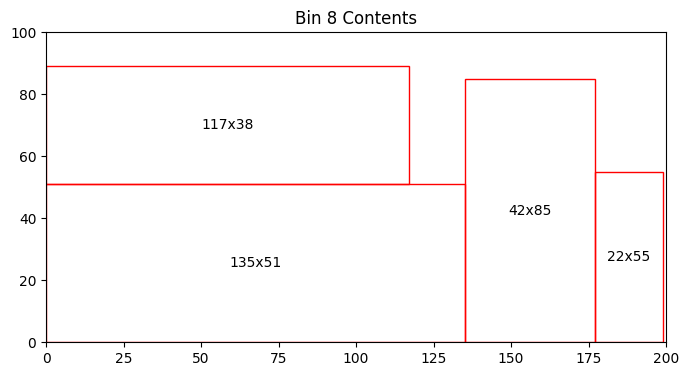

Bin 8 has 3889.00 units of area left, utilization: 80.55%


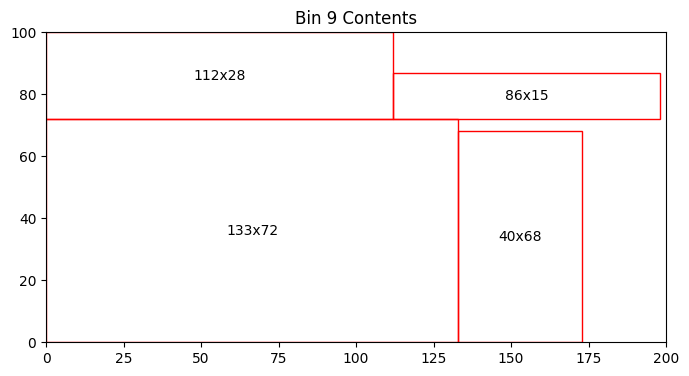

Bin 9 has 3278.00 units of area left, utilization: 83.61%


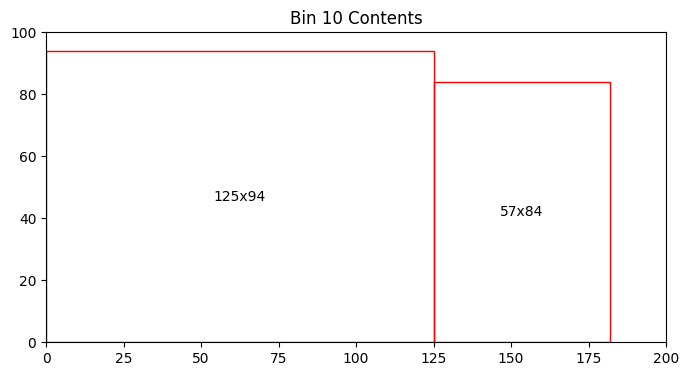

Bin 10 has 3462.00 units of area left, utilization: 82.69%


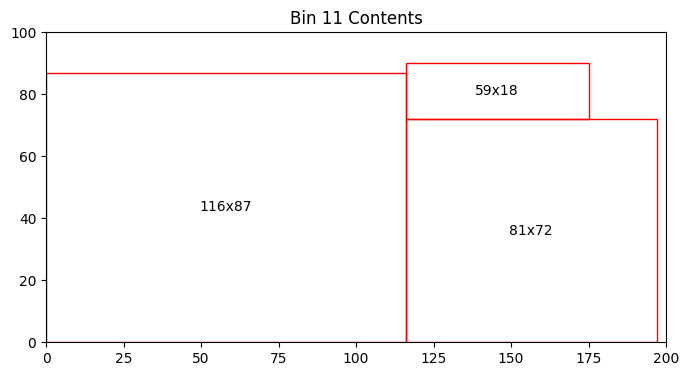

Bin 11 has 3014.00 units of area left, utilization: 84.93%


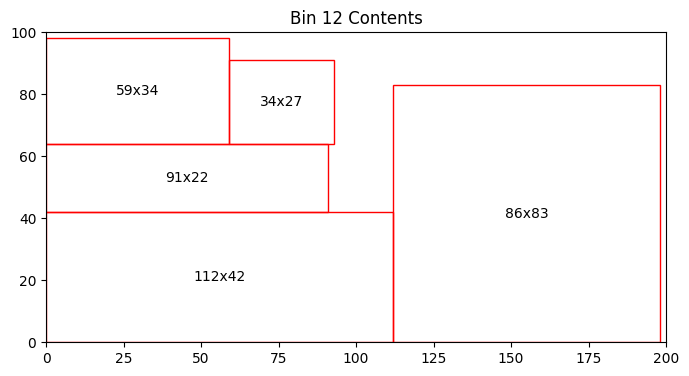

Bin 12 has 3232.00 units of area left, utilization: 83.84%


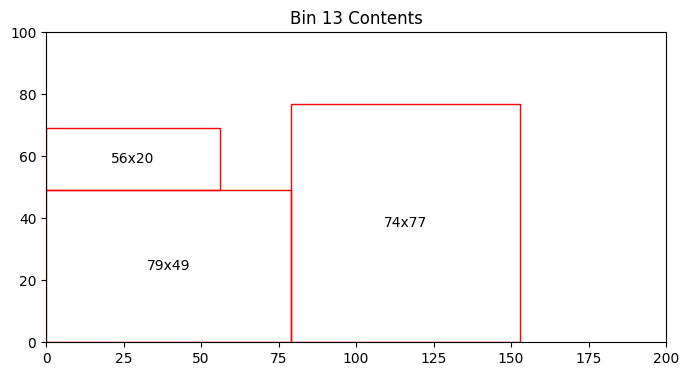

Bin 13 has 9311.00 units of area left, utilization: 53.45%


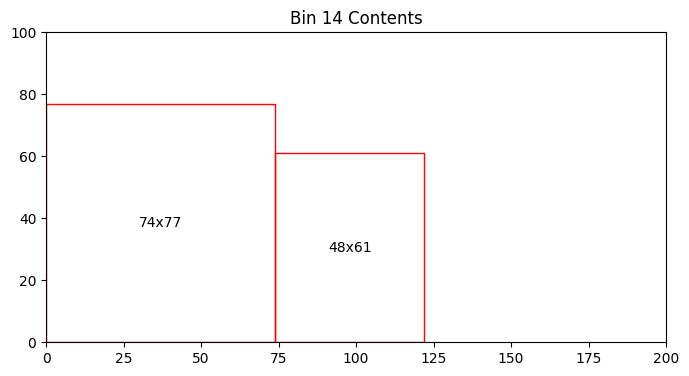

Bin 14 has 11374.00 units of area left, utilization: 43.13%
Total number of bins = 14
Total area left in bins = 51363.00
{'total_bins': 14, 'total_area_left': 51363, 'utilizations': [97.78999999999999, 94.625, 87.47500000000001, 94.01, 81.735, 89.825, 85.52499999999999, 80.55499999999999, 83.61, 82.69, 84.93, 83.84, 53.445, 43.13]}


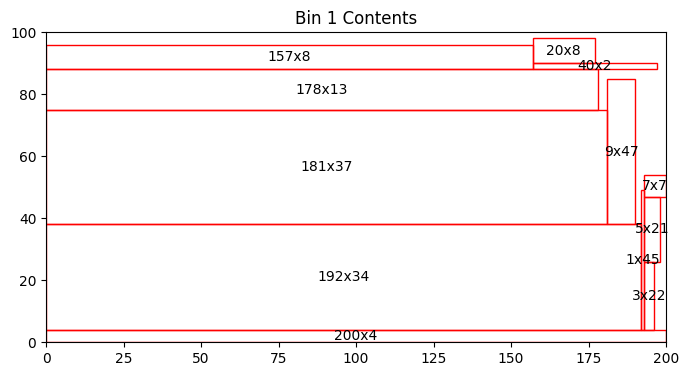

Bin 1 has 1477.00 units of area left, utilization: 92.62%


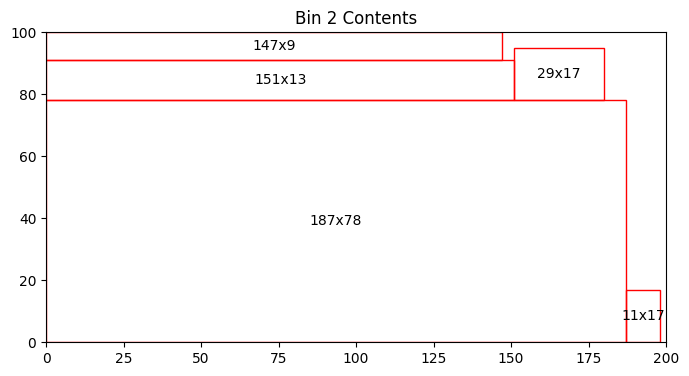

Bin 2 has 1448.00 units of area left, utilization: 92.76%


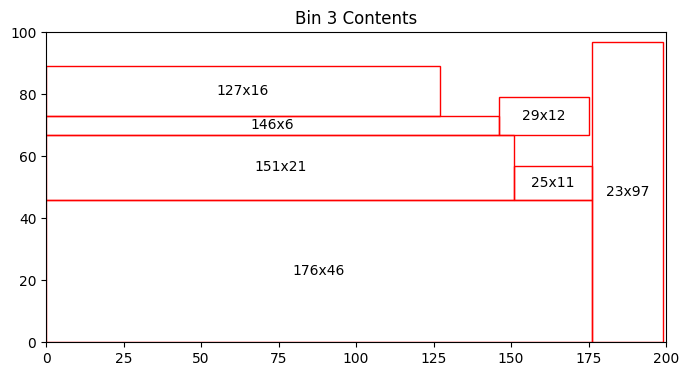

Bin 3 has 2971.00 units of area left, utilization: 85.15%


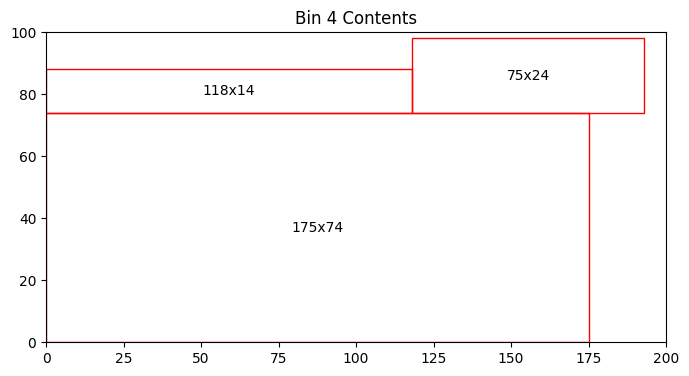

Bin 4 has 3598.00 units of area left, utilization: 82.01%


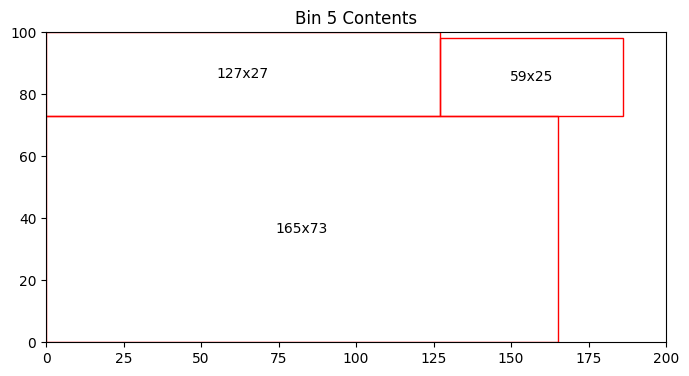

Bin 5 has 3051.00 units of area left, utilization: 84.75%


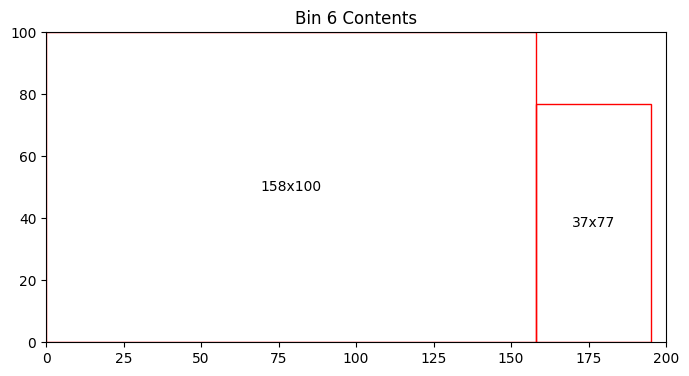

Bin 6 has 1351.00 units of area left, utilization: 93.25%


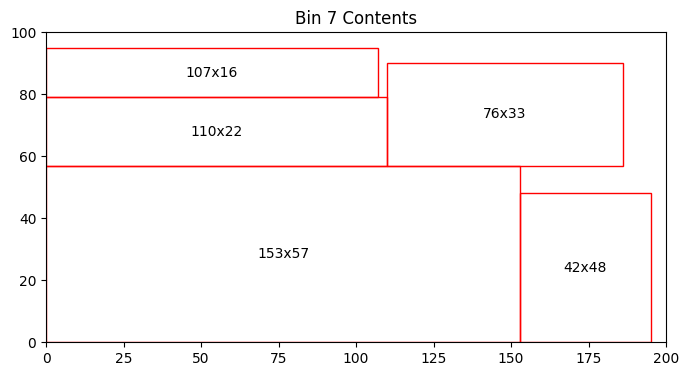

Bin 7 has 2623.00 units of area left, utilization: 86.89%


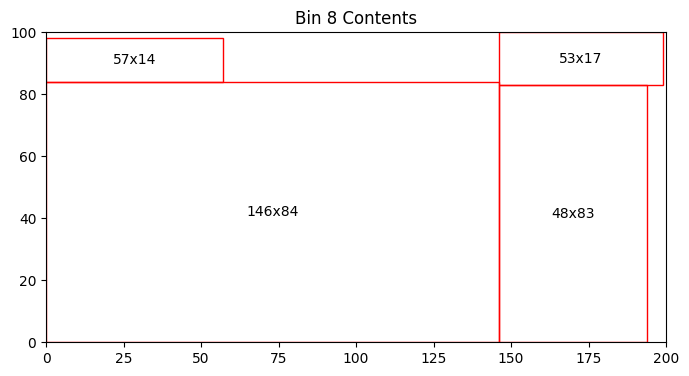

Bin 8 has 2053.00 units of area left, utilization: 89.73%


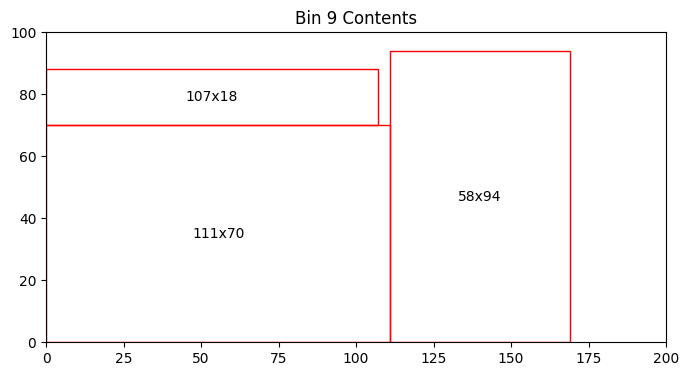

Bin 9 has 4852.00 units of area left, utilization: 75.74%


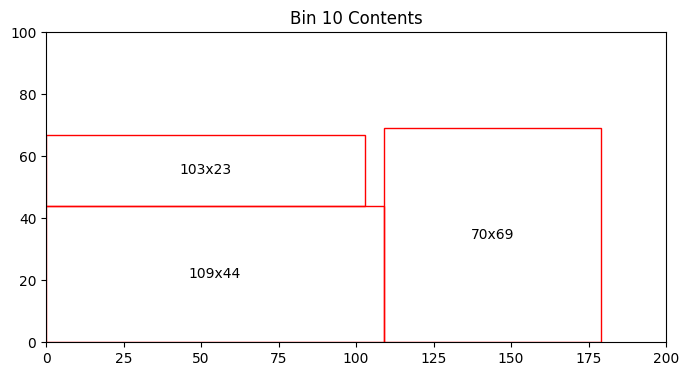

Bin 10 has 8005.00 units of area left, utilization: 59.98%


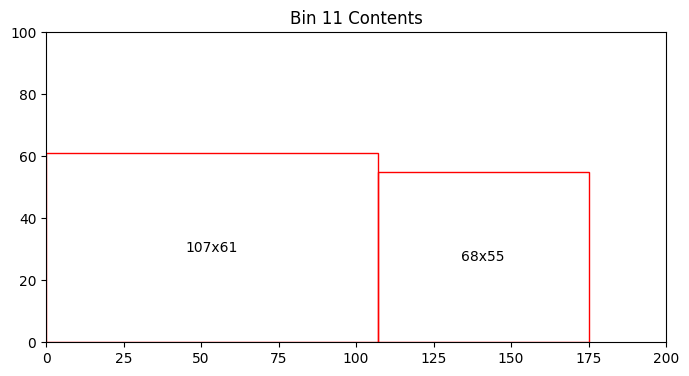

Bin 11 has 9733.00 units of area left, utilization: 51.33%


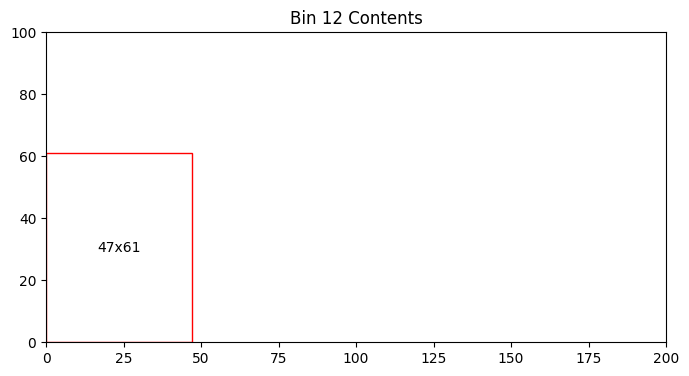

Bin 12 has 17133.00 units of area left, utilization: 14.34%
Total number of bins = 12
Total area left in bins = 58295.00
{'total_bins': 12, 'total_area_left': 58295, 'utilizations': [92.61500000000001, 92.75999999999999, 85.14500000000001, 82.01, 84.745, 93.245, 86.885, 89.735, 75.74, 59.975, 51.334999999999994, 14.335]}


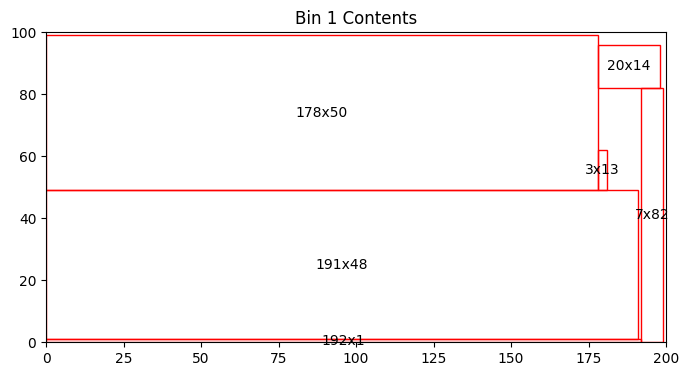

Bin 1 has 847.00 units of area left, utilization: 95.77%


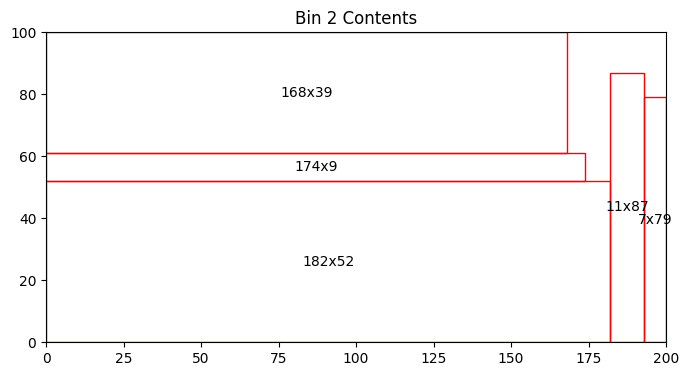

Bin 2 has 908.00 units of area left, utilization: 95.46%


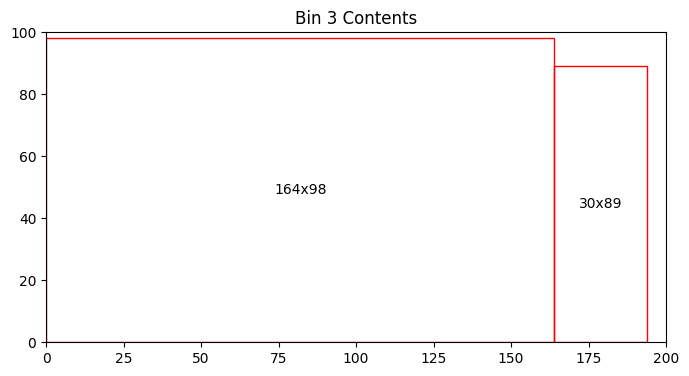

Bin 3 has 1258.00 units of area left, utilization: 93.71%


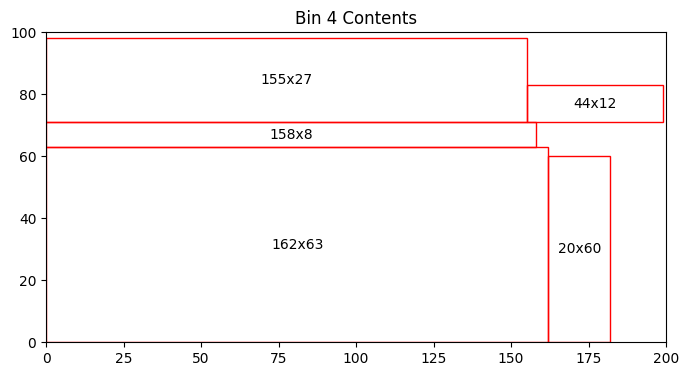

Bin 4 has 2617.00 units of area left, utilization: 86.91%


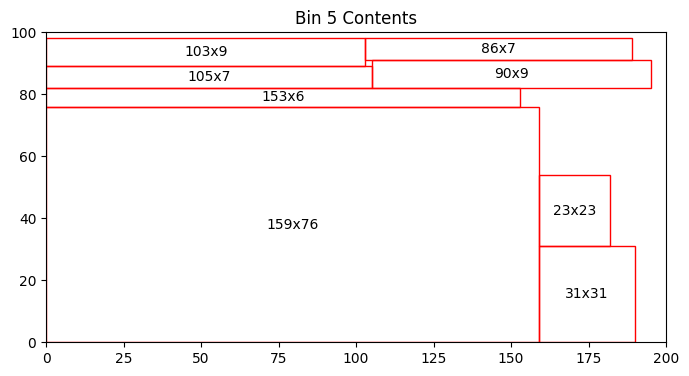

Bin 5 has 2434.00 units of area left, utilization: 87.83%


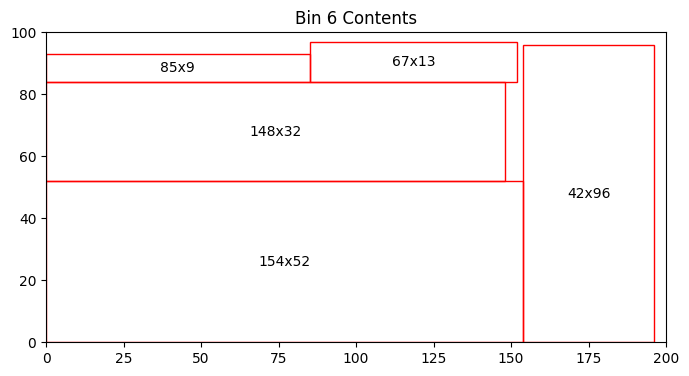

Bin 6 has 1588.00 units of area left, utilization: 92.06%


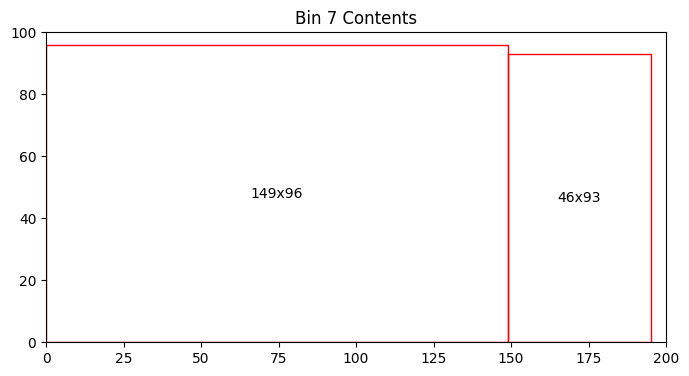

Bin 7 has 1418.00 units of area left, utilization: 92.91%


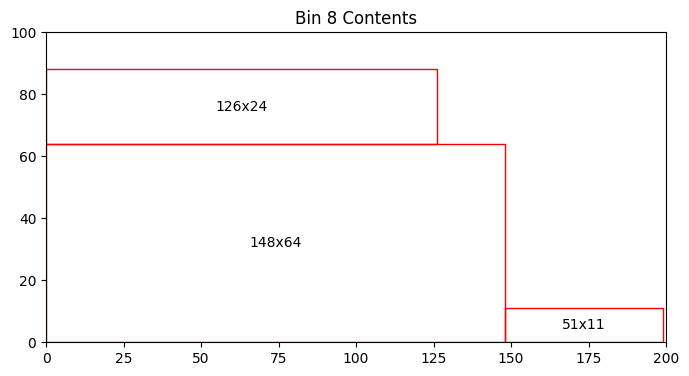

Bin 8 has 6943.00 units of area left, utilization: 65.29%


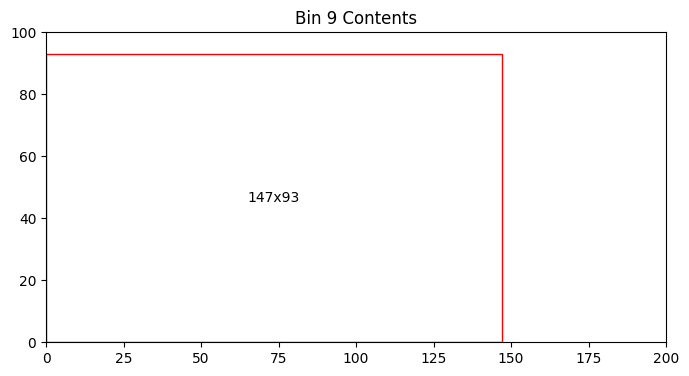

Bin 9 has 6329.00 units of area left, utilization: 68.36%


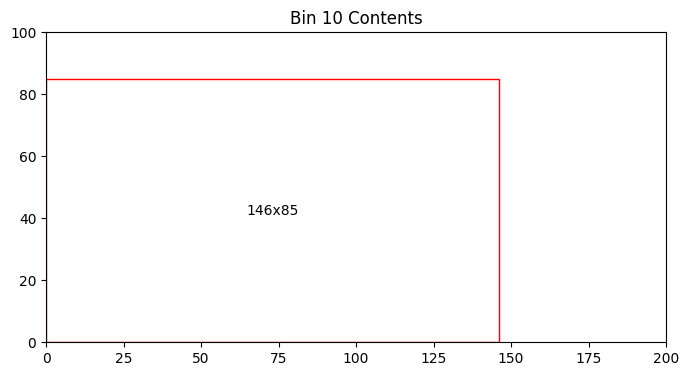

Bin 10 has 7590.00 units of area left, utilization: 62.05%


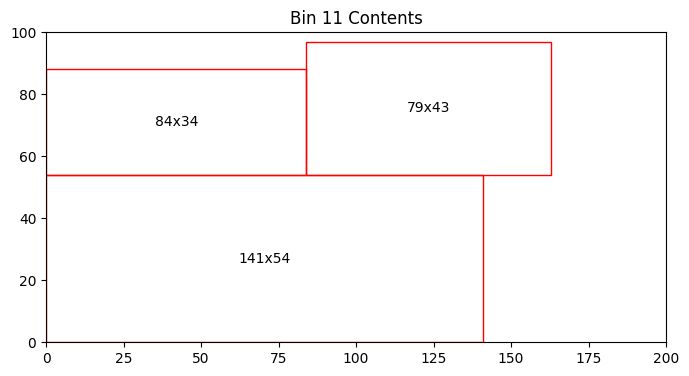

Bin 11 has 6133.00 units of area left, utilization: 69.34%


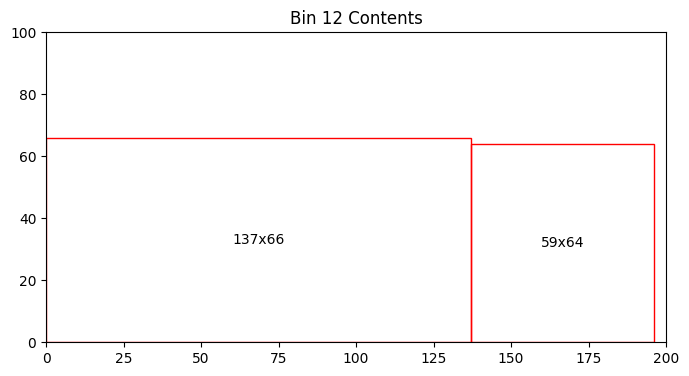

Bin 12 has 7182.00 units of area left, utilization: 64.09%


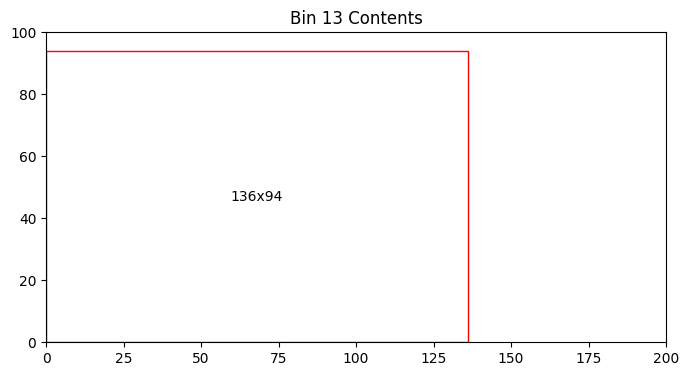

Bin 13 has 7216.00 units of area left, utilization: 63.92%


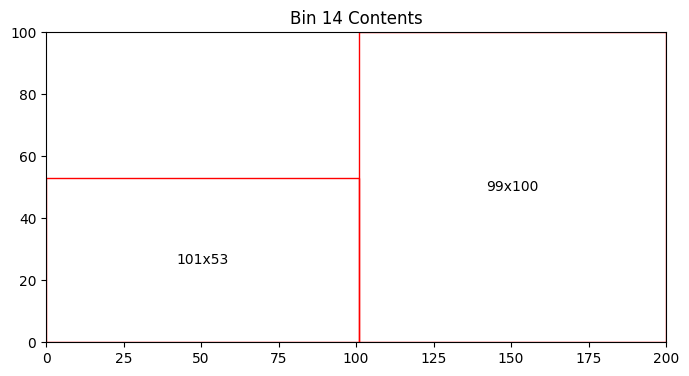

Bin 14 has 4747.00 units of area left, utilization: 76.27%


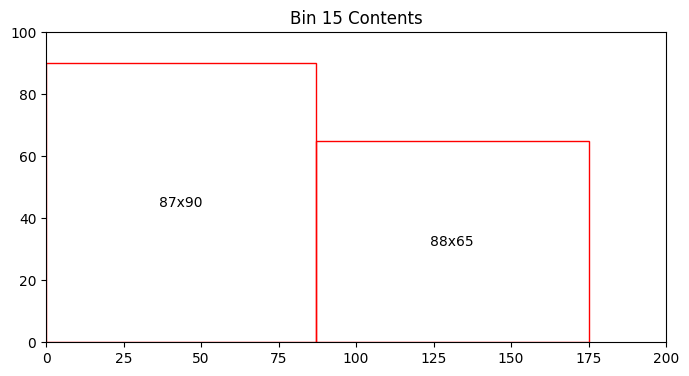

Bin 15 has 6450.00 units of area left, utilization: 67.75%


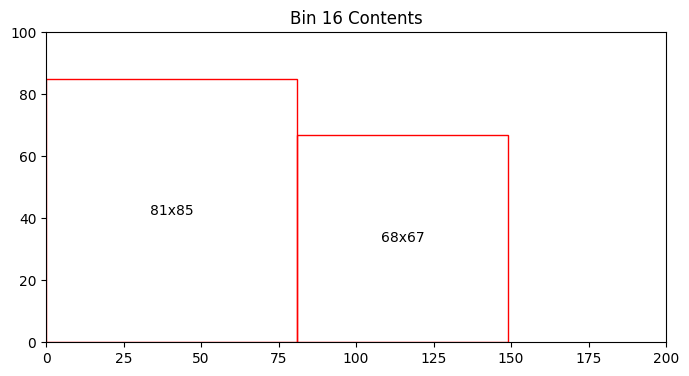

Bin 16 has 8559.00 units of area left, utilization: 57.20%
Total number of bins = 16
Total area left in bins = 72219.00
{'total_bins': 16, 'total_area_left': 72219, 'utilizations': [95.765, 95.46, 93.71000000000001, 86.91499999999999, 87.83, 92.06, 92.91, 65.28500000000001, 68.355, 62.050000000000004, 69.33500000000001, 64.09, 63.92, 76.265, 67.75, 57.205]}


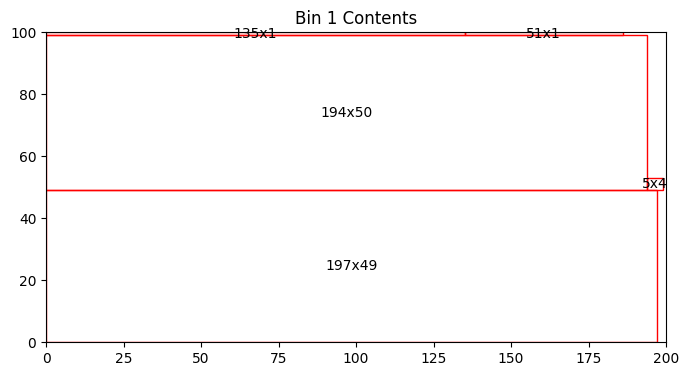

Bin 1 has 441.00 units of area left, utilization: 97.80%


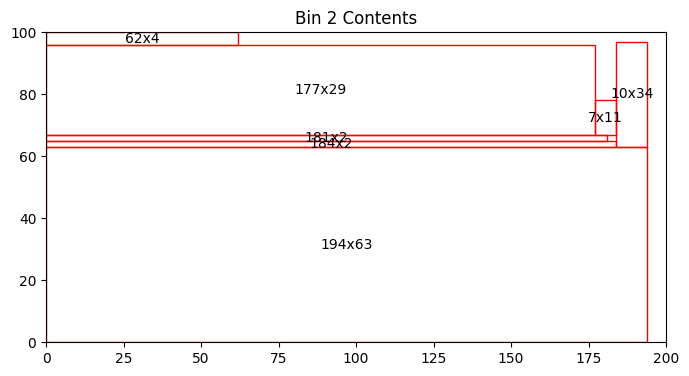

Bin 2 has 1250.00 units of area left, utilization: 93.75%


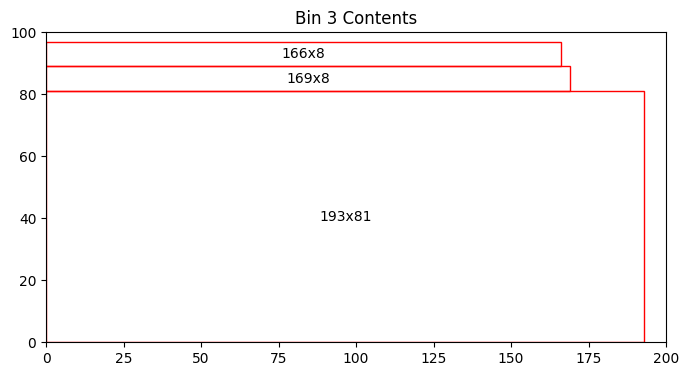

Bin 3 has 1687.00 units of area left, utilization: 91.56%


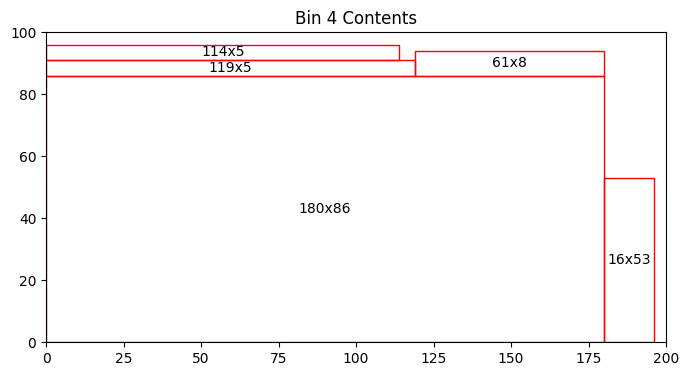

Bin 4 has 2019.00 units of area left, utilization: 89.91%


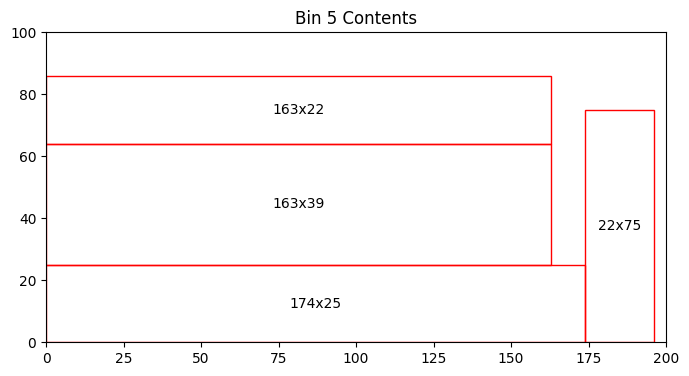

Bin 5 has 4057.00 units of area left, utilization: 79.72%


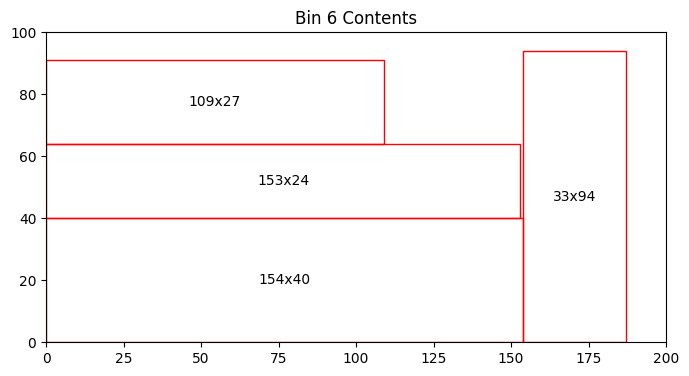

Bin 6 has 4123.00 units of area left, utilization: 79.38%


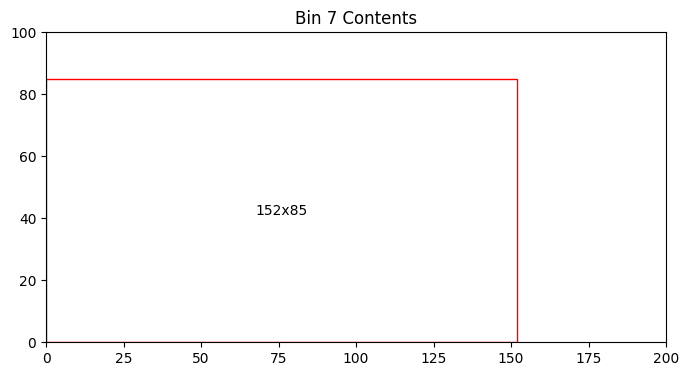

Bin 7 has 7080.00 units of area left, utilization: 64.60%


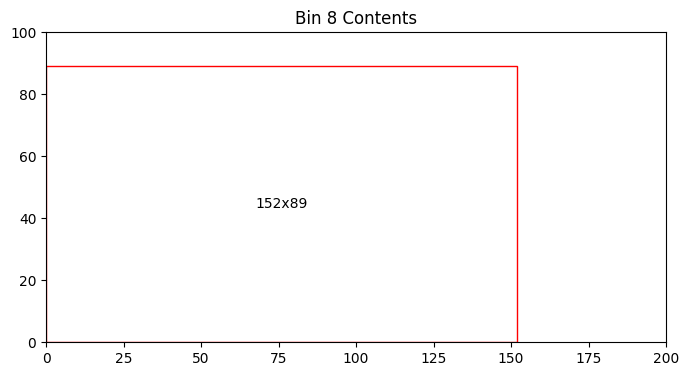

Bin 8 has 6472.00 units of area left, utilization: 67.64%


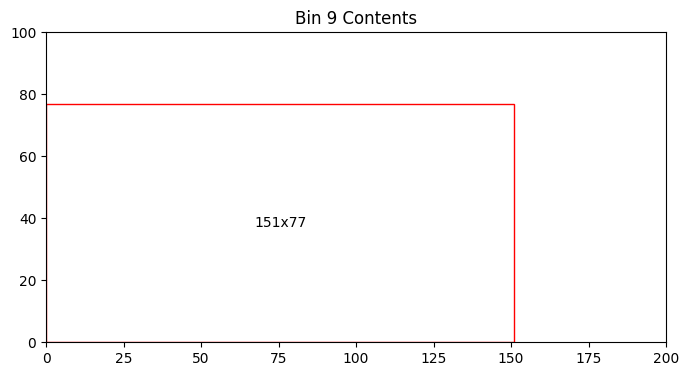

Bin 9 has 8373.00 units of area left, utilization: 58.14%


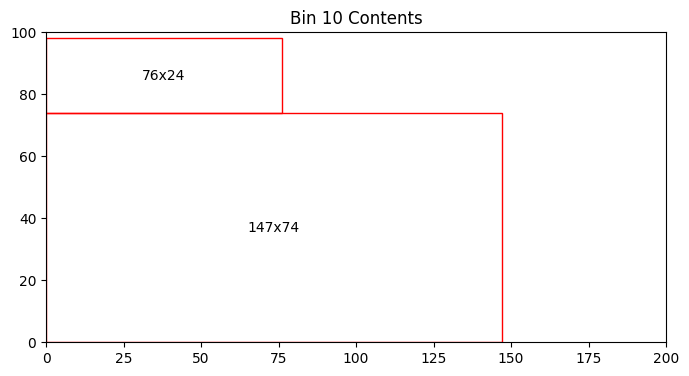

Bin 10 has 7298.00 units of area left, utilization: 63.51%


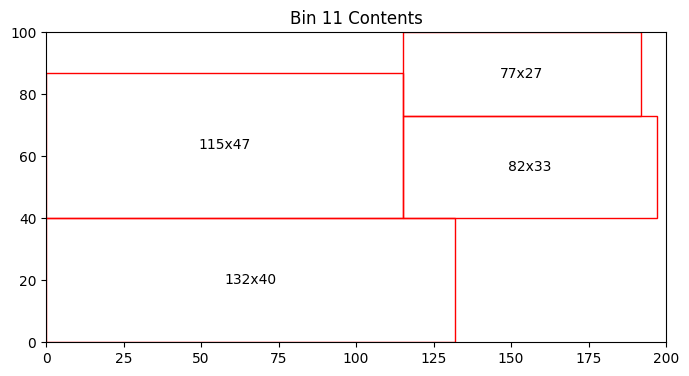

Bin 11 has 4530.00 units of area left, utilization: 77.35%


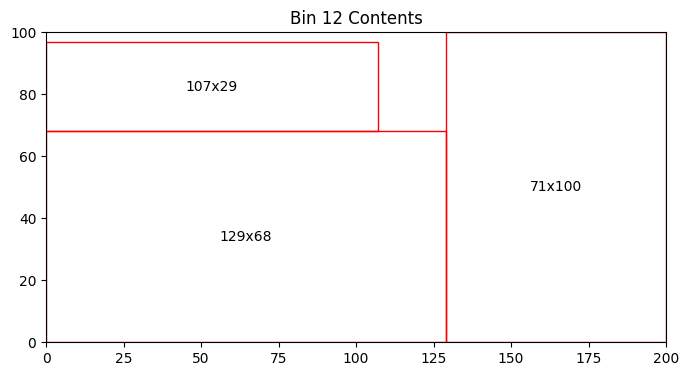

Bin 12 has 1025.00 units of area left, utilization: 94.88%


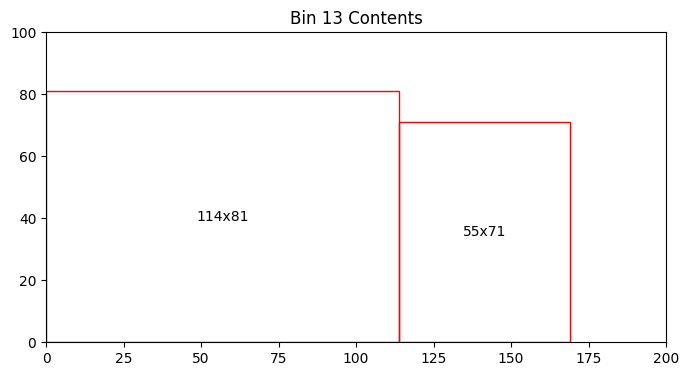

Bin 13 has 6861.00 units of area left, utilization: 65.70%


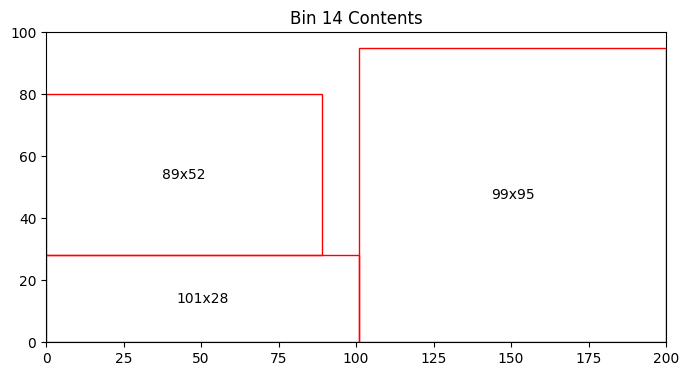

Bin 14 has 3139.00 units of area left, utilization: 84.30%


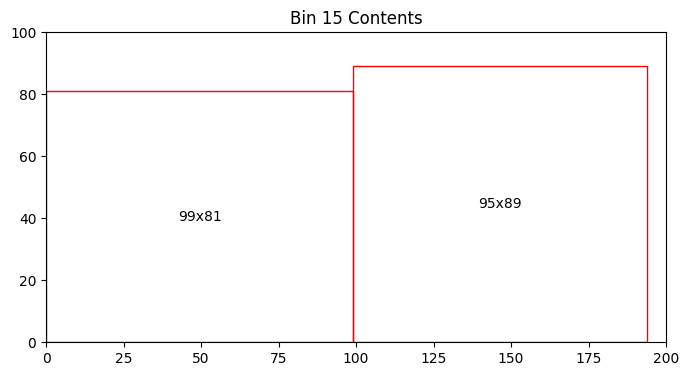

Bin 15 has 3526.00 units of area left, utilization: 82.37%


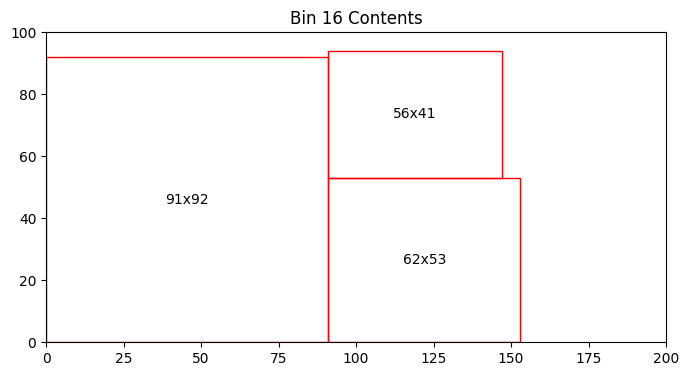

Bin 16 has 6046.00 units of area left, utilization: 69.77%
Total number of bins = 16
Total area left in bins = 67927.00
{'total_bins': 16, 'total_area_left': 67927, 'utilizations': [97.795, 93.75, 91.565, 89.905, 79.715, 79.38499999999999, 64.60000000000001, 67.64, 58.135000000000005, 63.51, 77.35, 94.875, 65.69500000000001, 84.30499999999999, 82.37, 69.77]}


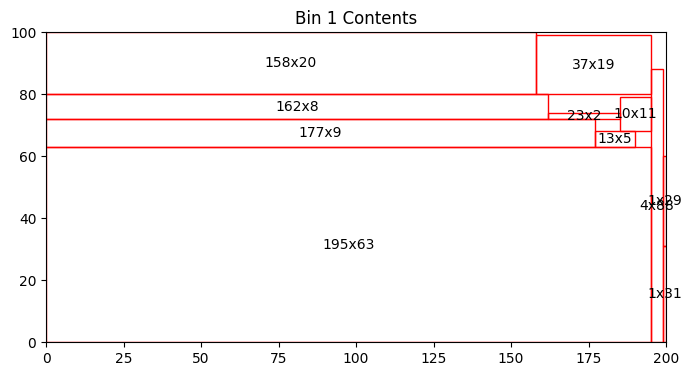

Bin 1 has 330.00 units of area left, utilization: 98.35%


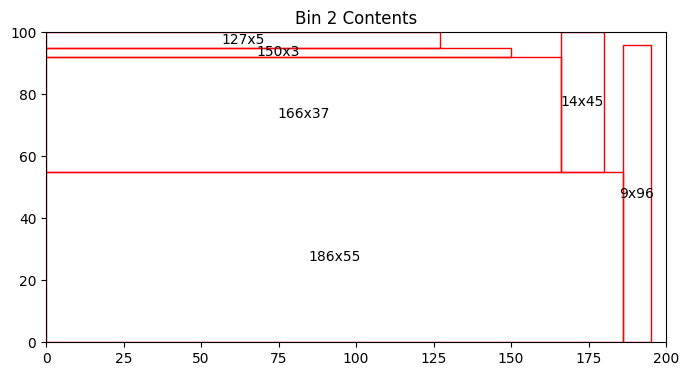

Bin 2 has 1049.00 units of area left, utilization: 94.75%


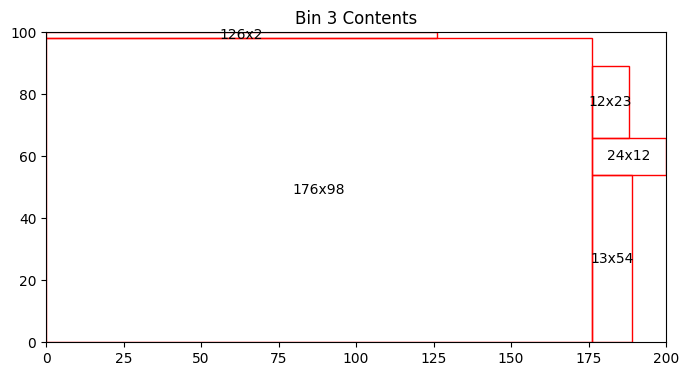

Bin 3 has 1234.00 units of area left, utilization: 93.83%


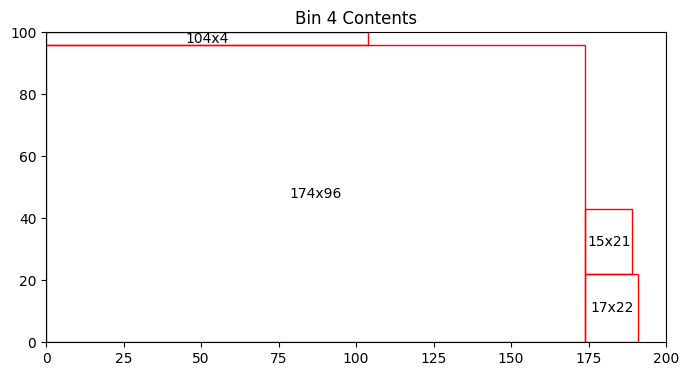

Bin 4 has 2191.00 units of area left, utilization: 89.05%


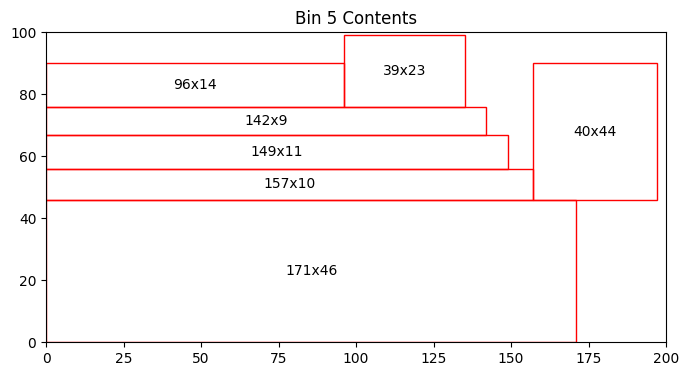

Bin 5 has 3646.00 units of area left, utilization: 81.77%


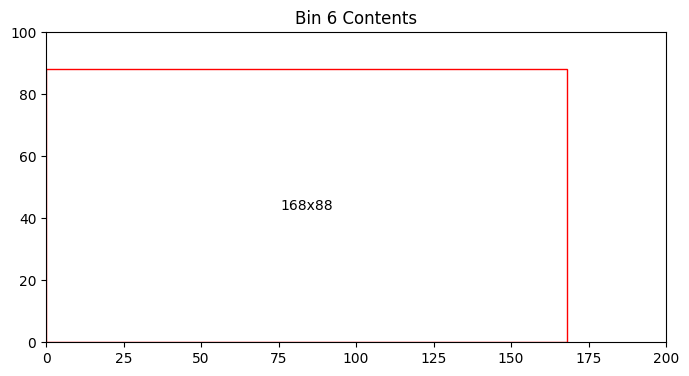

Bin 6 has 5216.00 units of area left, utilization: 73.92%


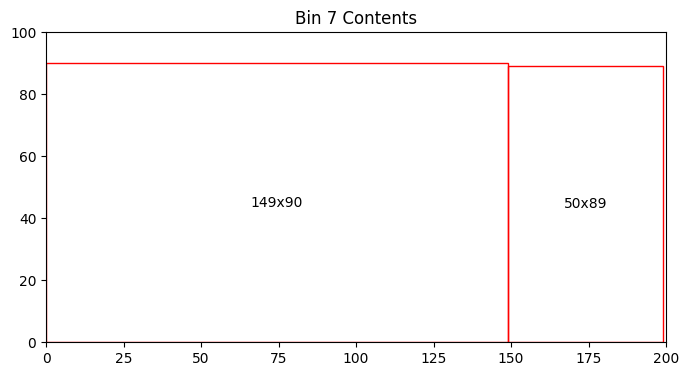

Bin 7 has 2140.00 units of area left, utilization: 89.30%


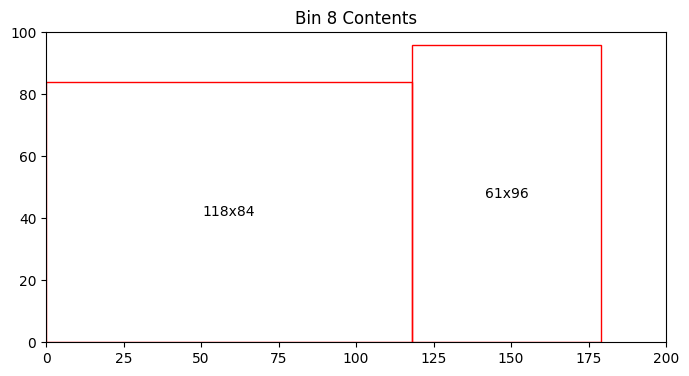

Bin 8 has 4232.00 units of area left, utilization: 78.84%


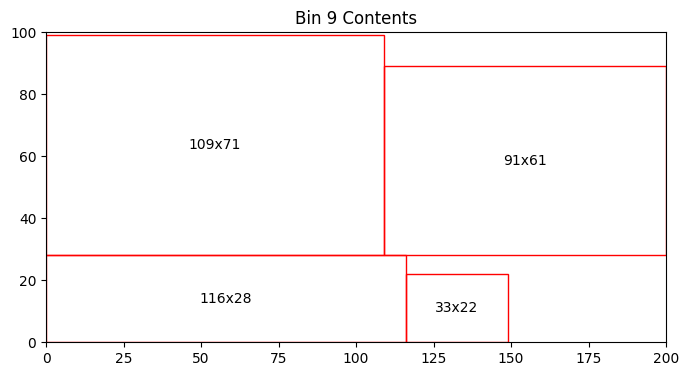

Bin 9 has 2736.00 units of area left, utilization: 86.32%


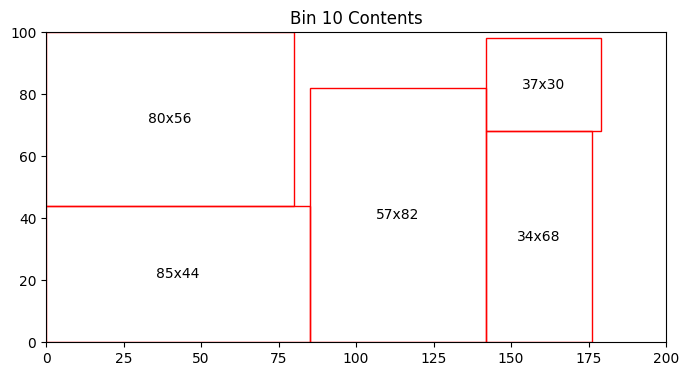

Bin 10 has 3684.00 units of area left, utilization: 81.58%


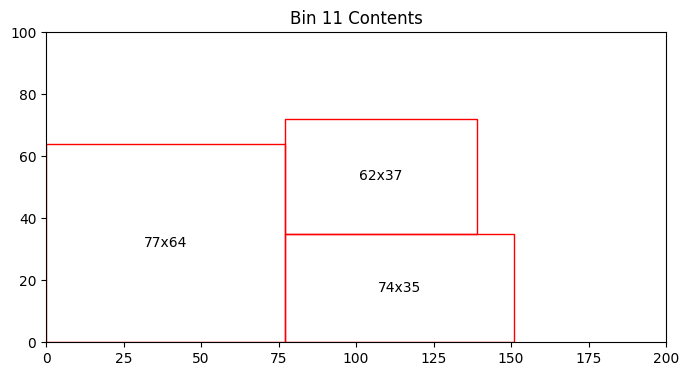

Bin 11 has 10188.00 units of area left, utilization: 49.06%
Total number of bins = 11
Total area left in bins = 36646.00
{'total_bins': 11, 'total_area_left': 36646, 'utilizations': [98.35000000000001, 94.755, 93.83, 89.045, 81.77, 73.92, 89.3, 78.84, 86.32, 81.58, 49.059999999999995]}


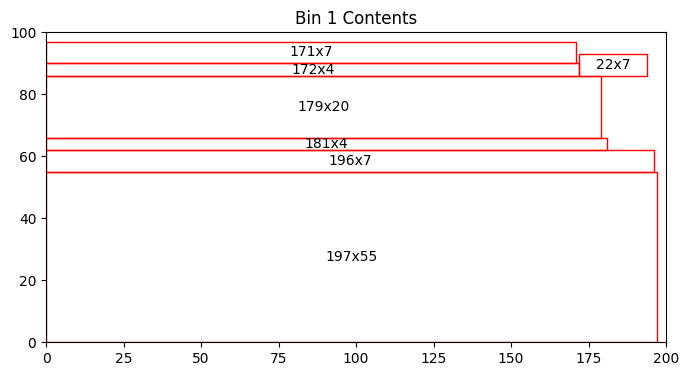

Bin 1 has 1450.00 units of area left, utilization: 92.75%


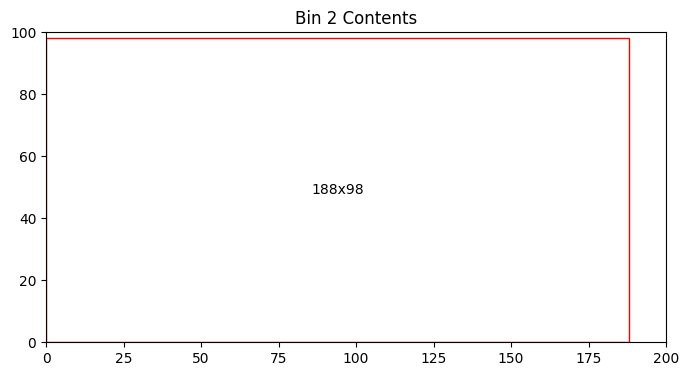

Bin 2 has 1576.00 units of area left, utilization: 92.12%


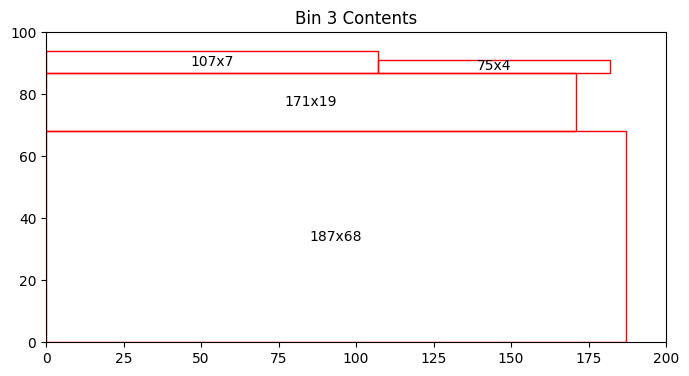

Bin 3 has 2986.00 units of area left, utilization: 85.07%


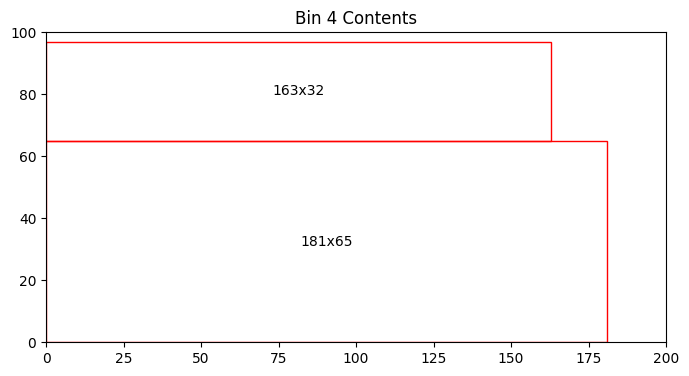

Bin 4 has 3019.00 units of area left, utilization: 84.91%


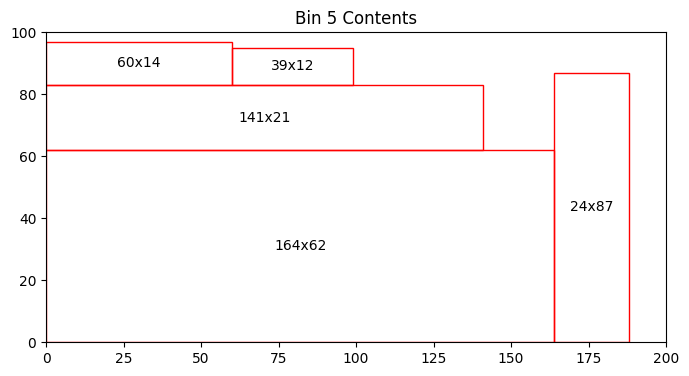

Bin 5 has 3475.00 units of area left, utilization: 82.62%


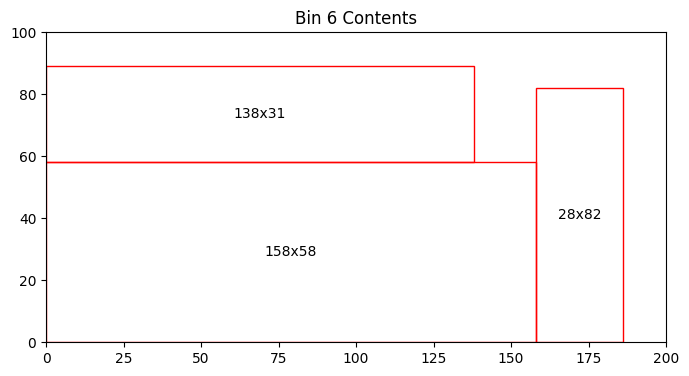

Bin 6 has 4262.00 units of area left, utilization: 78.69%


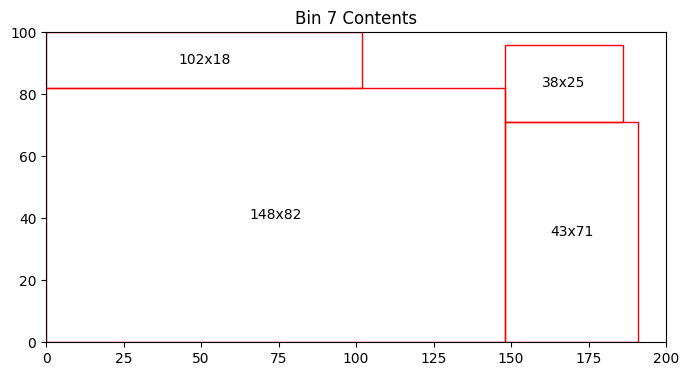

Bin 7 has 2025.00 units of area left, utilization: 89.88%


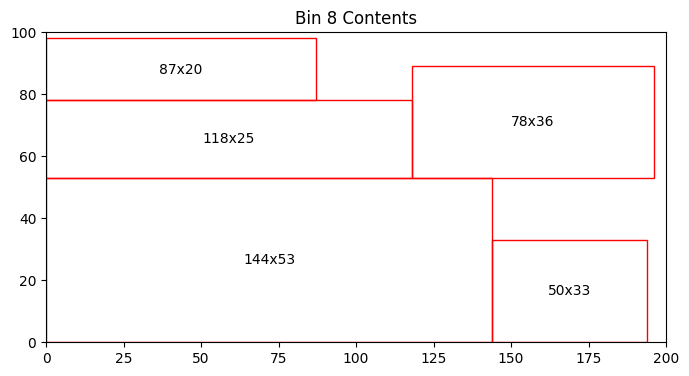

Bin 8 has 3220.00 units of area left, utilization: 83.90%


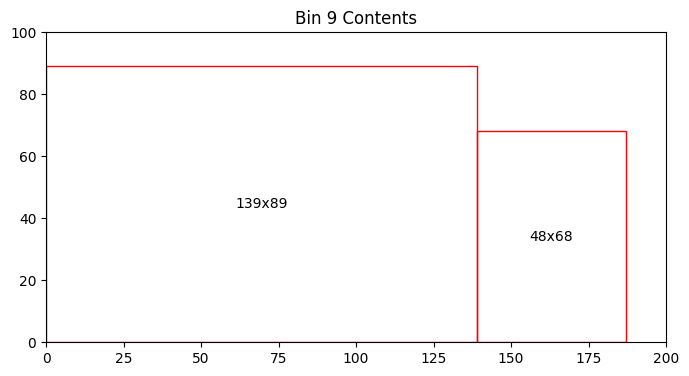

Bin 9 has 4365.00 units of area left, utilization: 78.17%


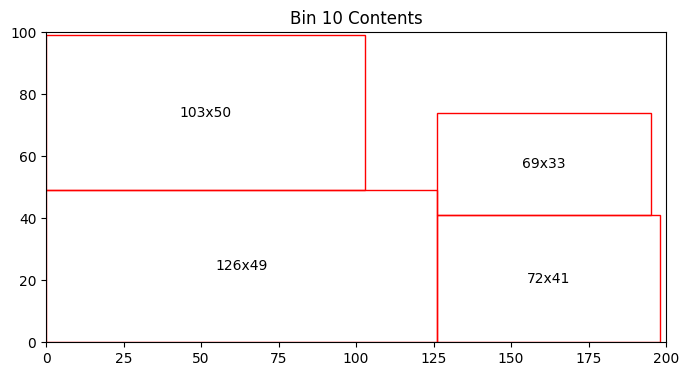

Bin 10 has 3447.00 units of area left, utilization: 82.77%


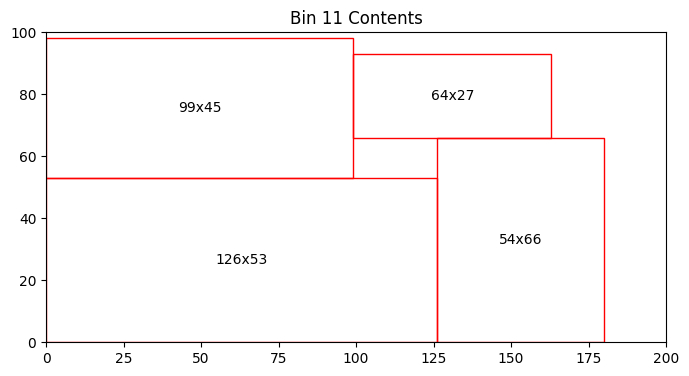

Bin 11 has 3575.00 units of area left, utilization: 82.12%


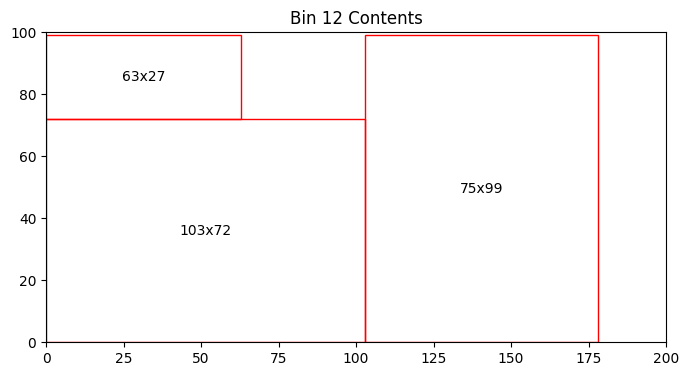

Bin 12 has 3458.00 units of area left, utilization: 82.71%


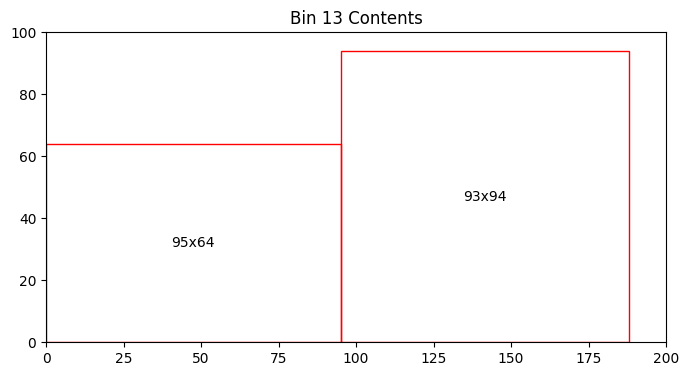

Bin 13 has 5178.00 units of area left, utilization: 74.11%


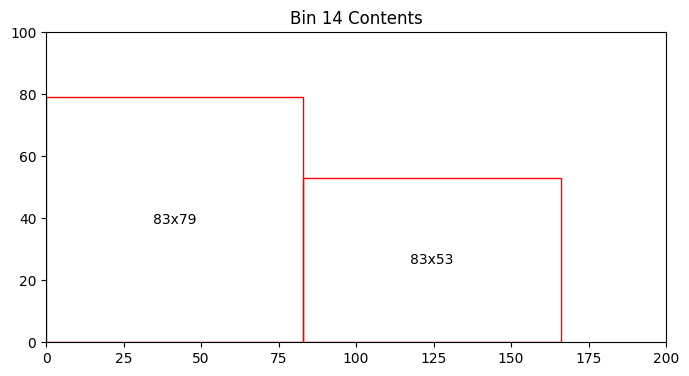

Bin 14 has 9044.00 units of area left, utilization: 54.78%


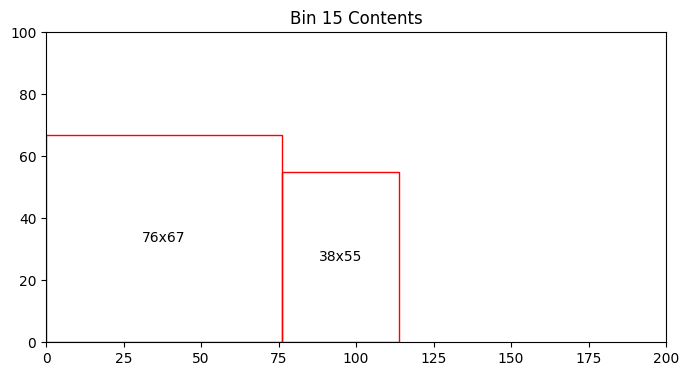

Bin 15 has 12818.00 units of area left, utilization: 35.91%
Total number of bins = 15
Total area left in bins = 63898.00
{'total_bins': 15, 'total_area_left': 63898, 'utilizations': [92.75, 92.12, 85.07000000000001, 84.905, 82.625, 78.69, 89.875, 83.89999999999999, 78.175, 82.765, 82.125, 82.71, 74.11, 54.779999999999994, 35.91]}
Results have been saved to results.csv and incorrect codes to incorrect_codes.csv


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from typing import List, Tuple
import random
import numpy as np

import numpy as np
from typing import List, Tuple
import time


checked_codes_dir = 'best_code'
results2 = []
incorrect_codes2 = []

# Read the base_eval.py content once
with open('base_eval.py', 'r') as base_file:
    base_content = base_file.read()

# Function to process each Python file
def process_files(rectangles_array, iteration):
    global total_bins, total_area_left
    for filename in os.listdir(checked_codes_dir):
        if filename.endswith('.py'):
            filepath = os.path.join(checked_codes_dir, filename)
            
            # Read the content of the current checked code file
            with open(filepath, 'r') as file:
                file_content = file.read()
            
            # Insert the rectangle array as the first line without overwriting the original code
            rectangles_array_str = np.array2string(rectangles_array, separator=',')
            modified_content = f"import numpy as np\nrectangles_array = np.array({rectangles_array_str})\n" + file_content + "\n" + base_content
            
            # Execute the combined content in the global scope so that imports work
            exec(modified_content, globals())
            result, message = check_bins(bins, 200, 100)
            
            # Capture the results based on the check
            if result:
                results2.append({
                    'filename': filename,
                    'iteration': iteration,
                    'total_bins': int(total_bins),
                    'total_area_left': int(total_area_left),
                    'time': time1,
                    'utilizations':utilizations
                })
            else:
                incorrect_codes2.append({
                    'filename': filename,
                    'iteration': iteration
                })
            save_results_to_csv(results2, 'results_llm_best_code.csv')
            save_results_to_csv(incorrect_codes2, 'incorrect_codes2.csv')    

# Function to save results to a CSV file using pandas DataFrame
def save_results_to_csv(results_list, filename):
    if results_list:
        df = pd.DataFrame(results_list)
        df.to_csv(filename, index=False)


# Loop over the different rectangle arrays
for i, rectangles_array in enumerate(rectangles_list):
    process_files(rectangles_array, i)

# Save the results and incorrect codes to CSV files


print("Results have been saved to results.csv and incorrect codes to incorrect_codes.csv")